#Dataset Spotify



#Presentación del proyecto



La intención de este proyecto es entender los charts que reflejan las canciones más escuchadas(top 50 y 200 de cada país) de Spotify y la tendencia de popularidad dentro de la app. Tanto a nivel global como regional, para poder predecir la popularidad que tendrán futuras canciones teniendo en cuenta sus características (como danzabilidad, cantidad de voces, instrumentos, notas).


Contexto comercial: La intención de este objetivo es entender los charts de Spotify y la tendencia de popularidad dentro de la app. Tanto a nivel global como regional, para poder predecir la popularidad que tendrán futuras canciones teniendo en cuenta sus características (como danzabilidad, cantida de voces, instrumentos, notas).

Preguntas:
¿Hay alguna variable que explique la popularidad o es un fenómeno multicausal?
¿Cuál es el comportamiento de la popularidad y los streams en cada continente?
¿Hay relación entre género y popularidad? ¿Suecede lo mismo en cada región?

Spotify mide la popularidad como un valor entre 0 y 100, siendo 100 el más popular. La popularidad se calcula mediante un algoritmo y se basa, en su mayor parte, en la cantidad total de reproducciones que ha tenido la canción y en lo recientes que son esas reproducciones. En términos generales, las canciones que se reproducen mucho ahora tendrán una mayor popularidad que las canciones que se reprodujeron mucho en el pasado. Esta es la información que se encuentra en la API de Spotify, sin embargo, como bien dice, la popularidad no se mide solo en términos de Streams.

Se usan 3 datasets en csv. Uno de todas las canciones de Spotify, otro que agrega las fechas de release y los album name y el tercero que contiene los charts de ciertos países.

El presente dataset contiene información sobre la música alojada en el programa Spotify, entre los parámetros más relevantes encontramos artistas, nombre de la canción, duración, popularidad así como cuestiones más específicas como el parámetro danzabilidad, acusticidad, instrumentalidad que van a caracterizar a las canciones del dataset. El dataset está compuesto de 3 tablas distintas, la primera contiene la información previamente descripta, las otras dos agregan información de año de publicación de la canción así como género de la misma. La última tabla analiza por región y por fecha los charts Top200 y Viral50.

Lo que se busca con este dataset es identificar aquellas variables que consituyen la popularidad de un tema y ver cómo varía en el tiempo y en la región. La hipótesis inicial es que la popularidad en los últimos años tiene una mayor relación con la danzabilidad de las canciones, por lo tanto las tres variables que considero más importantes para entender la popularidad son la danzabilidad, la región y el año.


Objetivo del proyecto: El objetivo de este análisis es realizar un modelo de ML que prediga la popularidad de un tema.

#Carga dataset y librerías

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
sns.set_theme(color_codes=True)

In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd '/content/gdrive/MyDrive/Data/-dtsc'
dfSpotify= pd.read_csv('Spotify.csv',sep=',')
df_canciones= pd.read_csv('spotify_songs.csv',sep=',')
dfCharts= pd.read_csv('df_charts.csv',sep=',')

/content/gdrive/MyDrive/Data/-dtsc


#Preprocesamiento de datos


El dataset final es una combinación de los 3 previamente cargados. En esta primera etapa lo que se realiza es una limpieza de estos 3 datasets hasta llegar a las variables que se necesitan para el dataset final.

In [ ]:
dfCharts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11293758 entries, 0 to 11293757
Data columns (total 6 columns):
 #   Column    Dtype  
---  ------    -----  
 0   track_id  object 
 1   date      object 
 2   region    object 
 3   chart     object 
 4   trend     object 
 5   streams   float64
dtypes: float64(1), object(5)
memory usage: 517.0+ MB


In [ ]:
dfCharts.head()

track_id        date        region    chart      trend  \
0  1iJBSr7s7jYXzM8EGcbK5b  2021-03-19        Norway   top200  NEW_ENTRY   
1  1iJBSr7s7jYXzM8EGcbK5b  2021-04-12     Indonesia  viral50  NEW_ENTRY   
2  1iJBSr7s7jYXzM8EGcbK5b  2021-04-12      Malaysia  viral50  NEW_ENTRY   
3  1iJBSr7s7jYXzM8EGcbK5b  2021-04-12  Saudi Arabia  viral50  NEW_ENTRY   
4  1iJBSr7s7jYXzM8EGcbK5b  2021-04-12   South Korea  viral50  NEW_ENTRY   

   streams  
0  11911.0  
1      NaN  
2      NaN  
3      NaN  
4      NaN

In [ ]:
dfCharts['date'] = pd.to_datetime(dfCharts['date'])
dfCharts['chart_year'] = dfCharts["date"].dt.year
dfCharts = dfCharts.drop(columns=["trend", "chart"])
dfCharts

track_id       date        region  streams  chart_year
0         1iJBSr7s7jYXzM8EGcbK5b 2021-03-19        Norway  11911.0        2021
1         1iJBSr7s7jYXzM8EGcbK5b 2021-04-12     Indonesia      NaN        2021
2         1iJBSr7s7jYXzM8EGcbK5b 2021-04-12      Malaysia      NaN        2021
3         1iJBSr7s7jYXzM8EGcbK5b 2021-04-12  Saudi Arabia      NaN        2021
4         1iJBSr7s7jYXzM8EGcbK5b 2021-04-12   South Korea      NaN        2021
...                          ...        ...           ...      ...         ...
11293753  3gSp7wFRqSkOEBm4pDAWYP 2019-03-06     Singapore      NaN        2019
11293754  3gSp7wFRqSkOEBm4pDAWYP 2019-03-07     Singapore      NaN        2019
11293755  3gSp7wFRqSkOEBm4pDAWYP 2019-03-08     Singapore      NaN        2019
11293756  3gSp7wFRqSkOEBm4pDAWYP 2019-03-09     Singapore      NaN        2019
11293757  3gSp7wFRqSkOEBm4pDAWYP 2019-03-10     Singapore      NaN        2019

[11293758 rows x 5 columns]

Se desestiman las variables Trend y Chart. Dejando solo el track_id que es el id del track en Spotify, date que es la fecha del chart, region que es la region donde se encuentra el chart, streams cantidad de reproducciones y chart_year que es el año del chart.

In [ ]:
dfCharts_region= dfCharts.groupby(["region", "chart_year", "track_id"]).mean().reset_index()
dfCharts_region

region  chart_year                track_id  \
0      Andorra        2017  02dphTJYUQ9pmdNC52iyOz   
1      Andorra        2017  07ABETRdek3ACMpRPvQuaT   
2      Andorra        2017  08mG3Y1vljYA6bvDt4Wqkj   
3      Andorra        2017  0Bb21NEv7yjSJ8ro2k2SZC   
4      Andorra        2017  0E3HnGJSMplqBSYGsh2exH   
...        ...         ...                     ...   
88274  Vietnam        2021  7qiZfU4dY1lWllzX7mPBI3   
88275  Vietnam        2021  7qmvLmX9tyaTiBAVNI6YEn   
88276  Vietnam        2021  7rdnB5DAyPbaj51TCQRcqW   
88277  Vietnam        2021  7uoFMmxln0GPXQ0AcCBXRq   
88278  Vietnam        2021  7v8wKvNQQIxkugCFFjrkaO   

                               date      streams  
0     2017-11-01 00:00:00.000000000          NaN  
1     2017-07-12 00:00:00.000000000          NaN  
2     2017-05-07 00:00:00.000000000          NaN  
3     2017-02-24 00:00:00.000000000          NaN  
4     2017-10-02 00:00:00.000000000          NaN  
...                             ...          ...  
88274 2021-06-08 15:00:00.000000000  4423.860714  
88275 2021-09-14 12:00:00.000000000  5330.875000  
88276 2021-10-02 08:00:00.000000000          NaN  
88277 2021-03-03 11:48:11.803278592  5235.377049  
88278 2021-12-29 12:00:00.000000000          NaN  

[88279 rows x 5 columns]

Se agrupa por region, chart_year y track_id.

In [ ]:
dfCharts_region = dfCharts_region[~dfCharts_region['region'].isin(['Global'])] #Se elimina aquellas filas donde la region es Global ya que nos interesa un análisis regionalizado de los charts
p10 = dfCharts_region.groupby(['region'], as_index=False)['streams'].mean()
top_10_regions = p10.groupby('region')['streams'].mean().nlargest(10).index
df_top_10_regions = p10[p10['region'].isin(top_10_regions)]

¿Cuáles son las regiones con más streams? Se busca entender el comportamiento en cada región.



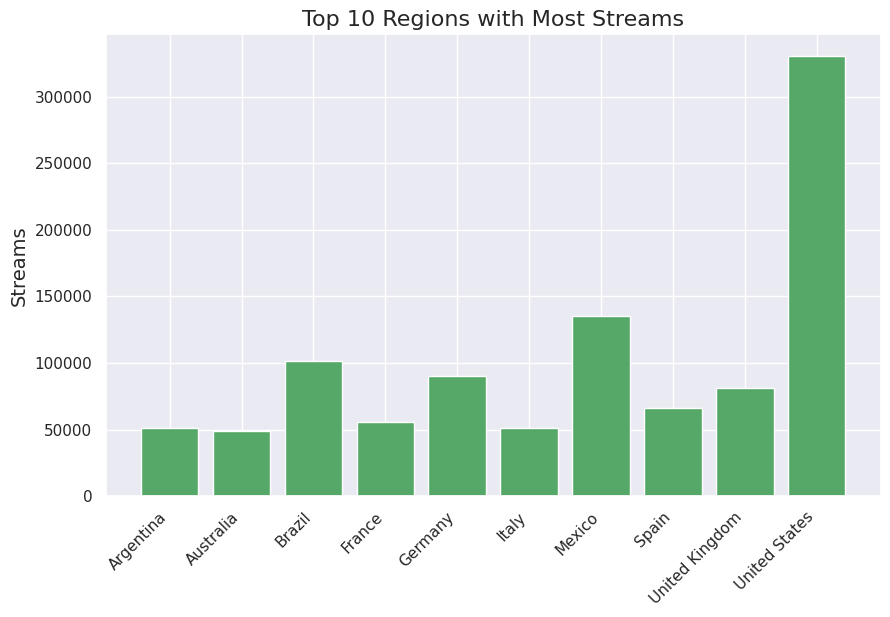

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(df_top_10_regions['region'], df_top_10_regions['streams'], color='g')


ax.set_title('Top 10 Regions with Most Streams', fontsize=16)
ax.set_ylabel('Streams', fontsize=14)

ax.set_xticks(df_top_10_regions['region'])
ax.set_xticklabels(df_top_10_regions['region'], rotation=45, ha='right')
plt.show()

En este gráfico queda claro que Estados Unidos presenta un comportamiento muy distitno del resto del top 10 de regiones con más streams.

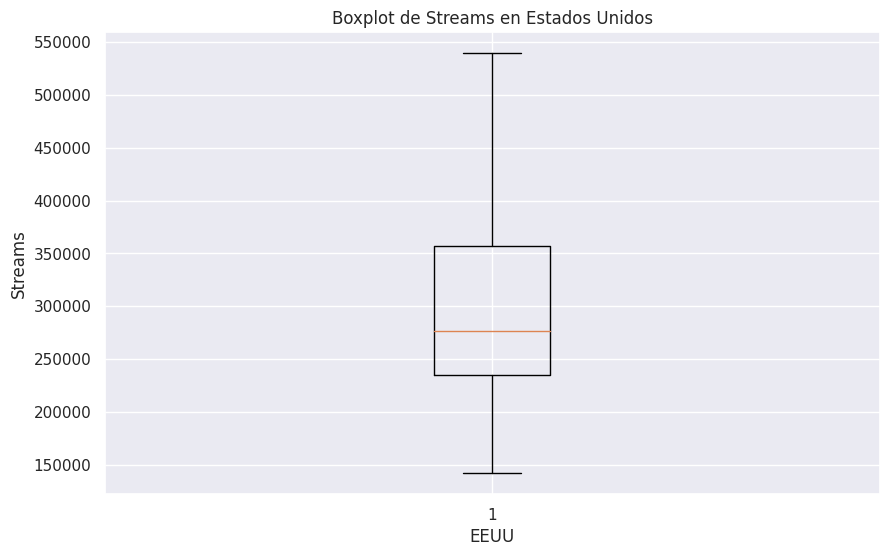

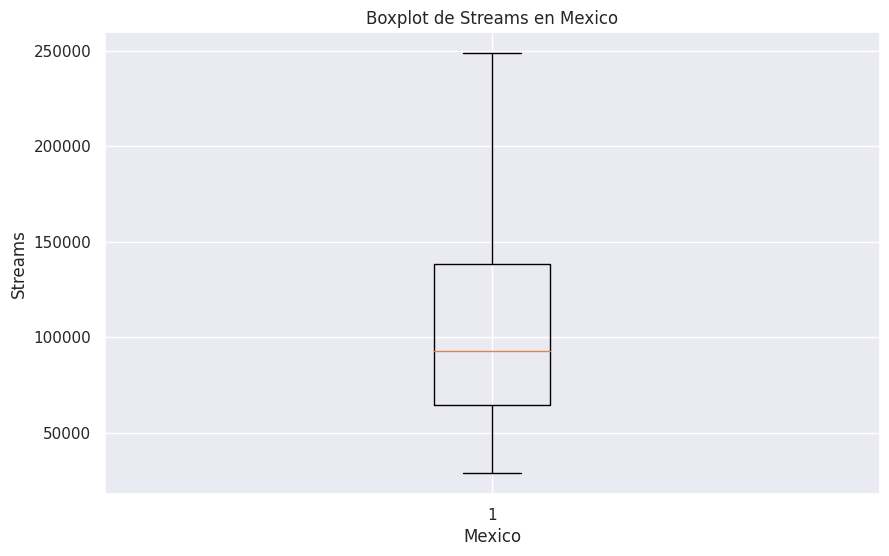

In [ ]:
p_norteamerica = dfCharts_region[dfCharts_region['region'] == 'United States']

plt.figure(figsize=(10, 6))
plt.boxplot(p_norteamerica['streams'].dropna(), showfliers=False)
plt.title('Boxplot de Streams en Estados Unidos')
plt.ylabel('Streams')
plt.xlabel('EEUU')
plt.show()

p_mexico = dfCharts_region[dfCharts_region['region'] == 'Mexico']

plt.figure(figsize=(10, 6))
plt.boxplot(p_mexico['streams'].dropna(), showfliers=False)
plt.title('Boxplot de Streams en Mexico')
plt.ylabel('Streams')
plt.xlabel('Mexico')
plt.show()

Viendo el gráfico salta a la vista que USA y Mexico tienen valores que se alejan mucho del resto de los países, en este gráfico vemos que los valores más 550000 son outliers. Por lo tanto me qudaré sólo con estos datos.

In [ ]:
us_mex_data = dfCharts_region[(dfCharts_region['region'] == 'United States') | (dfCharts_region['region'] == 'Mexico')].copy().reset_index(drop=True)

dfCharts_region = dfCharts_region.loc[(dfCharts_region['region'] != 'United States')& (dfCharts_region['region'] != 'Mexico')]

us_mex_data.dropna(subset=['streams'], inplace=True)


In [ ]:
dfCharts_region

region  chart_year                track_id  \
0      Andorra        2017  02dphTJYUQ9pmdNC52iyOz   
1      Andorra        2017  07ABETRdek3ACMpRPvQuaT   
2      Andorra        2017  08mG3Y1vljYA6bvDt4Wqkj   
3      Andorra        2017  0Bb21NEv7yjSJ8ro2k2SZC   
4      Andorra        2017  0E3HnGJSMplqBSYGsh2exH   
...        ...         ...                     ...   
88274  Vietnam        2021  7qiZfU4dY1lWllzX7mPBI3   
88275  Vietnam        2021  7qmvLmX9tyaTiBAVNI6YEn   
88276  Vietnam        2021  7rdnB5DAyPbaj51TCQRcqW   
88277  Vietnam        2021  7uoFMmxln0GPXQ0AcCBXRq   
88278  Vietnam        2021  7v8wKvNQQIxkugCFFjrkaO   

                               date      streams  
0     2017-11-01 00:00:00.000000000          NaN  
1     2017-07-12 00:00:00.000000000          NaN  
2     2017-05-07 00:00:00.000000000          NaN  
3     2017-02-24 00:00:00.000000000          NaN  
4     2017-10-02 00:00:00.000000000          NaN  
...                             ...          ...  
88274 2021-06-08 15:00:00.000000000  4423.860714  
88275 2021-09-14 12:00:00.000000000  5330.875000  
88276 2021-10-02 08:00:00.000000000          NaN  
88277 2021-03-03 11:48:11.803278592  5235.377049  
88278 2021-12-29 12:00:00.000000000          NaN  

[83879 rows x 5 columns]

In [ ]:
us_mex_data

region  chart_year                track_id  \
3            Mexico        2017  0JiVRyTJcJnmlwCZ854K4p   
4            Mexico        2017  0KKkJNfGyhkQ5aFogxQAPU   
6            Mexico        2017  0PDUDa38GO8lMxLCRc4lL1   
9            Mexico        2017  0UeYCHOETPfai02uskjJ3x   
11           Mexico        2017  0Zbbxnx4SGGHoIow4PpISP   
...             ...         ...                     ...   
2685  United States        2021  7uoFMmxln0GPXQ0AcCBXRq   
2686  United States        2021  7vF3xkCMvZjAe2nTWY0uQZ   
2687  United States        2021  7vrJn5hDSXRmdXoR30KgF1   
2688  United States        2021  7w87IxuO7BDcJ3YUqCyMTT   
2690  United States        2021  7yq4Qj7cqayVTp3FF9CWbm   

                              date        streams  
3    2017-03-05 13:08:34.285714176   69294.912698  
4    2017-07-23 00:53:49.906542080  114121.141066  
6    2017-01-04 12:00:00.000000000   30036.833333  
9    2017-03-14 10:37:22.622950912   42779.147541  
11   2017-11-07 01:06:58.604651264   51381.623377  
...                            ...            ...  
2685 2021-07-30 06:14:24.000000000  357155.420000  
2686 2021-05-15 14:00:00.000000000  215459.666667  
2687 2021-01-24 11:44:40.851063808  268006.276596  
2688 2021-01-01 00:00:00.000000000  255069.000000  
2690 2021-07-23 13:55:12.000000000  206718.640000  

[2079 rows x 5 columns]

In [ ]:
us_mex_data = us_mex_data[~((us_mex_data['streams'] > 530000))]
dfCharts_region = pd.concat([dfCharts_region, us_mex_data], ignore_index=True)
dfCharts_region

region  chart_year                track_id  \
0            Andorra        2017  02dphTJYUQ9pmdNC52iyOz   
1            Andorra        2017  07ABETRdek3ACMpRPvQuaT   
2            Andorra        2017  08mG3Y1vljYA6bvDt4Wqkj   
3            Andorra        2017  0Bb21NEv7yjSJ8ro2k2SZC   
4            Andorra        2017  0E3HnGJSMplqBSYGsh2exH   
...              ...         ...                     ...   
85817  United States        2021  7uoFMmxln0GPXQ0AcCBXRq   
85818  United States        2021  7vF3xkCMvZjAe2nTWY0uQZ   
85819  United States        2021  7vrJn5hDSXRmdXoR30KgF1   
85820  United States        2021  7w87IxuO7BDcJ3YUqCyMTT   
85821  United States        2021  7yq4Qj7cqayVTp3FF9CWbm   

                               date        streams  
0     2017-11-01 00:00:00.000000000            NaN  
1     2017-07-12 00:00:00.000000000            NaN  
2     2017-05-07 00:00:00.000000000            NaN  
3     2017-02-24 00:00:00.000000000            NaN  
4     2017-10-02 00:00:00.000000000            NaN  
...                             ...            ...  
85817 2021-07-30 06:14:24.000000000  357155.420000  
85818 2021-05-15 14:00:00.000000000  215459.666667  
85819 2021-01-24 11:44:40.851063808  268006.276596  
85820 2021-01-01 00:00:00.000000000  255069.000000  
85821 2021-07-23 13:55:12.000000000  206718.640000  

[85822 rows x 5 columns]

Se concatenan los dos datasets para que queden solo aquellas filas que no sean outliers de EEUU y Mexico

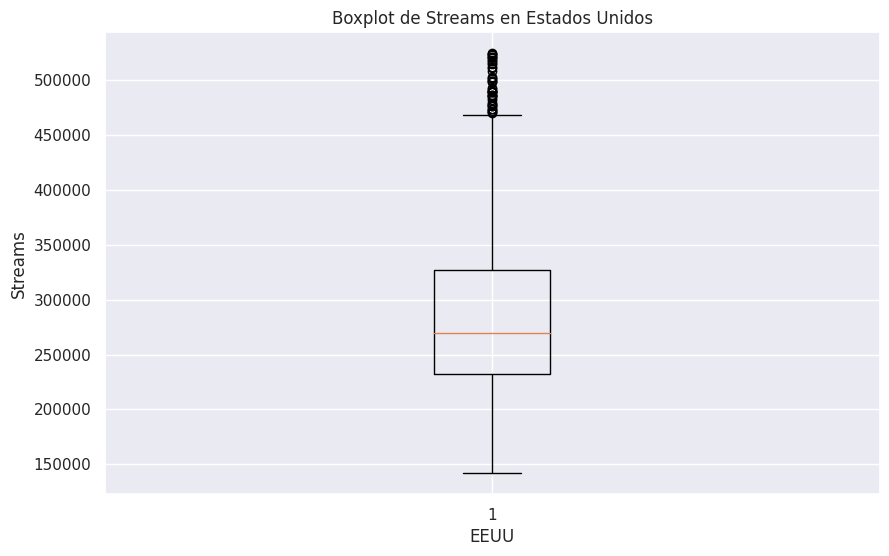

In [ ]:
p_norteamerica = dfCharts_region[dfCharts_region['region'] == 'United States']
plt.figure(figsize=(10, 6))
plt.boxplot(p_norteamerica['streams'].dropna(), showfliers=True)
plt.title('Boxplot de Streams en Estados Unidos')
plt.ylabel('Streams')
plt.xlabel('EEUU')
plt.show()

##Unión de los 3 datasets

In [ ]:
df_Spotify = pd.merge(dfSpotify, df_canciones[['track_id', 'playlist_name']], on='track_id', how='left').reset_index()
df_Spotify = df_Spotify.drop_duplicates(['artists', 'track_name', 'duration_ms']) #Se elimnan los duplicados
df_Spotify = df_Spotify.drop(columns=["index", "Unnamed: 0"])
df_Spotify['duracion_minutos'] = (df_Spotify['duration_ms'] / 60000).round()
df_Spotify['duracion_minutos'] = df_Spotify['duracion_minutos'].astype(int)
df_Spotify['popularity'] = (df_Spotify['popularity'] / 100).round(2)
df_Spotify = df_Spotify.drop(columns=["duration_ms"])
df_Spotify

track_id                 artists  \
0       5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1       4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2       1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3       6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4       5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...                        ...                     ...   
116283  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
116284  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
116285  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
116286  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
116287  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1                                        Ghost (Acoustic)   
2                                          To Begin Again   
3       Crazy Rich Asians (Original Motion Picture Sou...   
4                                                 Hold On   
...                                                   ...   
116283  #mindfulness - Soft Rain for Mindful Meditatio...   
116284  #mindfulness - Soft Rain for Mindful Meditatio...   
116285                                            Best Of   
116286                                  Change Your World   
116287                                     Miss Perfumado   

                        track_name  popularity  explicit  danceability  \
0                           Comedy        0.73     False         0.676   
1                 Ghost - Acoustic        0.55     False         0.420   
2                   To Begin Again        0.57     False         0.438   
3       Can't Help Falling In Love        0.71     False         0.266   
4                          Hold On        0.82     False         0.618   
...                            ...         ...       ...           ...   
116283         Sleep My Little Boy        0.21     False         0.172   
116284            Water Into Light        0.22     False         0.174   
116285              Miss Perfumado        0.22     False         0.629   
116286                     Friends        0.41     False         0.587   
116287                   Barbincor        0.22     False         0.526   

        energy  key  loudness  ...  speechiness  acousticness  \
0       0.4610    1    -6.746  ...       0.1430        0.0322   
1       0.1660    1   -17.235  ...       0.0763        0.9240   
2       0.3590    0    -9.734  ...       0.0557        0.2100   
3       0.0596    0   -18.515  ...       0.0363        0.9050   
4       0.4430    2    -9.681  ...       0.0526        0.4690   
...        ...  ...       ...  ...          ...           ...   
116283  0.2350    5   -16.393  ...       0.0422        0.6400   
116284  0.1170    0   -18.318  ...       0.0401        0.9940   
116285  0.3290    0   -10.895  ...       0.0420        0.8670   
116286  0.5060    7   -10.889  ...       0.0297        0.3810   
116287  0.4870    1   -10.204  ...       0.0725        0.6810   

        instrumentalness  liveness  valence    tempo  time_signature  \
0               0.000001    0.3580   0.7150   87.917               4   
1               0.000006    0.1010   0.2670   77.489               4   
2               0.000000    0.1170   0.1200   76.332               4   
3               0.000071    0.1320   0.1430  181.740               3   
4               0.000000    0.0829   0.1670  119.949               4   
...                  ...       ...      ...      ...             ...   
116283          0.928000    0.0863   0.0339  125.995               5   
116284          0.976000    0.1050   0.0350   85.239               4   
116285          0.000000    0.0839   0.7430  132.378               4   
116286          0.000000    0.2700   0.4130  135.960               4   
116287          0.000000    0.0893   0.7080   79.198               4   

        track_genre playlist_name duracion_minutos  
0   

In [ ]:
df_merg_charts = pd.merge(df_Spotify, dfCharts_region, on='track_id', how='inner').reset_index()
df_merg_charts = df_merg_charts.drop(columns="index")
df_merg_charts

track_id  \
0      1iJBSr7s7jYXzM8EGcbK5b   
1      1iJBSr7s7jYXzM8EGcbK5b   
2      1iJBSr7s7jYXzM8EGcbK5b   
3      1iJBSr7s7jYXzM8EGcbK5b   
4      1iJBSr7s7jYXzM8EGcbK5b   
...                       ...   
78767  1UOzgUuakMRQcKVTUTU6Pu   
78768  73thBYypIRDkDz9Fw1kgCN   
78769  58ePGDlx3W3o9sh8N1HLh3   
78770  7xzMrUmlooPa1Fmp88hlYc   
78771  3gSp7wFRqSkOEBm4pDAWYP   

                                                 artists  \
0                                 Ingrid Michaelson;ZAYN   
1                                 Ingrid Michaelson;ZAYN   
2                                 Ingrid Michaelson;ZAYN   
3                                 Ingrid Michaelson;ZAYN   
4                                 Ingrid Michaelson;ZAYN   
...                                                  ...   
78767  one sonic society;Essential Worship;Vertical W...   
78768                          Bethel Music;Josh Baldwin   
78769                        Chris Tomlin;We The Kingdom   
78770                                      Cesária Evora   
78771                             Bethel Music;Emmy Rose   

                                        album_name  \
0                                   To Begin Again   
1                                   To Begin Again   
2                                   To Begin Again   
3                                   To Begin Again   
4                                   To Begin Again   
...                                            ...   
78767     Goodness of God (feat. Vertical Worship)   
78768                               Victory (Live)   
78769  Miracle Of Love: Christmas Songs Of Worship   
78770                               Miss Perfumado   
78771                               Victory (Live)   

                                     track_name  popularity  explicit  \
0                                To Begin Again        0.57     False   
1                                To Begin Again        0.57     False   
2                                To Begin Again        0.57     False   
3                                To Begin Again        0.57     False   
4                                To Begin Again        0.57     False   
...                                         ...         ...       ...   
78767  Goodness of God (feat. Vertical Worship)        0.52     False   
78768                 Stand in Your Love - Live        0.50     False   
78769                             Christmas Day        0.36     False   
78770                                    Sodade        0.59     False   
78771                Promises Never Fail - Live        0.45     False   

       danceability  energy  key  loudness  ...  valence    tempo  \
0             0.438   0.359    0    -9.734  ...    0.120   76.332   
1             0.438   0.359    0    -9.734  ...    0.120   76.332   
2             0.438   0.359    0    -9.734  ...    0.120   76.332   
3             0.438   0.359    0    -9.734  ...    0.120   76.332   
4             0.438   0.359    0    -9.734  ...    0.120   76.332   
...             ...     ...  ...       ...  ...      ...      ...   
78767         0.255   0.674    2    -7.147  ...    0.184  136.101   
78768         0.426   0.829    0    -4.075  ...    0.524  144.834   
78769         0.256   0.648   10    -4.237  ...    0.331  179.688   
78770         0.575   0.430    8   -13.168  ...    0.427   82.691   
78771         0.383   0.836    3    -4.788  ...    0.260  146.052   

       time_signature  track_genre  playlist_name  duracion_minutos  \
0                   4     acoustic            NaN                 4   
1                   4     acoustic            NaN                 4   
2                   4     acoustic            NaN                 4   
3                   4     acoustic            NaN                 4   
4                   4     acoustic            NaN                 4   
...               ...          ...            ...               ...   
78767               4  world-music            NaN  

In [ ]:
df_merg_charts.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78772 entries, 0 to 78771
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   track_id          78772 non-null  object        
 1   artists           78772 non-null  object        
 2   album_name        78772 non-null  object        
 3   track_name        78772 non-null  object        
 4   popularity        78772 non-null  float64       
 5   explicit          78772 non-null  bool          
 6   danceability      78772 non-null  float64       
 7   energy            78772 non-null  float64       
 8   key               78772 non-null  int64         
 9   loudness          78772 non-null  float64       
 10  mode              78772 non-null  int64         
 11  speechiness       78772 non-null  float64       
 12  acousticness      78772 non-null  float64       
 13  instrumentalness  78772 non-null  float64       
 14  liveness          7877

In [ ]:
df_merg_charts.describe()

popularity  danceability        energy           key      loudness  \
count  78772.000000  78772.000000  78772.000000  78772.000000  78772.000000   
mean       0.719105      0.643486      0.643030      5.366298     -6.513150   
min        0.160000      0.078300      0.002480      0.000000    -37.264000   
25%        0.660000      0.555000      0.519000      2.000000     -7.814000   
50%        0.740000      0.662000      0.668000      6.000000     -5.865000   
75%        0.800000      0.749000      0.786000      8.000000     -4.483000   
max        0.930000      0.980000      0.999000     11.000000      1.023000   
std        0.108971      0.146016      0.185868      3.559645      3.034695   

               mode   speechiness  acousticness  instrumentalness  \
count  78772.000000  78772.000000  78772.000000      78772.000000   
mean       0.590540      0.085508      0.247758          0.033227   
min        0.000000      0.022300      0.000002          0.000000   
25%        0.000000      0.036600      0.034200          0.000000   
50%        1.000000      0.053600      0.157000          0.000001   
75%        1.000000      0.094000      0.385000          0.000157   
max        1.000000      0.889000      0.996000          0.985000   
std        0.491737      0.082925      0.261764          0.140729   

           liveness       valence         tempo  time_signature  \
count  78772.000000  78772.000000  78772.000000    78772.000000   
mean       0.175288      0.486694    120.464201        3.951912   
min        0.019700      0.017400     48.578000        1.000000   
25%        0.094400      0.305000     99.137000        4.000000   
50%        0.124000      0.483000    119.896000        4.000000   
75%        0.210000      0.661000    136.960000        4.000000   
max        0.984000      0.979000    216.334000        5.000000   
std        0.131340      0.229063     27.746037        0.304754   

       duracion_minutos    chart_year                           date  \
count      78772.000000  78772.000000                          78772   
mean           3.536053   2019.209605  2019-09-18 07:35:45.216293120   
min            1.000000   2017.000000            2017-01-01 00:00:00   
25%            3.000000   2018.000000  2018-07-29 01:56:49.504702208   
50%            3.000000   2019.000000  2019-09-24 01:56:52.987013120   
75%            4.000000   2021.000000  2021-01-05 16:17:08.571428608   
max           17.000000   2021.000000            2021-12-31 00:00:00   
std            0.981947      1.406825                            NaN   

            streams  
count  5.471600e+04  
mean   2.636237e+04  
min    1.001000e+03  
25%    2.792448e+03  
50%    7.217750e+03  
75%    2.709688e+04  
max    1.046853e+06  
std    5.365397e+04

In [ ]:
df_merg_charts.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
78767    False
78768    False
78769    False
78770    False
78771    False
Length: 78772, dtype: bool

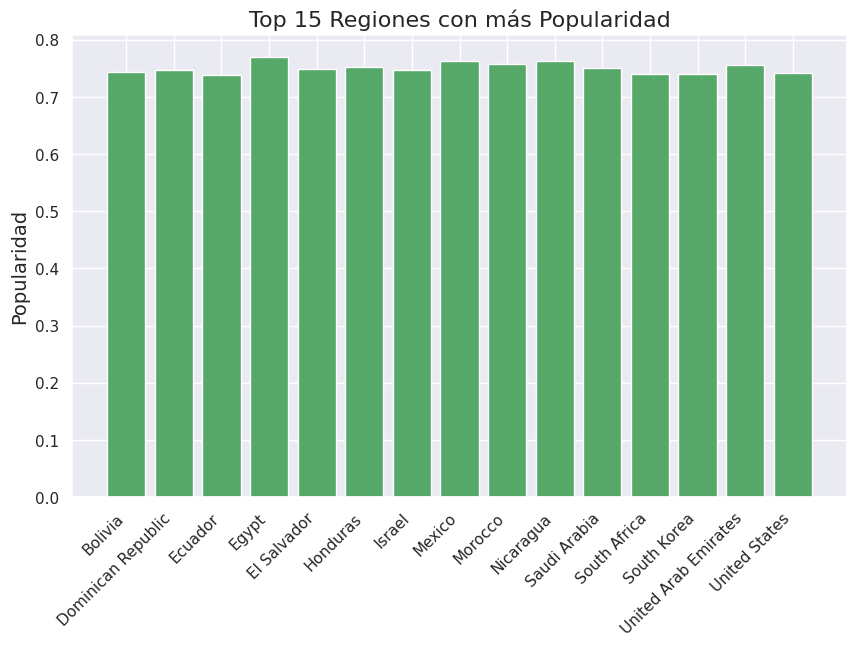

In [ ]:

p10popularidad = df_merg_charts.groupby(['region'], as_index=False)['popularity'].mean()
top_10_regions_pop = p10popularidad.groupby('region')['popularity'].mean().nlargest(15).index
df_top_10_regions_pop = p10popularidad[p10popularidad['region'].isin(top_10_regions_pop)]

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(df_top_10_regions_pop['region'], df_top_10_regions_pop['popularity'], color='g')


ax.set_title('Top 15 Regiones con más Popularidad', fontsize=16)
ax.set_ylabel('Popularidad', fontsize=14)

ax.set_xticks(df_top_10_regions_pop['region'])
ax.set_xticklabels(df_top_10_regions_pop['region'], rotation=45, ha='right')
plt.show()

Dentro del top 15 de popularidad no hay mayores variaciones. Vemos que salvo EEUU los países con más streams no son los que tienen un promedio más alto de popularidad. Otra rareza es que no hay países de Europa dentro de este top 15, lo cual da a entender que Europa tiene un comportamiento particular.

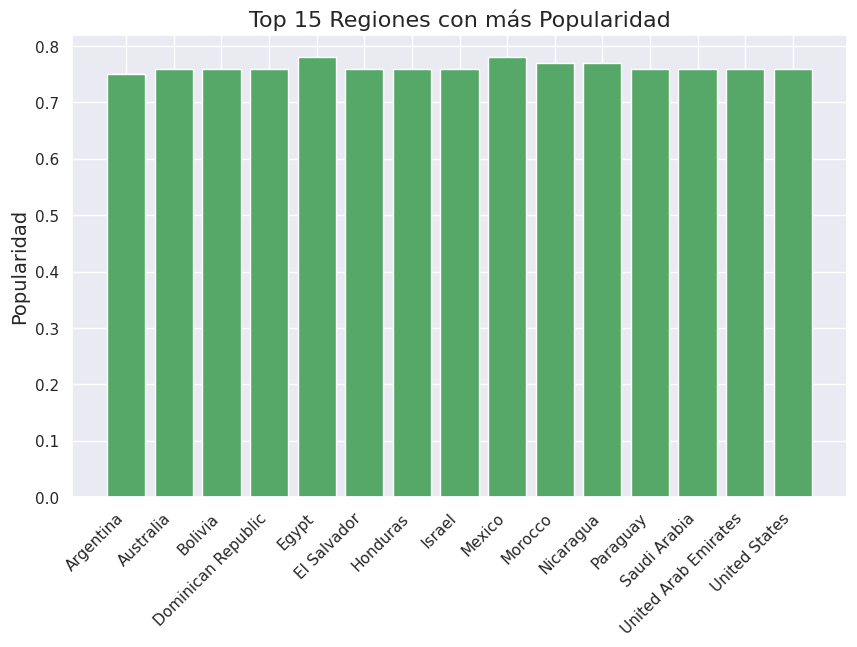

In [ ]:
p10popularidadmed = df_merg_charts.groupby(['region'], as_index=False)['popularity'].median()
top_10_regions_pomed = p10popularidadmed.groupby('region')['popularity'].median().nlargest(15).index
df_top_10_regions_popmed = p10popularidadmed[p10popularidadmed['region'].isin(top_10_regions_pomed)]

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(df_top_10_regions_popmed['region'], df_top_10_regions_popmed['popularity'], color='g')


ax.set_title('Top 15 Regiones con más Popularidad', fontsize=16)
ax.set_ylabel('Popularidad', fontsize=14)

ax.set_xticks(df_top_10_regions_popmed['region'])
ax.set_xticklabels(df_top_10_regions_popmed['region'], rotation=45, ha='right')
plt.show()

No hay mayores variaciones si medimos la mediana, si bien algunos países cambian como es Argentina o Australia en este caso, seguimos sin tener mayor presencia europea aunque sí la tenemos en los Streams.  

---



Dentro de la popularidad, ¿hay valores outliers?

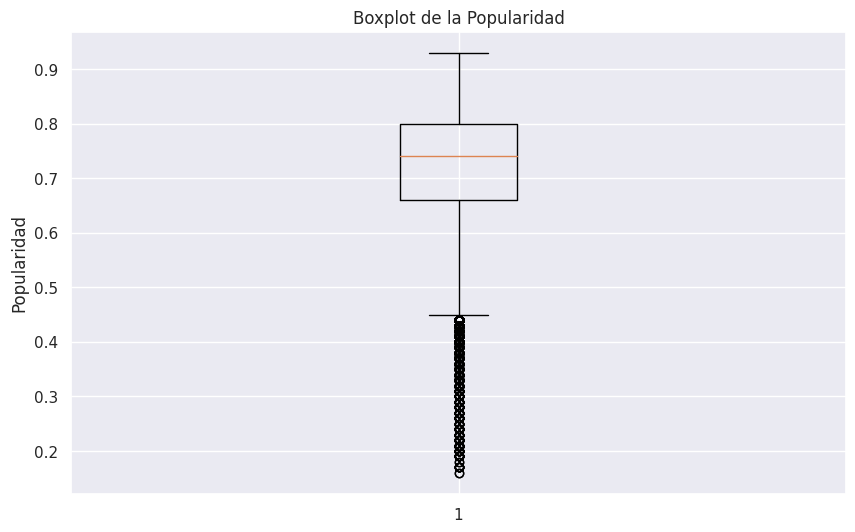

In [ ]:
popularity_data = df_merg_charts['popularity']

plt.figure(figsize=(10, 6))
plt.boxplot(popularity_data,  showfliers=True)
plt.title('Boxplot de la Popularidad')
plt.ylabel('Popularidad')
plt.show()

Vemos que todos aquellos valores que tengan menos 0,45 en popularidad son outliers. Procedemos a dejar solo aquellos mayores a ese valor.

In [ ]:
df_merg_charts = df_merg_charts[df_merg_charts['popularity'] > 0.45].reset_index()
df_merg_charts

index                track_id  \
0          0  1iJBSr7s7jYXzM8EGcbK5b   
1          1  1iJBSr7s7jYXzM8EGcbK5b   
2          2  1iJBSr7s7jYXzM8EGcbK5b   
3          3  1iJBSr7s7jYXzM8EGcbK5b   
4          4  1iJBSr7s7jYXzM8EGcbK5b   
...      ...                     ...   
77055  78764  6zN6wjHO3ALVCIQQhSqqqN   
77056  78766  0lATXmstYwzQjOLgkzvnEc   
77057  78767  1UOzgUuakMRQcKVTUTU6Pu   
77058  78768  73thBYypIRDkDz9Fw1kgCN   
77059  78770  7xzMrUmlooPa1Fmp88hlYc   

                                                 artists  \
0                                 Ingrid Michaelson;ZAYN   
1                                 Ingrid Michaelson;ZAYN   
2                                 Ingrid Michaelson;ZAYN   
3                                 Ingrid Michaelson;ZAYN   
4                                 Ingrid Michaelson;ZAYN   
...                                                  ...   
77055     Chris Tomlin;Thomas Rhett;Florida Georgia Line   
77056                                    Rend Collective   
77057  one sonic society;Essential Worship;Vertical W...   
77058                          Bethel Music;Josh Baldwin   
77059                                      Cesária Evora   

                                              album_name  \
0                                         To Begin Again   
1                                         To Begin Again   
2                                         To Begin Again   
3                                         To Begin Again   
4                                         To Begin Again   
...                                                  ...   
77055  Thank You Lord (feat. Thomas Rhett & Florida G...   
77056                         Good News (Deluxe Edition)   
77057           Goodness of God (feat. Vertical Worship)   
77058                                     Victory (Live)   
77059                                     Miss Perfumado   

                                              track_name  popularity  \
0                                         To Begin Again        0.57   
1                                         To Begin Again        0.57   
2                                         To Begin Again        0.57   
3                                         To Begin Again        0.57   
4                                         To Begin Again        0.57   
...                                                  ...         ...   
77055  Thank You Lord (feat.Thomas Rhett & Florida Ge...        0.51   
77056                            Counting Every Blessing        0.58   
77057           Goodness of God (feat. Vertical Worship)        0.52   
77058                          Stand in Your Love - Live        0.50   
77059                                             Sodade        0.59   

       explicit  danceability  energy  key  ...  valence    tempo  \
0         False         0.438   0.359    0  ...    0.120   76.332   
1         False         0.438   0.359    0  ...    0.120   76.332   
2         False         0.438   0.359    0  ...    0.120   76.332   
3         False         0.438   0.359    0  ...    0.120   76.332   
4         False         0.438   0.359    0  ...    0.120   76.332   
...         ...           ...     ...  ...  ...      ...      ...   
77055     False         0.667   0.881    9  ...    0.711  104.968   
77056     False         0.550   0.681    9  ...    0.174   89.989   
77057     False         0.255   0.674    2  ...    0.184  136.101   
77058     False         0.426   0.829    0  ...    0.524  144.834   
77059     False         0.575   0.430    8  ...    0.427   82.691   

       time_signature  track_genre  playlist_name  duracion_minutos  \
0                   4     acoustic            NaN                 4   
1                   4     acoustic            NaN                 4   
2                   4     acoustic            NaN                 4   
3                   4     acoustic            NaN                 4   
4                   4     acoustic 

Otro dato que habíamos analizado previamente que tenía mucha variación era la duración por minutos.

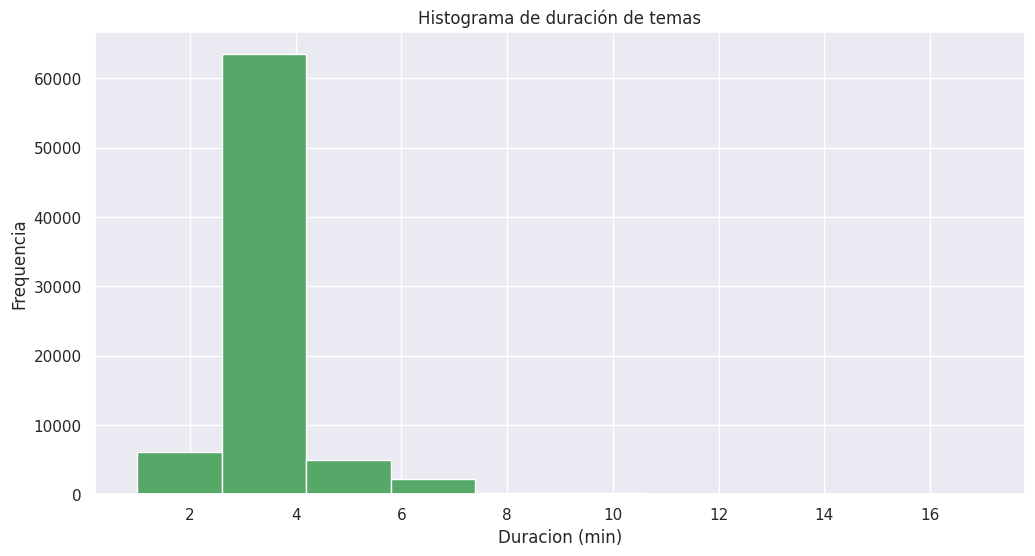

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(df_merg_charts['duracion_minutos'], bins=10, color='g')
plt.title('Histograma de duración de temas')
plt.xlabel('Duracion (min)')
plt.ylabel('Frequencia')
plt.grid(True)
plt.show()

Aquellos temas que duran más de 5 minutos y menos de 2 escapan a la habitualidad de las canciones que entran a los charts y los outliers son muy pocos, por lo tanto procederemos a quitalos.

In [ ]:
df_merg_charts = df_merg_charts[(df_merg_charts['duracion_minutos'] >= 2) & (df_merg_charts['duracion_minutos'] <= 5)]
df_merg_charts

index                track_id  \
0          0  1iJBSr7s7jYXzM8EGcbK5b   
1          1  1iJBSr7s7jYXzM8EGcbK5b   
2          2  1iJBSr7s7jYXzM8EGcbK5b   
3          3  1iJBSr7s7jYXzM8EGcbK5b   
4          4  1iJBSr7s7jYXzM8EGcbK5b   
...      ...                     ...   
77055  78764  6zN6wjHO3ALVCIQQhSqqqN   
77056  78766  0lATXmstYwzQjOLgkzvnEc   
77057  78767  1UOzgUuakMRQcKVTUTU6Pu   
77058  78768  73thBYypIRDkDz9Fw1kgCN   
77059  78770  7xzMrUmlooPa1Fmp88hlYc   

                                                 artists  \
0                                 Ingrid Michaelson;ZAYN   
1                                 Ingrid Michaelson;ZAYN   
2                                 Ingrid Michaelson;ZAYN   
3                                 Ingrid Michaelson;ZAYN   
4                                 Ingrid Michaelson;ZAYN   
...                                                  ...   
77055     Chris Tomlin;Thomas Rhett;Florida Georgia Line   
77056                                    Rend Collective   
77057  one sonic society;Essential Worship;Vertical W...   
77058                          Bethel Music;Josh Baldwin   
77059                                      Cesária Evora   

                                              album_name  \
0                                         To Begin Again   
1                                         To Begin Again   
2                                         To Begin Again   
3                                         To Begin Again   
4                                         To Begin Again   
...                                                  ...   
77055  Thank You Lord (feat. Thomas Rhett & Florida G...   
77056                         Good News (Deluxe Edition)   
77057           Goodness of God (feat. Vertical Worship)   
77058                                     Victory (Live)   
77059                                     Miss Perfumado   

                                              track_name  popularity  \
0                                         To Begin Again        0.57   
1                                         To Begin Again        0.57   
2                                         To Begin Again        0.57   
3                                         To Begin Again        0.57   
4                                         To Begin Again        0.57   
...                                                  ...         ...   
77055  Thank You Lord (feat.Thomas Rhett & Florida Ge...        0.51   
77056                            Counting Every Blessing        0.58   
77057           Goodness of God (feat. Vertical Worship)        0.52   
77058                          Stand in Your Love - Live        0.50   
77059                                             Sodade        0.59   

       explicit  danceability  energy  key  ...  valence    tempo  \
0         False         0.438   0.359    0  ...    0.120   76.332   
1         False         0.438   0.359    0  ...    0.120   76.332   
2         False         0.438   0.359    0  ...    0.120   76.332   
3         False         0.438   0.359    0  ...    0.120   76.332   
4         False         0.438   0.359    0  ...    0.120   76.332   
...         ...           ...     ...  ...  ...      ...      ...   
77055     False         0.667   0.881    9  ...    0.711  104.968   
77056     False         0.550   0.681    9  ...    0.174   89.989   
77057     False         0.255   0.674    2  ...    0.184  136.101   
77058     False         0.426   0.829    0  ...    0.524  144.834   
77059     False         0.575   0.430    8  ...    0.427   82.691   

       time_signature  track_genre  playlist_name  duracion_minutos  \
0                   4     acoustic            NaN                 4   
1                   4     acoustic            NaN                 4   
2                   4     acoustic            NaN                 4   
3                   4     acoustic            NaN                 4   
4                   4     acoustic 

##Valores nulos

In [ ]:
print(df_merg_charts.isna().sum())

index                   0
track_id                0
artists                 0
album_name              0
track_name              0
popularity              0
explicit                0
danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
time_signature          0
track_genre             0
playlist_name       42278
duracion_minutos        0
region                  0
chart_year              0
date                    0
streams             21524
dtype: int64


Sólo 2 variables poseen valores NaN

In [ ]:
df_merg_charts['playlist'] = ~df_merg_charts['playlist_name'].isna()

df_merg_charts

<ipython-input-28-1f4533617c2f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merg_charts['playlist'] = ~df_merg_charts['playlist_name'].isna()


index                track_id  \
0          0  1iJBSr7s7jYXzM8EGcbK5b   
1          1  1iJBSr7s7jYXzM8EGcbK5b   
2          2  1iJBSr7s7jYXzM8EGcbK5b   
3          3  1iJBSr7s7jYXzM8EGcbK5b   
4          4  1iJBSr7s7jYXzM8EGcbK5b   
...      ...                     ...   
77055  78764  6zN6wjHO3ALVCIQQhSqqqN   
77056  78766  0lATXmstYwzQjOLgkzvnEc   
77057  78767  1UOzgUuakMRQcKVTUTU6Pu   
77058  78768  73thBYypIRDkDz9Fw1kgCN   
77059  78770  7xzMrUmlooPa1Fmp88hlYc   

                                                 artists  \
0                                 Ingrid Michaelson;ZAYN   
1                                 Ingrid Michaelson;ZAYN   
2                                 Ingrid Michaelson;ZAYN   
3                                 Ingrid Michaelson;ZAYN   
4                                 Ingrid Michaelson;ZAYN   
...                                                  ...   
77055     Chris Tomlin;Thomas Rhett;Florida Georgia Line   
77056                                    Rend Collective   
77057  one sonic society;Essential Worship;Vertical W...   
77058                          Bethel Music;Josh Baldwin   
77059                                      Cesária Evora   

                                              album_name  \
0                                         To Begin Again   
1                                         To Begin Again   
2                                         To Begin Again   
3                                         To Begin Again   
4                                         To Begin Again   
...                                                  ...   
77055  Thank You Lord (feat. Thomas Rhett & Florida G...   
77056                         Good News (Deluxe Edition)   
77057           Goodness of God (feat. Vertical Worship)   
77058                                     Victory (Live)   
77059                                     Miss Perfumado   

                                              track_name  popularity  \
0                                         To Begin Again        0.57   
1                                         To Begin Again        0.57   
2                                         To Begin Again        0.57   
3                                         To Begin Again        0.57   
4                                         To Begin Again        0.57   
...                                                  ...         ...   
77055  Thank You Lord (feat.Thomas Rhett & Florida Ge...        0.51   
77056                            Counting Every Blessing        0.58   
77057           Goodness of God (feat. Vertical Worship)        0.52   
77058                          Stand in Your Love - Live        0.50   
77059                                             Sodade        0.59   

       explicit  danceability  energy  key  ...    tempo  time_signature  \
0         False         0.438   0.359    0  ...   76.332               4   
1         False         0.438   0.359    0  ...   76.332               4   
2         False         0.438   0.359    0  ...   76.332               4   
3         False         0.438   0.359    0  ...   76.332               4   
4         False         0.438   0.359    0  ...   76.332               4   
...         ...           ...     ...  ...  ...      ...             ...   
77055     False         0.667   0.881    9  ...  104.968               4   
77056     False         0.550   0.681    9  ...   89.989               4   
77057     False         0.255   0.674    2  ...  136.101               4   
77058     False         0.426   0.829    0  ...  144.834               4   
77059     False         0.575   0.430    8  ...   82.691               4   

       track_genre  playlist_name  duracion_minutos        region  chart_year  \
0         acoustic            NaN                 4     Argentina        2021   
1         acoustic            NaN                 4         India        2021   
2         acoustic            NaN                 4     Indones

Se agrega la columna Playlist (booleano) ya que lo que me interesa analizar es si cambia en algo que una canción esté o no en una playlist.

In [ ]:
print(df_merg_charts['track_genre'].value_counts())

track_genre
dance          10702
edm             5106
electro         4544
pop             3903
emo             3454
               ...  
black-metal        3
bluegrass          2
dubstep            1
kids               1
grindcore          1
Name: count, Length: 102, dtype: int64


El dataset posee 102 géneros ¿Cuál es la frecuencia de aparición de cada género?

Text(0, 0.5, 'Frecuencia')

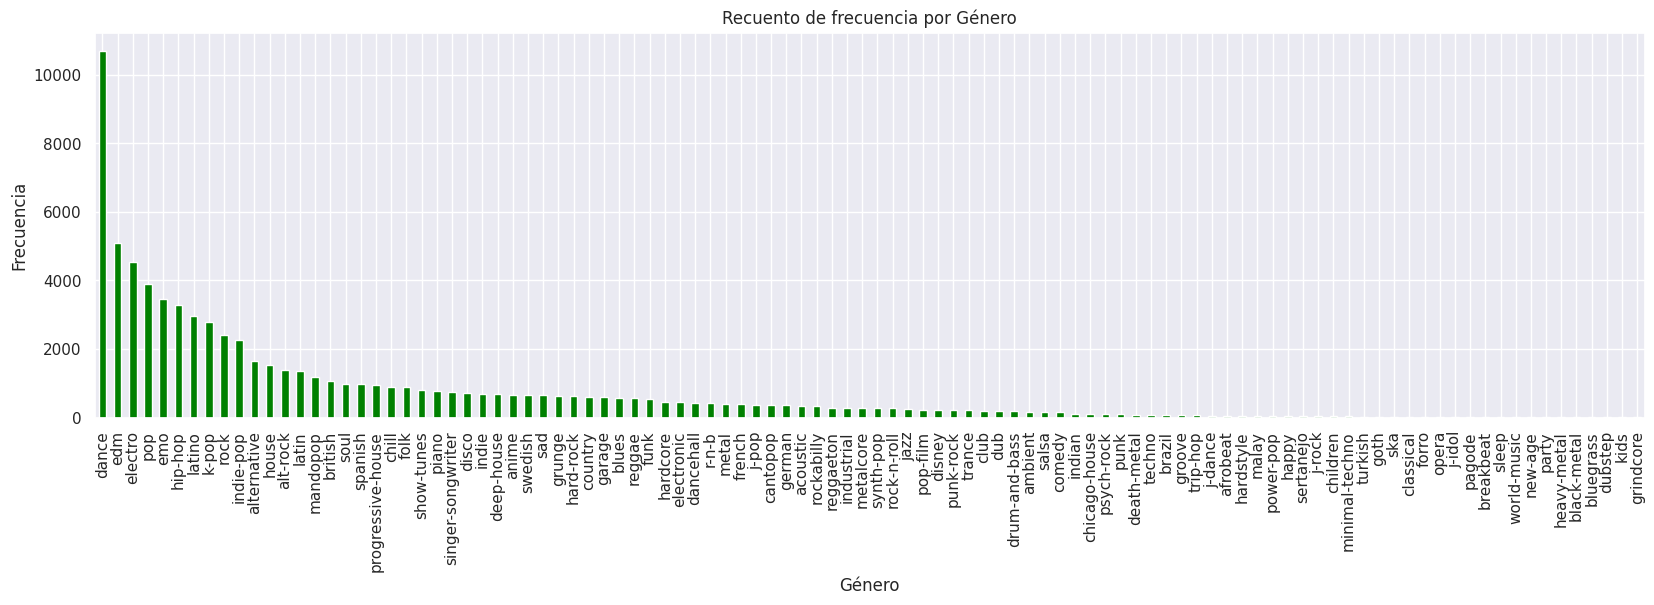

In [ ]:
plt.figure(figsize=(20,5))
df_merg_charts['track_genre'].value_counts().plot(kind='bar', color='green')

plt.title('Recuento de frecuencia por Género')
plt.xlabel('Género')
plt.ylabel('Frecuencia')

Considerando la cantidad de géneros con tan pocas canciones voy a filtrar aquellos que al menos tienen 300 canciones para que resulte representativo. También eliminaré el género Disney, Show-Tunes y Anime ya que no sigue la misma lógica de mercado que el resto al estar asociado a otro producto cultural.

In [ ]:
value_counts = df_merg_charts['track_genre'].value_counts()
valid_values = value_counts[value_counts > 300].index.tolist()
df_merg_charts = df_merg_charts[df_merg_charts['track_genre'].isin(valid_values)]
df_merg_charts = df_merg_charts[~df_merg_charts['track_genre'].isin(['disney', 'anime', 'show-tunes'])]
print(df_merg_charts['track_genre'].unique())

['acoustic' 'alt-rock' 'alternative' 'blues' 'british' 'cantopop' 'chill'
 'country' 'dance' 'dancehall' 'deep-house' 'disco' 'edm' 'electro'
 'electronic' 'emo' 'folk' 'french' 'funk' 'garage' 'german' 'grunge'
 'hard-rock' 'hardcore' 'hip-hop' 'house' 'indie-pop' 'indie' 'j-pop'
 'k-pop' 'latin' 'latino' 'mandopop' 'metal' 'piano' 'pop'
 'progressive-house' 'r-n-b' 'reggae' 'rock' 'rockabilly' 'sad'
 'singer-songwriter' 'soul' 'spanish' 'swedish']


Procedo a agrupar los géneros en géneros musicales más amplios

In [ ]:
generos = {
    'Rock': ['acoustic', 'alt-rock',  'metal', 'hardcore',  'r-n-b',  'rockabilly',  'garage', 'grunge', 'rock', 'hard-rock'],
    'Pop y Dance': [ 'singer-songwriter','pop', 'dance',  'indie', 'indie-pop', 'synth-pop', 'house' , 'progressive-house', 'edm',  'cantopop', 'disco'],
    'Hip-Hop y Rap': ['hip-hop', 'funk'],
    'Reggae y Dancehall': ['reggae', 'dancehall'],
    'Latino': ['latin', 'latino' ],
    'Jazz y Blues': ['soul','jazz', 'blues', 'chill'],
    'Folk y Country': ['folk', 'country'],
    'Música del Mundo': ['swedish', 'british', 'french', 'german','spanish'],
    'Asiatica': [ 'j-pop',  'k-pop', 'mandopop'],
    'Electrónica Experimental': [ 'electronic', 'alternative', 'electro', 'deep-house'],
    'Emocional': ['emo','sad', 'piano']
}
df_merg_charts['generos'] = df_merg_charts['track_genre'].map({genre: group for group, genres in generos.items() for genre in genres})
df_merg_charts = df_merg_charts.drop(columns=[ "track_genre"])
df_merg_charts

index                track_id                 artists  \
0          0  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
1          1  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
2          2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3          3  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
4          4  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
...      ...                     ...                     ...   
76282  77783  2Y9oTMNY5CPT4m9l6CgbgM            Zara Larsson   
76283  77784  2Y9oTMNY5CPT4m9l6CgbgM            Zara Larsson   
76284  77785  2Y9oTMNY5CPT4m9l6CgbgM            Zara Larsson   
76285  77786  2Y9oTMNY5CPT4m9l6CgbgM            Zara Larsson   
76286  77794  6zk4lFEYIWs1UZZ03NVetT                    ABBA   

                  album_name                 track_name  popularity  explicit  \
0             To Begin Again             To Begin Again        0.57     False   
1             To Begin Again             To Begin Again        0.57     False   
2             To Begin Again             To Begin Again        0.57     False   
3             To Begin Again             To Begin Again        0.57     False   
4             To Begin Again             To Begin Again        0.57     False   
...                      ...                        ...         ...       ...   
76282  Look What You've Done      Look What You've Done        0.53     False   
76283  Look What You've Done      Look What You've Done        0.53     False   
76284  Look What You've Done      Look What You've Done        0.53     False   
76285  Look What You've Done      Look What You've Done        0.53     False   
76286                Arrival  When I Kissed The Teacher        0.61     False   

       danceability  energy  key  ...    tempo  time_signature  playlist_name  \
0             0.438   0.359    0  ...   76.332               4            NaN   
1             0.438   0.359    0  ...   76.332               4            NaN   
2             0.438   0.359    0  ...   76.332               4            NaN   
3             0.438   0.359    0  ...   76.332               4            NaN   
4             0.438   0.359    0  ...   76.332               4            NaN   
...             ...     ...  ...  ...      ...             ...            ...   
76282         0.747   0.790    0  ...  117.970               4            NaN   
76283         0.747   0.790    0  ...  117.970               4            NaN   
76284         0.747   0.790    0  ...  117.970               4            NaN   
76285         0.747   0.790    0  ...  117.970               4            NaN   
76286         0.527   0.939    3  ...  153.755               4            NaN   

       duracion_minutos     region  chart_year                date  \
0                     4  Argentina        2021 2021-04-18 00:00:00   
1                     4      India        2021 2021-04-18 00:00:00   
2                     4  Indonesia        2021 2021-04-16 12:00:00   
3                     4   Malaysia        2021 2021-04-17 00:00:00   
4                     4     Norway        2021 2021-03-19 00:00:00   
...                 ...        ...         ...                 ...   
76282                 3    Finland        2021 2021-02-27 08:00:00   
76283                 3     Norway        2021 2021-03-01 00:00:00   
76284                 3     Sweden        2021 2021-03-01 00:00:00   
76285                 3     Taiwan        2021 2021-03-02 12:00:00   
76286                 3     Sweden        2021 2021-09-03 00:00:00   

            streams  playlist           generos  
0               NaN     False              Rock  
1               NaN     False              Rock  
2               NaN     False              Rock  
3               NaN     False              Rock  
4      11911.000000     False              Rock  
...             ...       ...               ...  
76282   8481.333333     False  Música del Mundo  
76283  20444.428571     False  Música del Mundo  
7

In [ ]:
df_merg_charts.region.unique()

array(['Argentina', 'India', 'Indonesia', 'Malaysia', 'Norway',
       'Philippines', 'Saudi Arabia', 'Singapore', 'South Korea',
       'Vietnam', 'Andorra', 'Australia', 'Austria', 'Belgium',
       'Bulgaria', 'Egypt', 'Estonia', 'Finland', 'Greece', 'Honduras',
       'Hungary', 'Iceland', 'Ireland', 'Israel', 'Latvia', 'Lithuania',
       'Luxembourg', 'Nicaragua', 'Romania', 'South Africa',
       'Switzerland', 'United Arab Emirates', 'El Salvador', 'Paraguay',
       'Dominican Republic', 'Japan', 'Thailand', 'Hong Kong', 'Taiwan',
       'France', 'Peru', 'Canada', 'Spain', 'Netherlands', 'Poland',
       'Turkey', 'Bolivia', 'Ecuador', 'Italy', 'United Kingdom',
       'Uruguay', 'Costa Rica', 'New Zealand', 'Denmark', 'Germany',
       'Sweden', 'Czech Republic', 'Brazil', 'Colombia', 'Guatemala',
       'Panama', 'Portugal', 'Russia', 'Slovakia', 'Ukraine',
       'United States', 'Morocco', 'Chile', 'Mexico'], dtype=object)

Procedo a realizar lo mismo con los países y continentes.

In [ ]:
continentes = {
    'Asia': ['India', 'Indonesia', 'Malaysia', 'Philippines', 'Saudi Arabia', 'Singapore', 'South Korea', 'Vietnam', 'Japan', 'Thailand', 'Hong Kong', 'Taiwan', "United Arab Emirates", "Russia"],
    'Europa': ["Spain", 'Norway', 'Andorra', 'Austria', 'Belgium', 'Bulgaria', 'Estonia', 'Finland', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Latvia', 'Lithuania', 'Luxembourg', 'Romania', 'Switzerland', 'France', 'Netherlands', 'Poland', 'Turkey', 'Italy', 'United Kingdom', 'Denmark', 'Germany', 'Sweden', 'Czech Republic', 'Portugal', 'Slovakia', 'Ukraine'],
    'Sudamérica': ['Argentina', 'Brazil', 'Bolivia', 'Ecuador', 'Peru', 'Uruguay', 'Chile', 'Colombia', 'Paraguay'],
    'Centroamérica': ['Honduras', 'Nicaragua', 'Panama', 'Guatemala', 'Costa Rica', 'El Salvador', 'Dominican Republic'],
    'Norteamérica': ['Mexico', 'United States', 'Canada'],
    'Oceanía': ['Australia', 'New Zealand'],
    'África': ['South Africa', 'Morocco',"Egypt"	]
}
def asignar_continente(region):
    for continente, paises in continentes.items():
        if region in paises:
            return continente
    return None  # Si el país no está en ningún continente

df_merg_charts['continente'] = df_merg_charts['region'].apply(asignar_continente)
df_merg_charts= df_merg_charts[df_merg_charts['region'] != 'Global']
df_merg_charts['featuring'] = df_merg_charts['artists'].str.contains(';') #Además agrego una columna Featuring(booleano) para evaluar si la canción es de un solista o es un tema compartido.

df_merg_charts['featuring'] = df_merg_charts['featuring'].map({True: True, False: False})

df_merg_charts


index                track_id                 artists  \
0          0  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
1          1  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
2          2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3          3  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
4          4  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
...      ...                     ...                     ...   
76282  77783  2Y9oTMNY5CPT4m9l6CgbgM            Zara Larsson   
76283  77784  2Y9oTMNY5CPT4m9l6CgbgM            Zara Larsson   
76284  77785  2Y9oTMNY5CPT4m9l6CgbgM            Zara Larsson   
76285  77786  2Y9oTMNY5CPT4m9l6CgbgM            Zara Larsson   
76286  77794  6zk4lFEYIWs1UZZ03NVetT                    ABBA   

                  album_name                 track_name  popularity  explicit  \
0             To Begin Again             To Begin Again        0.57     False   
1             To Begin Again             To Begin Again        0.57     False   
2             To Begin Again             To Begin Again        0.57     False   
3             To Begin Again             To Begin Again        0.57     False   
4             To Begin Again             To Begin Again        0.57     False   
...                      ...                        ...         ...       ...   
76282  Look What You've Done      Look What You've Done        0.53     False   
76283  Look What You've Done      Look What You've Done        0.53     False   
76284  Look What You've Done      Look What You've Done        0.53     False   
76285  Look What You've Done      Look What You've Done        0.53     False   
76286                Arrival  When I Kissed The Teacher        0.61     False   

       danceability  energy  key  ...  playlist_name  duracion_minutos  \
0             0.438   0.359    0  ...            NaN                 4   
1             0.438   0.359    0  ...            NaN                 4   
2             0.438   0.359    0  ...            NaN                 4   
3             0.438   0.359    0  ...            NaN                 4   
4             0.438   0.359    0  ...            NaN                 4   
...             ...     ...  ...  ...            ...               ...   
76282         0.747   0.790    0  ...            NaN                 3   
76283         0.747   0.790    0  ...            NaN                 3   
76284         0.747   0.790    0  ...            NaN                 3   
76285         0.747   0.790    0  ...            NaN                 3   
76286         0.527   0.939    3  ...            NaN                 3   

          region  chart_year                date       streams  playlist  \
0      Argentina        2021 2021-04-18 00:00:00           NaN     False   
1          India        2021 2021-04-18 00:00:00           NaN     False   
2      Indonesia        2021 2021-04-16 12:00:00           NaN     False   
3       Malaysia        2021 2021-04-17 00:00:00           NaN     False   
4         Norway        2021 2021-03-19 00:00:00  11911.000000     False   
...          ...         ...                 ...           ...       ...   
76282    Finland        2021 2021-02-27 08:00:00   8481.333333     False   
76283     Norway        2021 2021-03-01 00:00:00  20444.428571     False   
76284     Sweden        2021 2021-03-01 00:00:00  63375.857143     False   
76285     Taiwan        2021 2021-03-02 12:00:00   6239.500000     False   
76286     Sweden        2021 2021-09-03 00:00:00  25641.000000     False   

                generos  continente featuring  
0                  Rock  Sudamérica      True  
1                  Rock        Asia      True  
2                  Rock        Asia      True  
3                  Rock        Asia      True  
4                  Rock      Europa      True  
...                 ...         ...       ...  
76282  Música del Mundo      Europa     False  
76283  Música del Mundo      Europa     False  
76284  Música del Mundo      Eu

In [ ]:
df_merg_charts= df_merg_charts.drop(columns=["playlist_name","region","date"]) #Se dropean estas 3 columnas que fueron reemplazadas con lo que buscaba de cada una de ellas
df_merg_charts.isna().sum()

index                   0
track_id                0
artists                 0
album_name              0
track_name              0
popularity              0
explicit                0
danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
time_signature          0
duracion_minutos        0
chart_year              0
streams             17893
playlist                0
generos                 0
continente              0
featuring               0
dtype: int64

En el dataset quedan, en este momento, 25 columnas:


*   **Track_id**: id dentro de Spotify de cada canción
*   **Artists**: Artista
*   **Albumn_name**: Nombre del album
*   **Track_name**: Nombre de la canción
*   **Popularity**: Popularida de la canción
*   **Explicit**: Booleano que indica si la canción tiene letras explicitas o no
*   **Danceability**: La bailabilidad describe qué tan adecuada es una pista para bailar en función de una combinación de elementos musicales, incluidos el tempo, la estabilidad del ritmo, la fuerza del compás y la regularidad general. Un valor de 0,0 es menos bailable y 1,0 es más bailable.
*   **Energy**: La energía es una medida de 0,0 a 1,0 y representa una medida perceptiva de intensidad y actividad. Por lo general, las pistas energéticas se sienten rápidas, fuertes y ruidosas.
*   **Key**: La tonalidad en la que se encuentra la pista. Los números enteros se asignan a tonos utilizando la notación de clase de tono estándar. Por ejemplo, 0 = C, 1 = C♯/D♭, 2 = D, y así sucesivamente.
*   **Loudness**: La sonoridad general de una pista en decibeles (dB)
*   **Mode**: El modo indica la modalidad (mayor o menor) de una pista, el tipo de escala de la que se deriva su contenido melódico. El modo mayor se representa con 1 y el modo menor con 0.
*   **Speechiness**: Speechiness detecta la presencia de palabras habladas en una pista. Cuanto más parecida a una voz sea la grabación (por ejemplo, un programa de entrevistas, un audiolibro, una poesía), más cercano a 1,0 será el valor del atributo.
*   **Acousticness**: Medida de confianza de 0,0 a 1,0 sobre si la pista es acústica. 1,0 representa una alta confianza en que la pista es acústica.
*   **Instrumentalness**: Predice si una pista no contiene voces. Los sonidos "ooh" y "aah" se consideran instrumentales en este contexto. Las pistas de rap o de palabra hablada son claramente "vocales". Cuanto más cercano esté el valor de instrumentalidad a 1,0, mayor será la probabilidad de que la pista no contenga contenido vocal.
*   **Liveness**: Detecta la presencia de público en la grabación. Los valores de vivacidad más altos representan una mayor probabilidad de que la pista se haya interpretado en vivo.
*   **Valence**: Medida de 0,0 a 1,0 que describe la positividad musical que transmite una pista. Las pistas con una valencia alta suenan más positivas (por ejemplo, felices, alegres, eufóricas), mientras que las pistas con una valencia baja suenan más negativas (por ejemplo, tristes, deprimidas, enojadas).
*   **Tempo**: El tempo general estimado de una pista en pulsaciones por minuto (PPM). En terminología musical, el tempo es la velocidad o el ritmo de una pieza determinada y se deriva directamente de la duración media de las pulsaciones.
*   **Time_signature**:Un compás estimado. El compás es una convención de notación que especifica cuántos pulsos hay en cada compás. El compás varía de 3 a 7, lo que indica compases de 3/4 a 7/4.
*   **Generos**: Género de la canción.
*   **Playlist**: Boolean para saber si está dentro de una playlist o no
*   **Duracion_minutos**: Duracion de la canción en minutos
*   **Continente**: Region del chart
*   **Chart_year**: Año del chart
*   **Featuring**: Canción solista o con feature
*   **Streams**: Cantidad de streams

In [ ]:
df_merg_charts.describe()

index    popularity  danceability        energy           key  \
count  67633.000000  67633.000000  67633.000000  67633.000000  67633.000000   
mean   38560.529697      0.736661      0.656512      0.645836      5.359011   
std    21877.671244      0.092849      0.136494      0.177284      3.538080   
min        0.000000      0.460000      0.085400      0.003800      0.000000   
25%    19569.000000      0.680000      0.574000      0.524000      2.000000   
50%    37847.000000      0.750000      0.671000      0.670000      6.000000   
75%    57089.000000      0.810000      0.754000      0.782000      8.000000   
max    77794.000000      0.930000      0.980000      0.998000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  67633.000000  67633.000000  67633.000000  67633.000000   
mean      -6.275931      0.587465      0.086394      0.238810   
std        2.725936      0.492294      0.082992      0.251557   
min      -36.700000      0.000000      0.022300      0.000005   
25%       -7.498000      0.000000      0.036700      0.035800   
50%       -5.745000      1.000000      0.054200      0.155000   
75%       -4.407000      1.000000      0.096300      0.368000   
max        1.023000      1.000000      0.889000      0.995000   

       instrumentalness      liveness       valence         tempo  \
count      67633.000000  67633.000000  67633.000000  67633.000000   
mean           0.022865      0.173968      0.490599    120.396585   
std            0.111959      0.128432      0.225381     27.344314   
min            0.000000      0.020200      0.025800     48.578000   
25%            0.000000      0.094200      0.315000     99.959000   
50%            0.000000      0.124000      0.486000    119.843000   
75%            0.000080      0.209000      0.661000    136.041000   
max            0.954000      0.971000      0.975000    216.334000   

       time_signature  duracion_minutos    chart_year       streams  
count    67633.000000      67633.000000  67633.000000  4.974000e+04  
mean         3.960286          3.424127   2019.225984  2.613036e+04  
std          0.273238          0.715307      1.398538  5.392259e+04  
min          1.000000          2.000000   2017.000000  1.001000e+03  
25%          4.000000          3.000000   2018.000000  2.739255e+03  
50%          4.000000          3.000000   2019.000000  7.066140e+03  
75%          4.000000          4.000000   2021.000000  2.638773e+04  
max          5.000000          5.000000   2021.000000  1.046853e+06

#Análisis exploratorio de datos

Text(0, 0.5, 'Frecuencia')

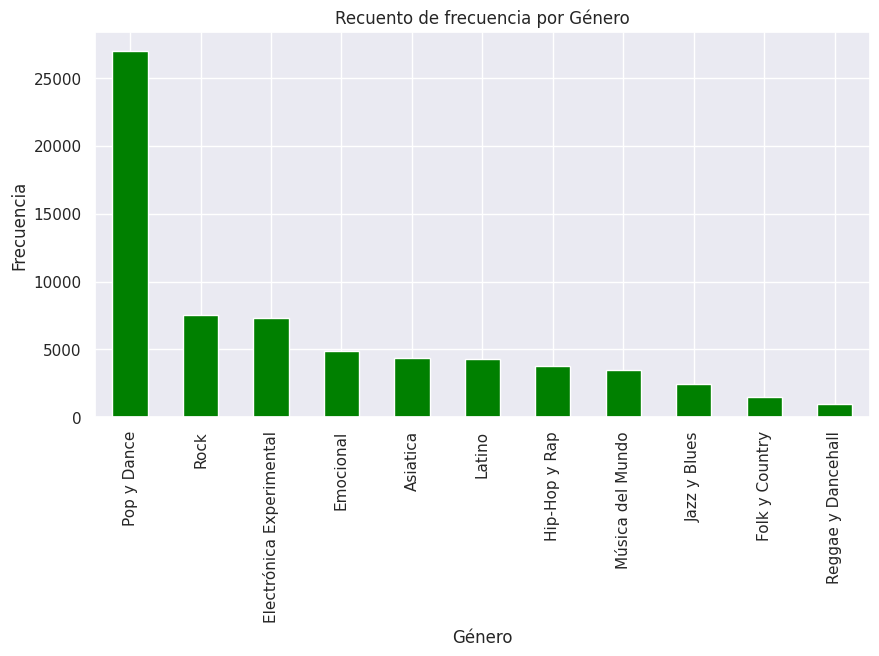

In [ ]:
plt.figure(figsize=(10,5))
df_merg_charts['generos'].value_counts().plot(kind='bar', color='green')

plt.title('Recuento de frecuencia por Género')
plt.xlabel('Género')
plt.ylabel('Frecuencia')

Dentro de los grandes géneros, la mayor parte de las canciones que se encuentran en los charts son del Género Pop y Dance.

In [ ]:
streamsxgenero = df_merg_charts.groupby('generos')['streams'].sum()
streamsxgenero

generos
Asiatica                    3.726504e+07
Electrónica Experimental    1.198784e+08
Emocional                   8.619505e+07
Folk y Country              3.387938e+07
Hip-Hop y Rap               9.678127e+07
Jazz y Blues                3.016320e+07
Latino                      1.335466e+08
Música del Mundo            6.187811e+07
Pop y Dance                 5.626449e+08
Reggae y Dancehall          1.706297e+07
Rock                        1.204291e+08
Name: streams, dtype: float64

Text(0, 0.5, 'Streams')

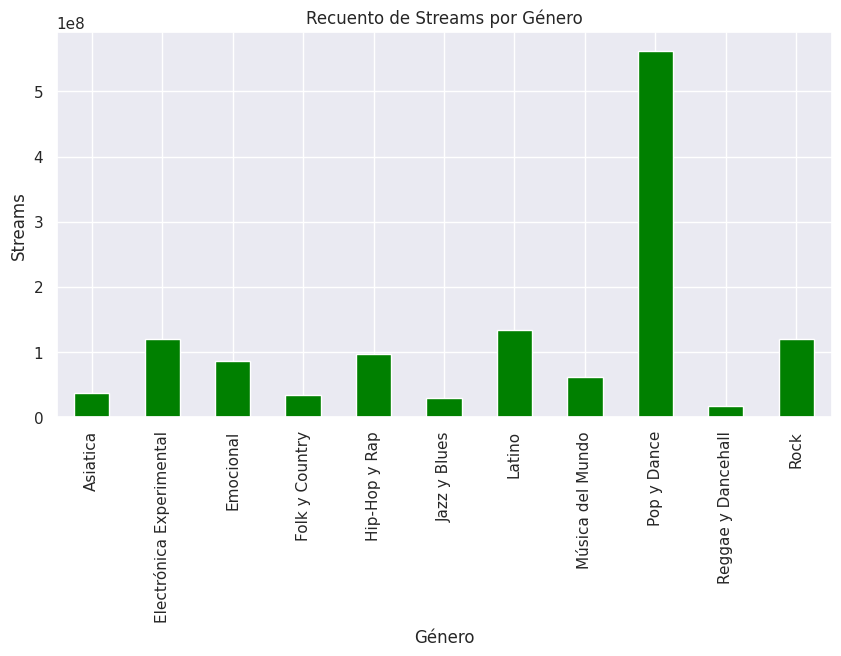

In [ ]:
plt.figure(figsize=(10, 5))
streamsxgenero.plot(kind='bar', color='green')

plt.title('Recuento de Streams por Género')
plt.xlabel('Género')
plt.ylabel('Streams')

Como se puede ver el género con más cantidad de canciones y más streams es el Pop y Dance

¿Cuál es la media de popularidad de cada género?

Text(0, 0.5, 'Popularidad')

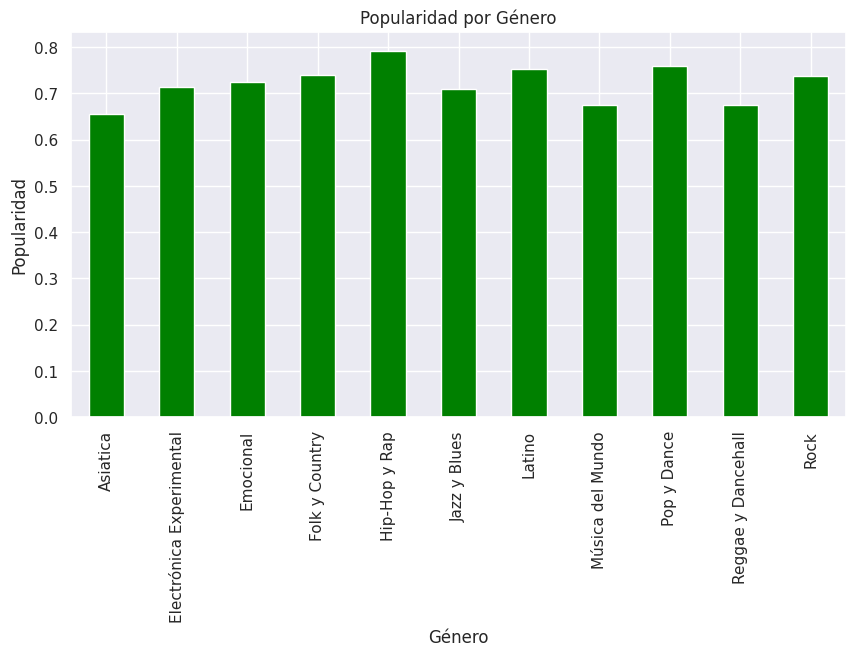

In [ ]:
popxgenero = df_merg_charts.groupby('generos')['popularity'].mean()
plt.figure(figsize=(10, 5))
popxgenero.plot(kind='bar', color='green')

plt.title('Popularidad por Género')
plt.xlabel('Género')
plt.ylabel('Popularidad')

Si bien las medias están bastante parejas, el Hip Hop y Rap, la música latina, el Rock y el Pop y Dance son los 4 grandes géneros con la media más alta de popularidad.

Text(0.5, 1.0, 'Frecuencia por continente')

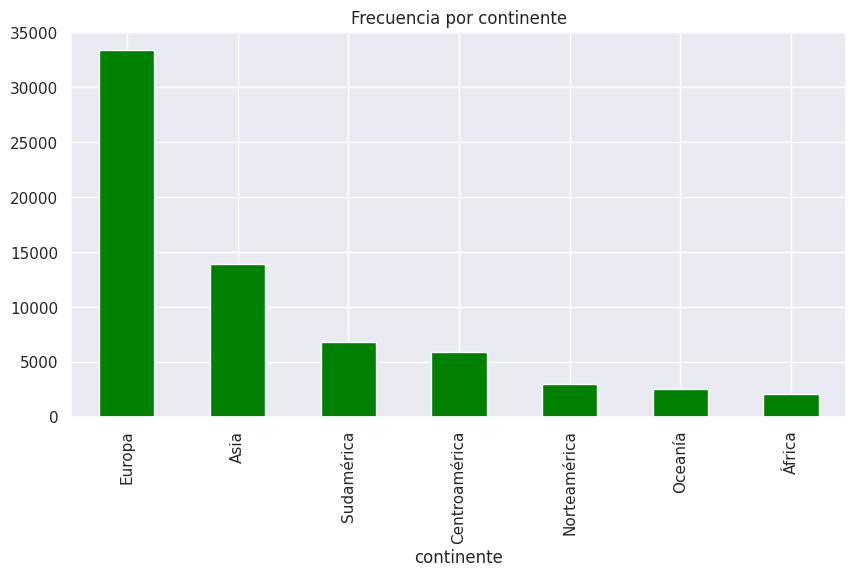

In [ ]:
plt.figure(figsize=(10,5))

df_merg_charts['continente'].value_counts().plot(kind='bar', color="green")
plt.title('Frecuencia por continente')

Si bien Norteamérica tiene más streams, Europa parece tener la mayor variabilidad en los tops de los países. Podríamos pensar un consumo bastante menos uniforme en su música.

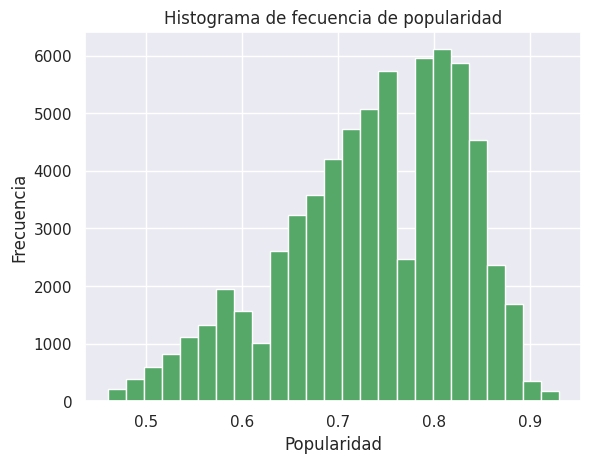

In [ ]:
plt.hist(df_merg_charts['popularity'], bins=25, color="g")
plt.xlabel('Popularidad')
plt.ylabel('Frecuencia')
plt.title('Histograma de fecuencia de popularidad')
plt.grid(True)


plt.show()

Como es posible observar hay una tendencia a valores elevados de popularidad en las playlists analizadas, lo cuál es previsible considerando que son las canciones con más popularidad en las diversas regiones y una desviación hacia la izquierda donde los valores son menores.

¿Dónde se encuentran los valores más comunes de la popularidad por géneros y cuáles son los outliers?

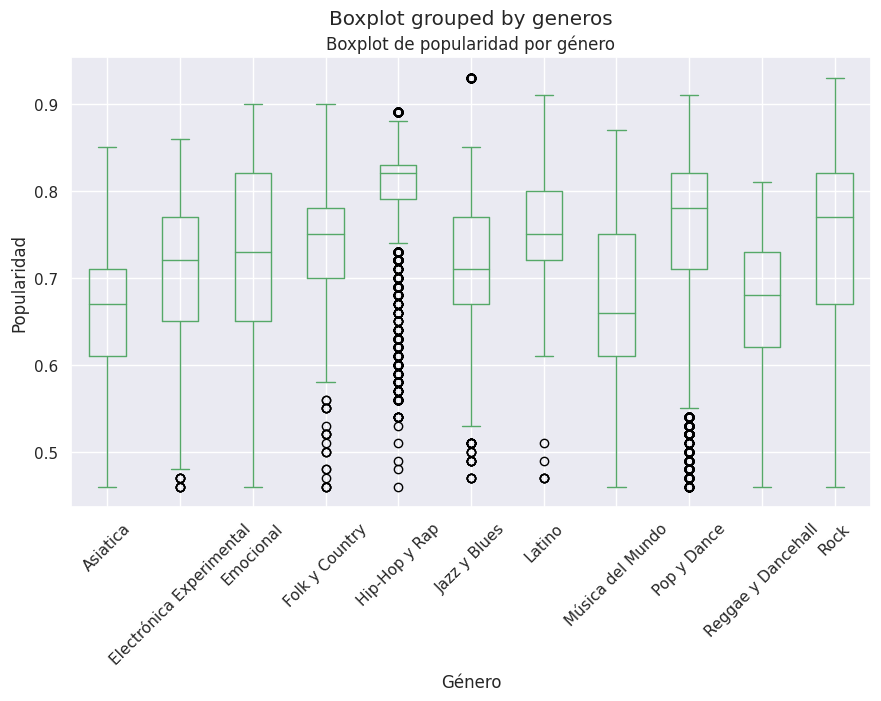

In [ ]:

fig, ax = plt.subplots(figsize=(10, 6))
df_merg_charts.boxplot(column='popularity', by="generos", ax=ax, color="g")
ax.set_title('Boxplot de popularidad por género')
ax.set_ylabel('Popularidad')
ax.set_xlabel('Género')
plt.xticks(rotation=45)
plt.show()


Es posible ver mucha variación en la popularidad entre los diferentes géneros. Tenemos géneros muy compactos con valores muy altos como el Hip Hop y Rap, o algunos altamente variables como el Rock. De esta manera, voy a sacar aquellos outliers groseros como tenemos en el género Hip-Hop.

In [ ]:
genres = df_merg_charts['generos'].unique()
def remove_outliers(df, var):

    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1


    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return df[(df[var] >= lower_bound) & (df[var] <= upper_bound)]

df_cleaned = df_merg_charts.copy()

for genre in genres:
    genre_data = df_cleaned[df_cleaned['generos'] == genre]

    cleaned_genre_data = remove_outliers(genre_data, 'popularity')

    df_cleaned = pd.concat([
        df_cleaned[df_cleaned['generos'] != genre],
        cleaned_genre_data
    ], ignore_index=True)

df_merg_charts = df_cleaned



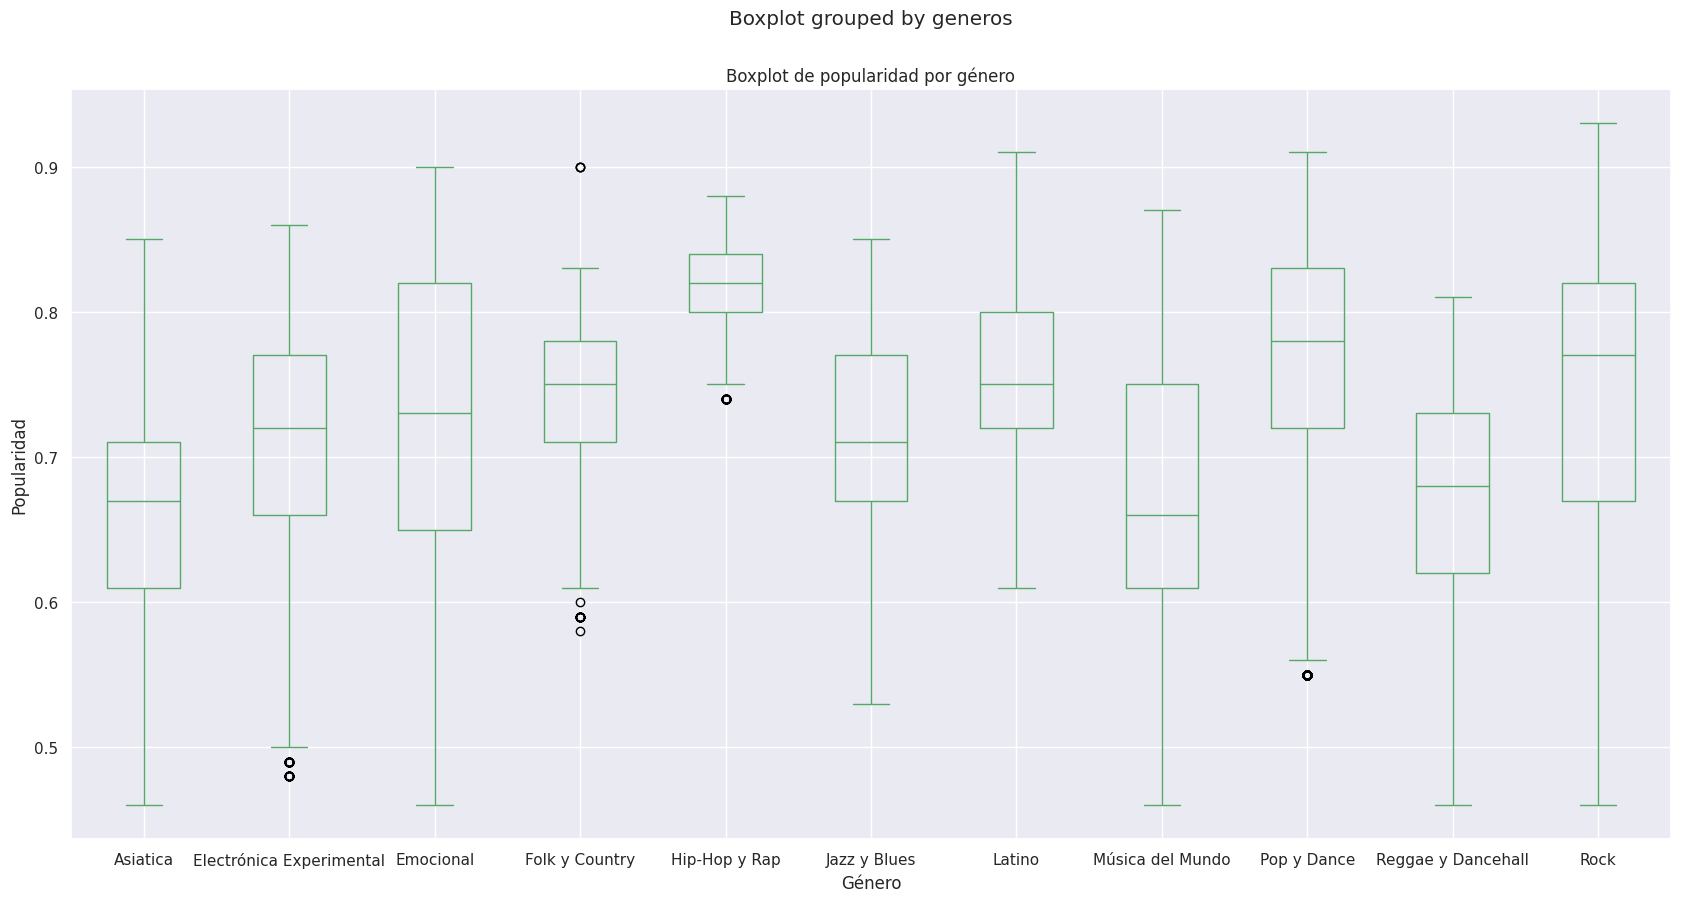

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))


df_merg_charts.boxplot(column='popularity', by="generos", ax=ax, color="g") , #showfliers=False)

ax.set_title('Boxplot de popularidad por género')
ax.set_xlabel('Género')
ax.set_ylabel('Popularidad')


plt.show()

<ipython-input-46-40e1d5feb03e>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-46-40e1d5feb03e>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-46-40e1d5feb03e>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-46-40e1d5feb03e>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-46-40e1d5feb03e>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-46-40e1d5feb03e>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xtickla

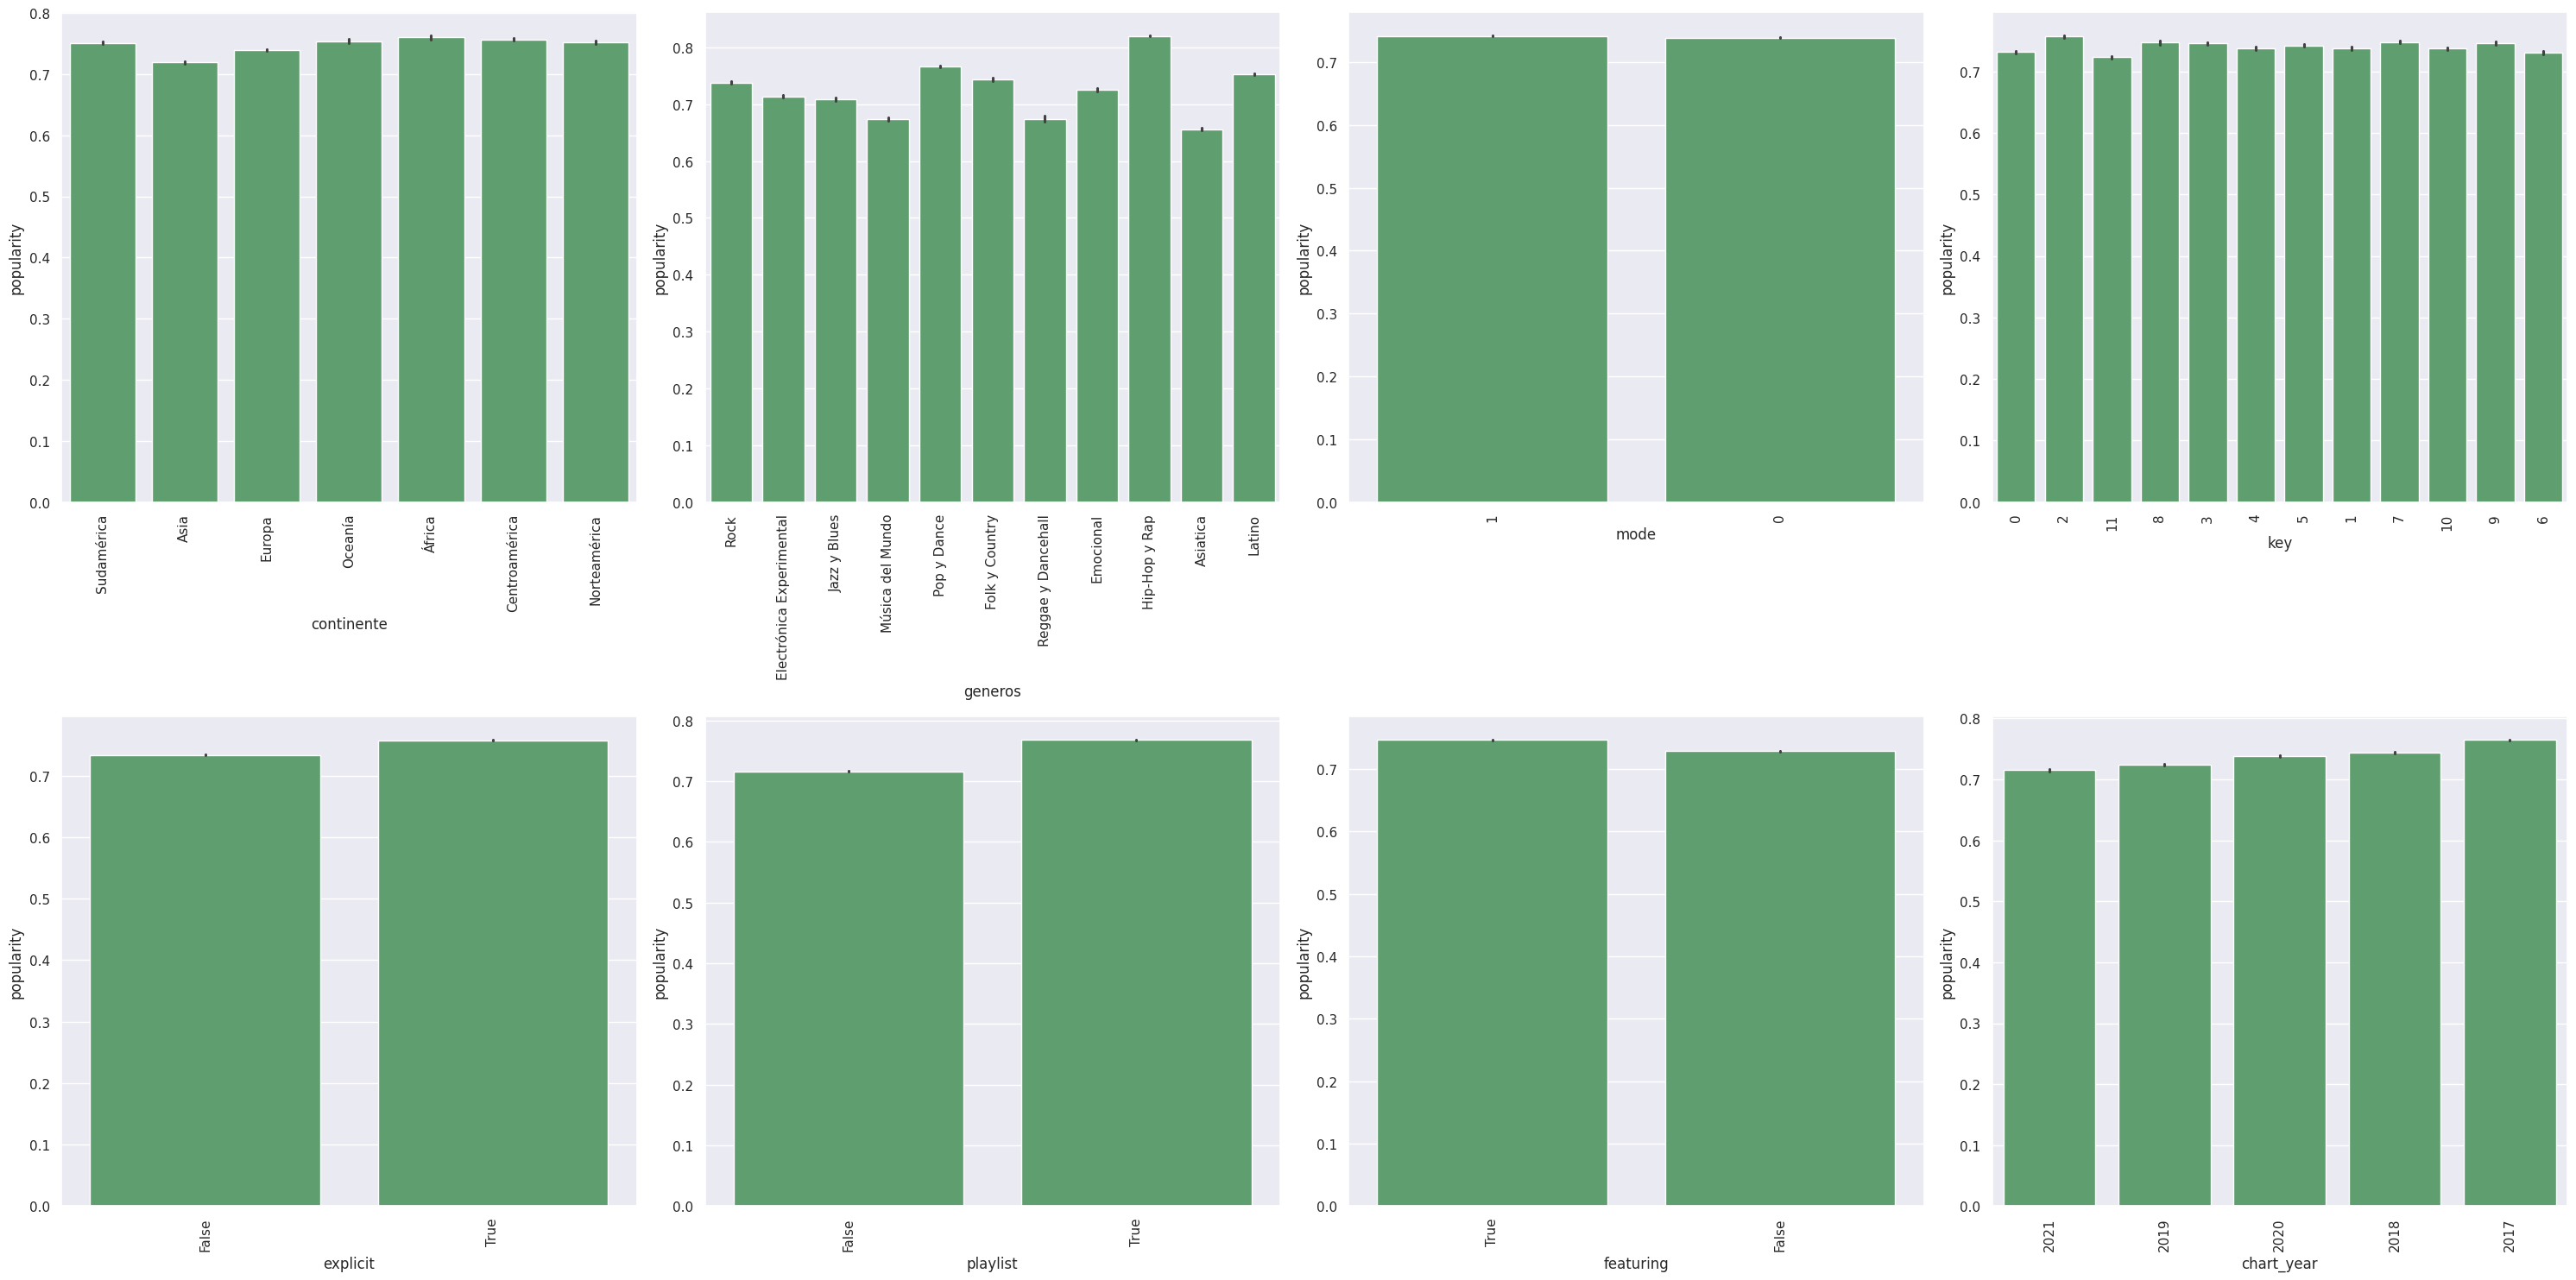

In [ ]:
#Análisis de las variables categóricas con respecto a la popularidad
cat_vars = ['continente', 'generos', 'mode', 'key', 'explicit', 'playlist', 'featuring', 'chart_year']

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(30, 15))
axs = axs.flatten()

for i, var in enumerate(cat_vars):
    sns.barplot(x=var, y='popularity', data=df_merg_charts, ax=axs[i], estimator=np.mean, color="g")
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
    axs[i].set_xticks(range(len(df_merg_charts[var].unique())))
    axs[i].set_xticklabels(df_merg_charts[var].unique(), rotation=90)


fig.tight_layout()
plt.show()

Si bien es leve pareciera ser que si la canción contiene contenido explicito le brinda mayor popularidad, lo mismo si está en una playlist. Por otro lado, pensé que tener una canción feat otro artista subiría bastante la popularidad de la canción pero la distancia no es tanta.

Hacemos la misma evaluación pero con los streams considerando que es la variable que tiene valores faltantes ¿Qué pasa con aquellos que sí tenemos?

<ipython-input-47-17743f135e05>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-47-17743f135e05>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-47-17743f135e05>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-47-17743f135e05>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-47-17743f135e05>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-47-17743f135e05>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_x

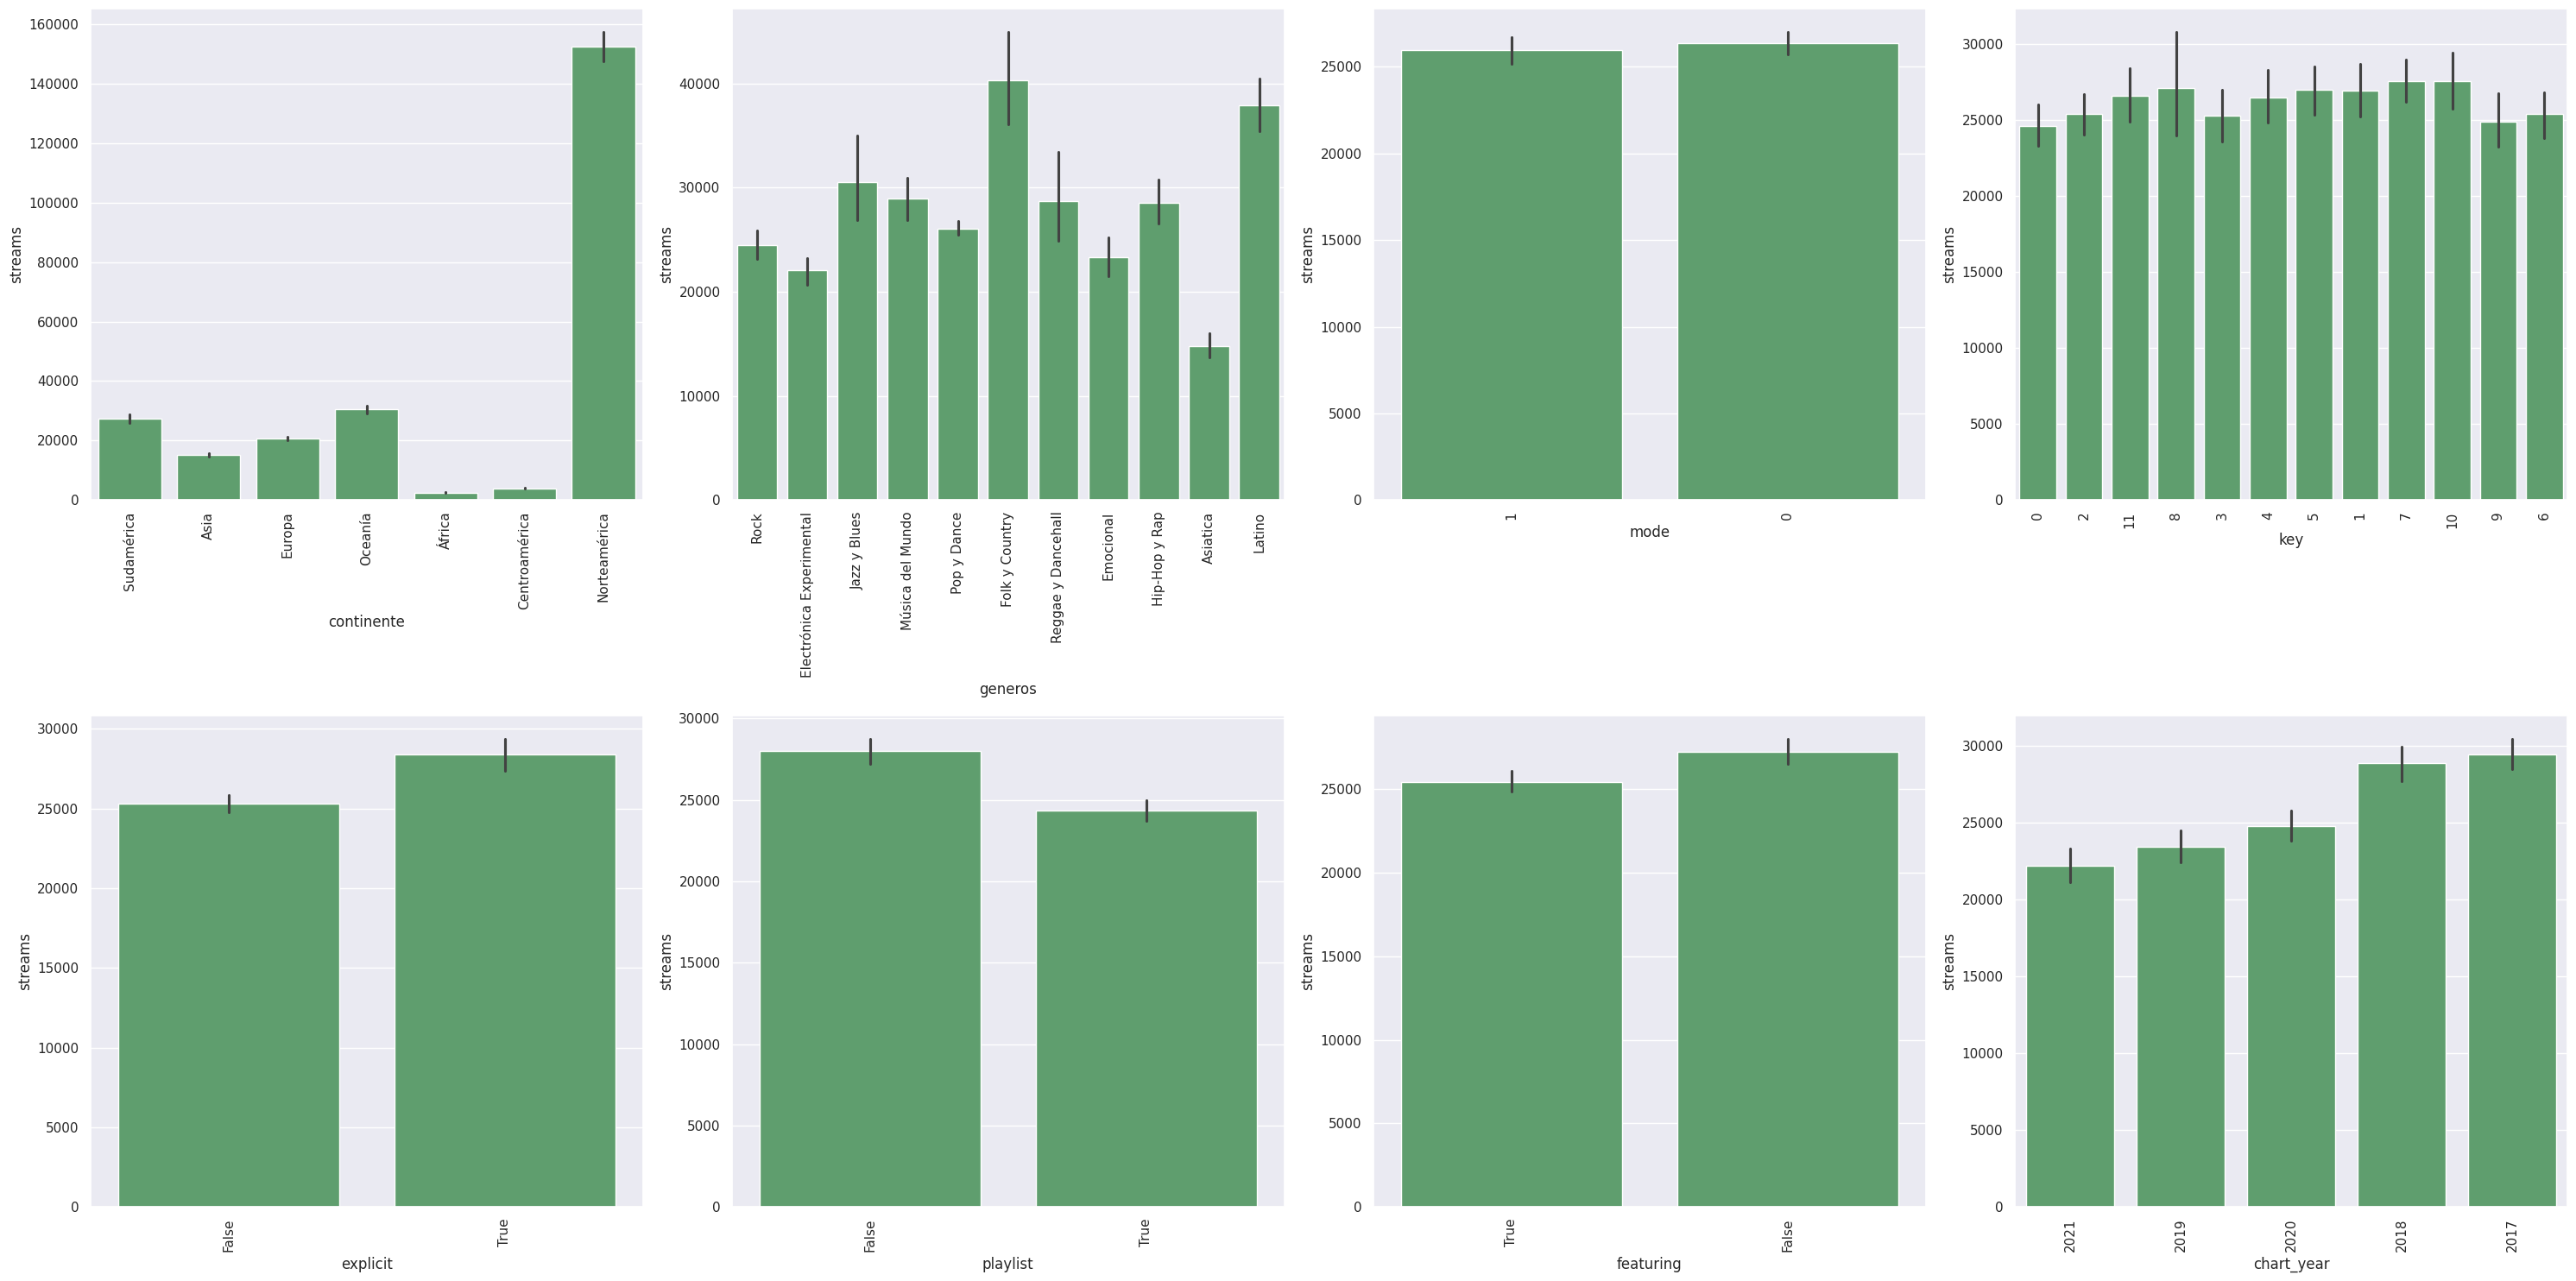

In [ ]:
# Análisis de las variables categóricas con respecto a la cantidad de streams
cat_vars = ['continente', 'generos', 'mode', 'key', 'explicit', 'playlist', 'featuring', 'chart_year']

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(30, 15))
axs = axs.flatten()


for i, var in enumerate(cat_vars):
    sns.barplot(x=var, y='streams', data=df_merg_charts, ax=axs[i], estimator=np.mean, color="g")
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
    axs[i].set_xticks(range(len(df_merg_charts[var].unique())))  # Set tick positions
    axs[i].set_xticklabels(df_merg_charts[var].unique(), rotation=90)  # Set tick labels


fig.tight_layout()

plt.show()

De manera más marcada pareciera que se streamean más canciones con contenido explicito, menos si están incluidas en playlists (lo cual me resulta llamativo), menos si son canciones de varios artistas y la importancia del año en que llegó a formar parte del top, mientras con mayor anterioridad más streams tiene. Norteamerica sigue siendo el continente con mayor streams.

##Inclusión de valores faltantes

In [ ]:
df_completo = df_merg_charts.interpolate(method="linear")
df_completo

index                track_id                 artists      album_name  \
0          0  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN  To Begin Again   
1          1  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN  To Begin Again   
2          2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN  To Begin Again   
3          3  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN  To Begin Again   
4          4  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN  To Begin Again   
...      ...                     ...                     ...             ...   
66024  59032  0JAZWvvqttGFm4UMDsPQXC            Ozuna;Camilo            Enoc   
66025  59033  0JAZWvvqttGFm4UMDsPQXC            Ozuna;Camilo            Enoc   
66026  59034  0JAZWvvqttGFm4UMDsPQXC            Ozuna;Camilo            Enoc   
66027  59035  0JAZWvvqttGFm4UMDsPQXC            Ozuna;Camilo            Enoc   
66028  59036  0JAZWvvqttGFm4UMDsPQXC            Ozuna;Camilo            Enoc   

           track_name  popularity  explicit  danceability  energy  key  ...  \
0      To Begin Again        0.57     False         0.438   0.359    0  ...   
1      To Begin Again        0.57     False         0.438   0.359    0  ...   
2      To Begin Again        0.57     False         0.438   0.359    0  ...   
3      To Begin Again        0.57     False         0.438   0.359    0  ...   
4      To Begin Again        0.57     False         0.438   0.359    0  ...   
...               ...         ...       ...           ...     ...  ...  ...   
66024      Despeinada        0.70     False         0.734   0.775    8  ...   
66025      Despeinada        0.70     False         0.734   0.775    8  ...   
66026      Despeinada        0.70     False         0.734   0.775    8  ...   
66027      Despeinada        0.70     False         0.734   0.775    8  ...   
66028      Despeinada        0.70     False         0.734   0.775    8  ...   

       valence    tempo  time_signature  duracion_minutos  chart_year  \
0         0.12   76.332               4                 4        2021   
1         0.12   76.332               4                 4        2021   
2         0.12   76.332               4                 4        2021   
3         0.12   76.332               4                 4        2021   
4         0.12   76.332               4                 4        2021   
...        ...      ...             ...               ...         ...   
66024     0.72  166.039               4                 4        2021   
66025     0.72  166.039               4                 4        2020   
66026     0.72  166.039               4                 4        2021   
66027     0.72  166.039               4                 4        2020   
66028     0.72  166.039               4                 4        2021   

             streams  playlist  generos    continente  featuring  
0                NaN     False     Rock    Sudamérica       True  
1                NaN     False     Rock          Asia       True  
2                NaN     False     Rock          Asia       True  
3                NaN     False     Rock          Asia       True  
4       11911.000000     False     Rock        Europa       True  
...              ...       ...      ...           ...        ...  
66024   76640.990033     False   Latino        Europa       True  
66025   17663.512605     False   Latino    Sudamérica       True  
66026    4907.013289     False   Latino    Sudamérica       True  
66027  188252.234783     False   Latino  Norteamérica       True  
66028  132361.873950     False   Latino  Norteamérica       True  

[66029 rows x 26 columns]

In [ ]:
df_completo.isna().sum()
df_completo.dropna(subset=['streams'], inplace=True)
df_completo.reset_index(drop=True, inplace=True)
df_completo

index                track_id                 artists      album_name  \
0          4  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN  To Begin Again   
1          5  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN  To Begin Again   
2          6  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN  To Begin Again   
3          7  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN  To Begin Again   
4          8  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN  To Begin Again   
...      ...                     ...                     ...             ...   
66020  59032  0JAZWvvqttGFm4UMDsPQXC            Ozuna;Camilo            Enoc   
66021  59033  0JAZWvvqttGFm4UMDsPQXC            Ozuna;Camilo            Enoc   
66022  59034  0JAZWvvqttGFm4UMDsPQXC            Ozuna;Camilo            Enoc   
66023  59035  0JAZWvvqttGFm4UMDsPQXC            Ozuna;Camilo            Enoc   
66024  59036  0JAZWvvqttGFm4UMDsPQXC            Ozuna;Camilo            Enoc   

           track_name  popularity  explicit  danceability  energy  key  ...  \
0      To Begin Again        0.57     False         0.438   0.359    0  ...   
1      To Begin Again        0.57     False         0.438   0.359    0  ...   
2      To Begin Again        0.57     False         0.438   0.359    0  ...   
3      To Begin Again        0.57     False         0.438   0.359    0  ...   
4      To Begin Again        0.57     False         0.438   0.359    0  ...   
...               ...         ...       ...           ...     ...  ...  ...   
66020      Despeinada        0.70     False         0.734   0.775    8  ...   
66021      Despeinada        0.70     False         0.734   0.775    8  ...   
66022      Despeinada        0.70     False         0.734   0.775    8  ...   
66023      Despeinada        0.70     False         0.734   0.775    8  ...   
66024      Despeinada        0.70     False         0.734   0.775    8  ...   

       valence    tempo  time_signature  duracion_minutos  chart_year  \
0         0.12   76.332               4                 4        2021   
1         0.12   76.332               4                 4        2021   
2         0.12   76.332               4                 4        2021   
3         0.12   76.332               4                 4        2021   
4         0.12   76.332               4                 4        2021   
...        ...      ...             ...               ...         ...   
66020     0.72  166.039               4                 4        2021   
66021     0.72  166.039               4                 4        2020   
66022     0.72  166.039               4                 4        2021   
66023     0.72  166.039               4                 4        2020   
66024     0.72  166.039               4                 4        2021   

             streams  playlist  generos    continente  featuring  
0       11911.000000     False     Rock        Europa       True  
1       13903.833333     False     Rock          Asia       True  
2       15896.666667     False     Rock          Asia       True  
3       17889.500000     False     Rock          Asia       True  
4       19882.333333     False     Rock          Asia       True  
...              ...       ...      ...           ...        ...  
66020   76640.990033     False   Latino        Europa       True  
66021   17663.512605     False   Latino    Sudamérica       True  
66022    4907.013289     False   Latino    Sudamérica       True  
66023  188252.234783     False   Latino  Norteamérica       True  
66024  132361.873950     False   Latino  Norteamérica       True  

[66025 rows x 26 columns]

<ipython-input-50-9fd58403ae09>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-50-9fd58403ae09>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-50-9fd58403ae09>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-50-9fd58403ae09>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-50-9fd58403ae09>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-50-9fd58403ae09>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xtickla

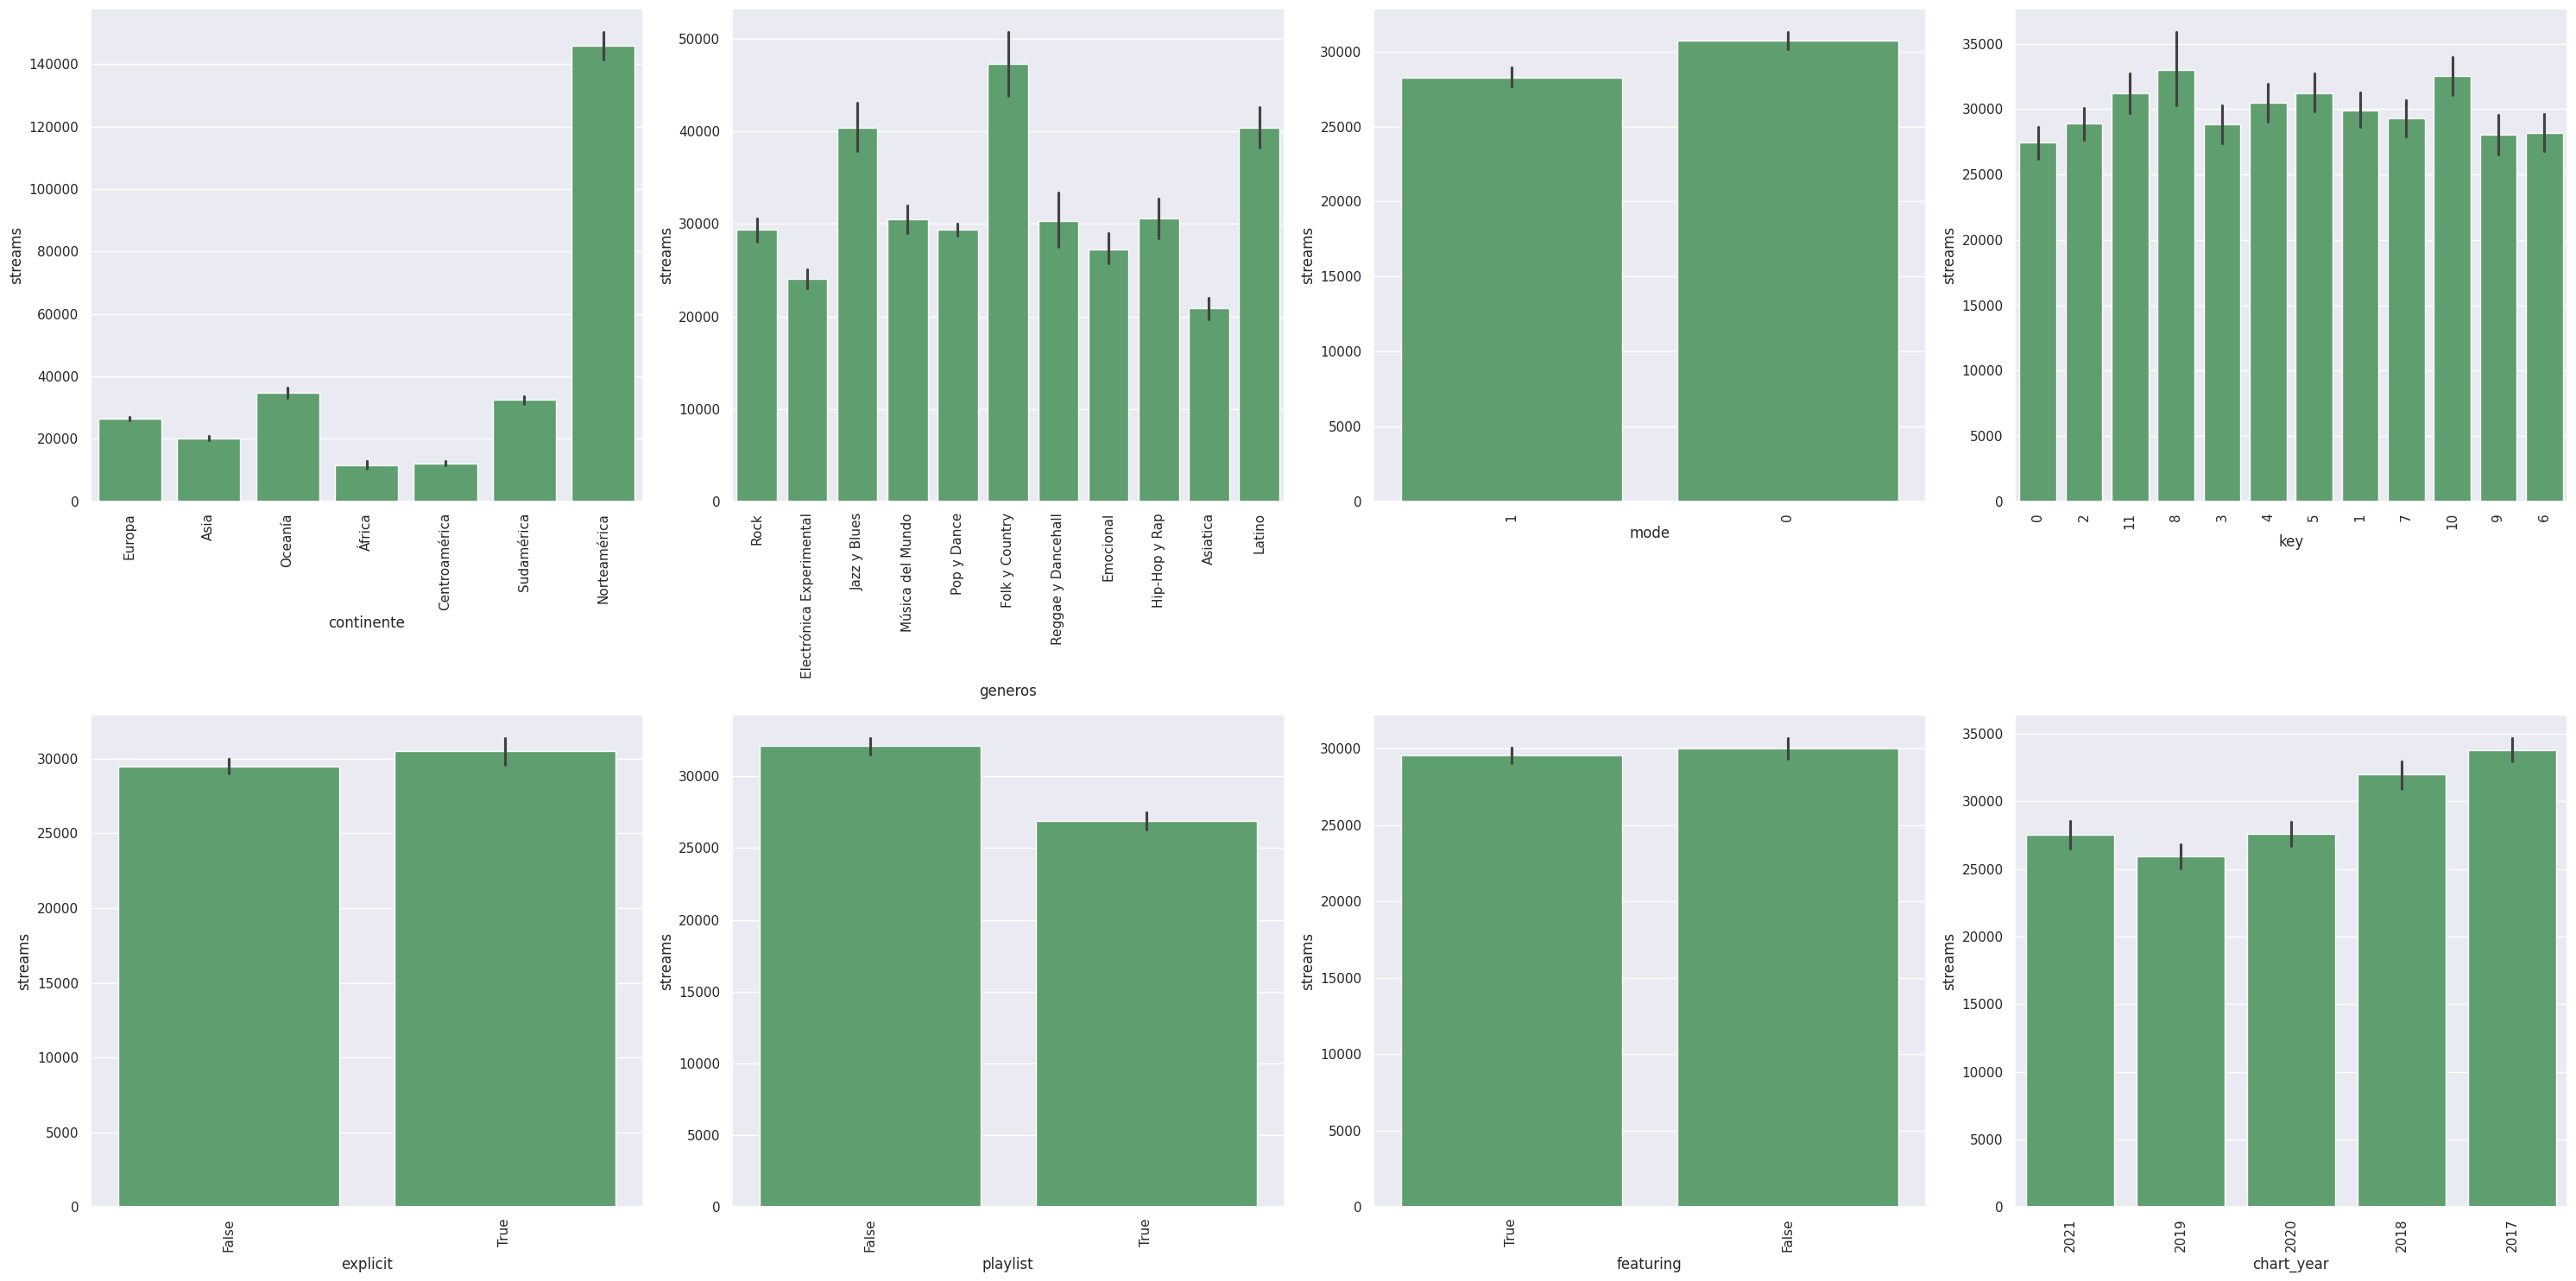

In [ ]:
cat_vars = ['continente', 'generos', 'mode', 'key', 'explicit', 'playlist', 'featuring', 'chart_year']

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(30, 15))
axs = axs.flatten()

for i, var in enumerate(cat_vars):
    sns.barplot(x=var, y='streams', data=df_completo, ax=axs[i], estimator=np.mean, color="g")
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
    axs[i].set_xticks(range(len(df_completo[var].unique())))  # Set tick positions
    axs[i].set_xticklabels(df_completo[var].unique(), rotation=90)  # Set tick labels

fig.tight_layout()
plt.show()

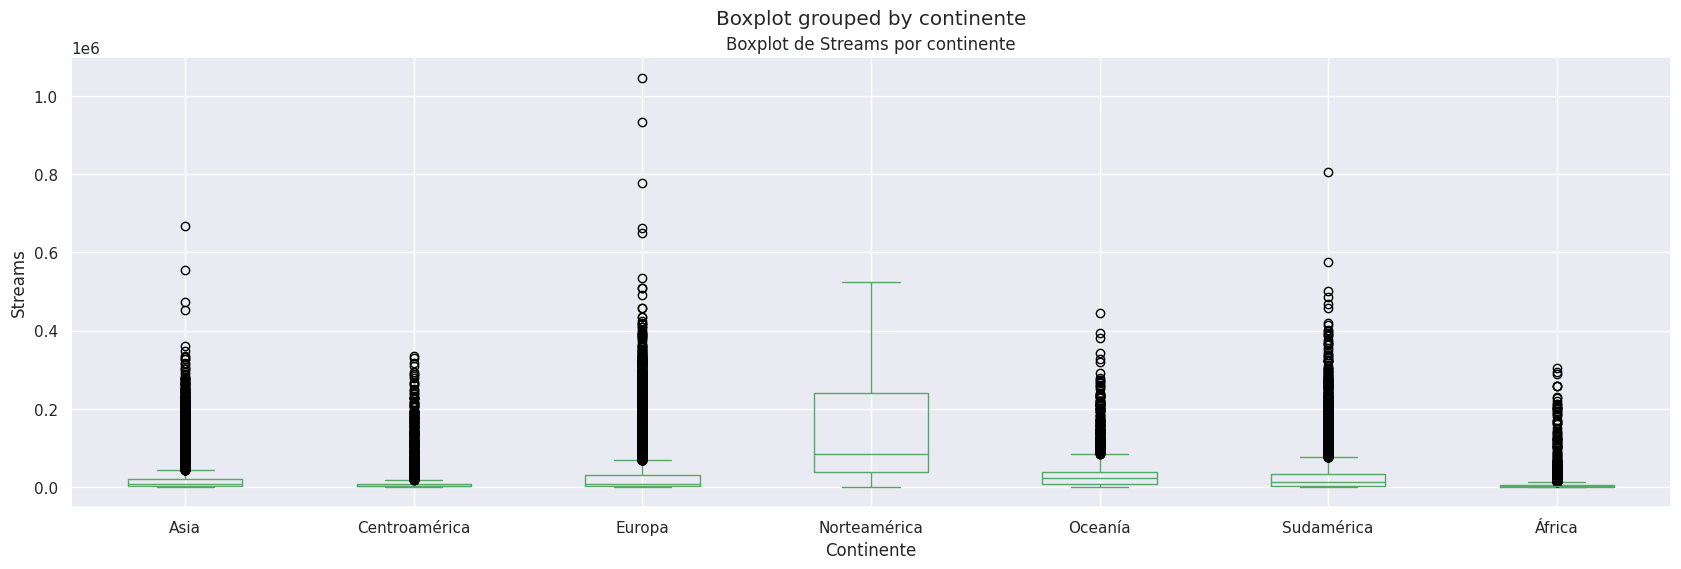

In [ ]:
fig, ax = plt.subplots(figsize=(20, 6))


df_completo.boxplot(column='streams', by="continente", ax=ax, color="g")

ax.set_title('Boxplot de Streams por continente')
ax.set_xlabel('Continente')
ax.set_ylabel('Streams')


plt.show()

Vuelvo a evaluar los streams con los datos agregados, por último elimino aquellos valores que están por encima de 400000 que son muy atípicos y sólo suceden en Norteamérica.

In [ ]:
df_completo.stremas=df_completo.streams < 400000

df_completo

<ipython-input-52-eaba30fd7cf9>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_completo.stremas=df_completo.streams < 400000


index                track_id                 artists      album_name  \
0          4  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN  To Begin Again   
1          5  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN  To Begin Again   
2          6  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN  To Begin Again   
3          7  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN  To Begin Again   
4          8  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN  To Begin Again   
...      ...                     ...                     ...             ...   
66020  59032  0JAZWvvqttGFm4UMDsPQXC            Ozuna;Camilo            Enoc   
66021  59033  0JAZWvvqttGFm4UMDsPQXC            Ozuna;Camilo            Enoc   
66022  59034  0JAZWvvqttGFm4UMDsPQXC            Ozuna;Camilo            Enoc   
66023  59035  0JAZWvvqttGFm4UMDsPQXC            Ozuna;Camilo            Enoc   
66024  59036  0JAZWvvqttGFm4UMDsPQXC            Ozuna;Camilo            Enoc   

           track_name  popularity  explicit  danceability  energy  key  ...  \
0      To Begin Again        0.57     False         0.438   0.359    0  ...   
1      To Begin Again        0.57     False         0.438   0.359    0  ...   
2      To Begin Again        0.57     False         0.438   0.359    0  ...   
3      To Begin Again        0.57     False         0.438   0.359    0  ...   
4      To Begin Again        0.57     False         0.438   0.359    0  ...   
...               ...         ...       ...           ...     ...  ...  ...   
66020      Despeinada        0.70     False         0.734   0.775    8  ...   
66021      Despeinada        0.70     False         0.734   0.775    8  ...   
66022      Despeinada        0.70     False         0.734   0.775    8  ...   
66023      Despeinada        0.70     False         0.734   0.775    8  ...   
66024      Despeinada        0.70     False         0.734   0.775    8  ...   

       valence    tempo  time_signature  duracion_minutos  chart_year  \
0         0.12   76.332               4                 4        2021   
1         0.12   76.332               4                 4        2021   
2         0.12   76.332               4                 4        2021   
3         0.12   76.332               4                 4        2021   
4         0.12   76.332               4                 4        2021   
...        ...      ...             ...               ...         ...   
66020     0.72  166.039               4                 4        2021   
66021     0.72  166.039               4                 4        2020   
66022     0.72  166.039               4                 4        2021   
66023     0.72  166.039               4                 4        2020   
66024     0.72  166.039               4                 4        2021   

             streams  playlist  generos    continente  featuring  
0       11911.000000     False     Rock        Europa       True  
1       13903.833333     False     Rock          Asia       True  
2       15896.666667     False     Rock          Asia       True  
3       17889.500000     False     Rock          Asia       True  
4       19882.333333     False     Rock          Asia       True  
...              ...       ...      ...           ...        ...  
66020   76640.990033     False   Latino        Europa       True  
66021   17663.512605     False   Latino    Sudamérica       True  
66022    4907.013289     False   Latino    Sudamérica       True  
66023  188252.234783     False   Latino  Norteamérica       True  
66024  132361.873950     False   Latino  Norteamérica       True  

[66025 rows x 26 columns]

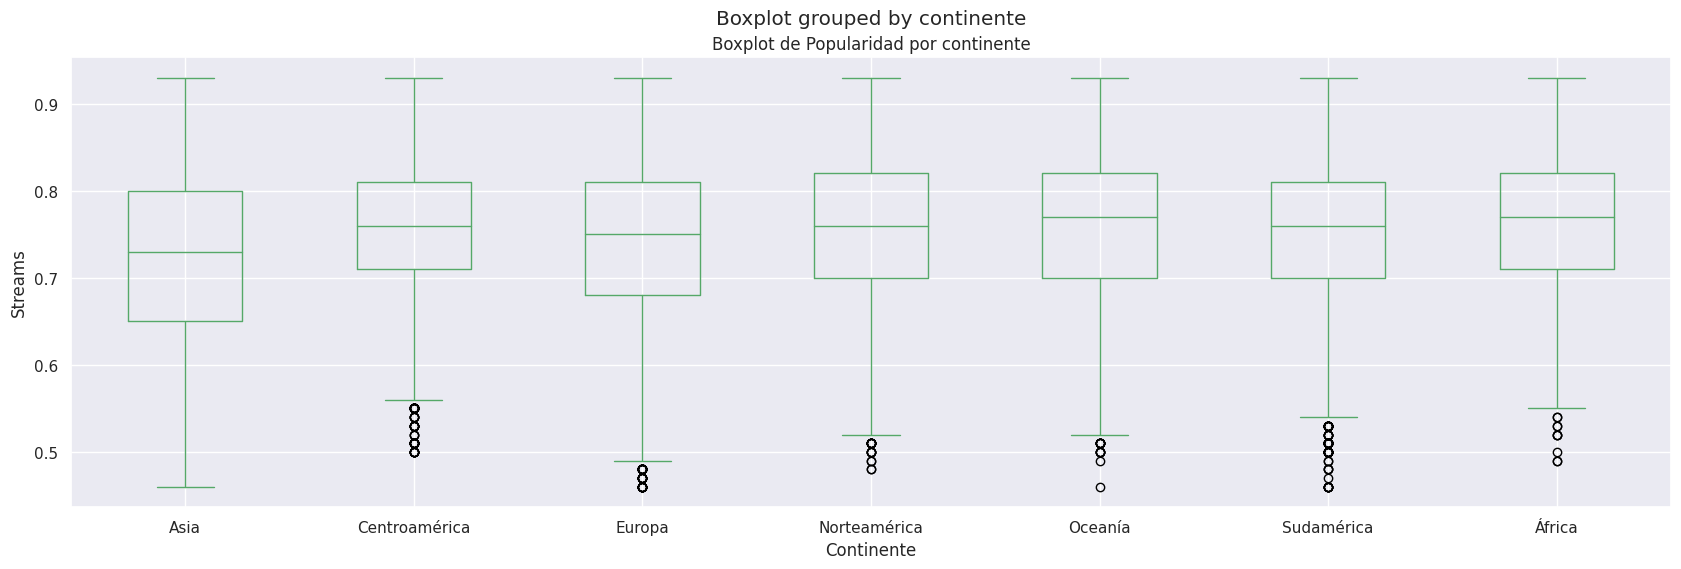

In [ ]:
fig, ax = plt.subplots(figsize=(20, 6))


df_completo.boxplot(column='popularity', by="continente", ax=ax, color="g")

ax.set_title('Boxplot de Popularidad por continente')
ax.set_xlabel('Continente')
ax.set_ylabel('Streams')


plt.show()

Tal como había sido previamente analizado en torno a los países, la popularidad en los continentes no posee mucha variabilidad. Las medias de todos los continentes rondan entre los 0.7/0.8

¿Cuál es la relación entre la popularidad y la danzabilidad? ¿Y cuál aquella con la acusticidad o el liveness?  ¿Podemos ver mayor relación con la danzabilidad que con las otras dos como postulé en la hipótesis?

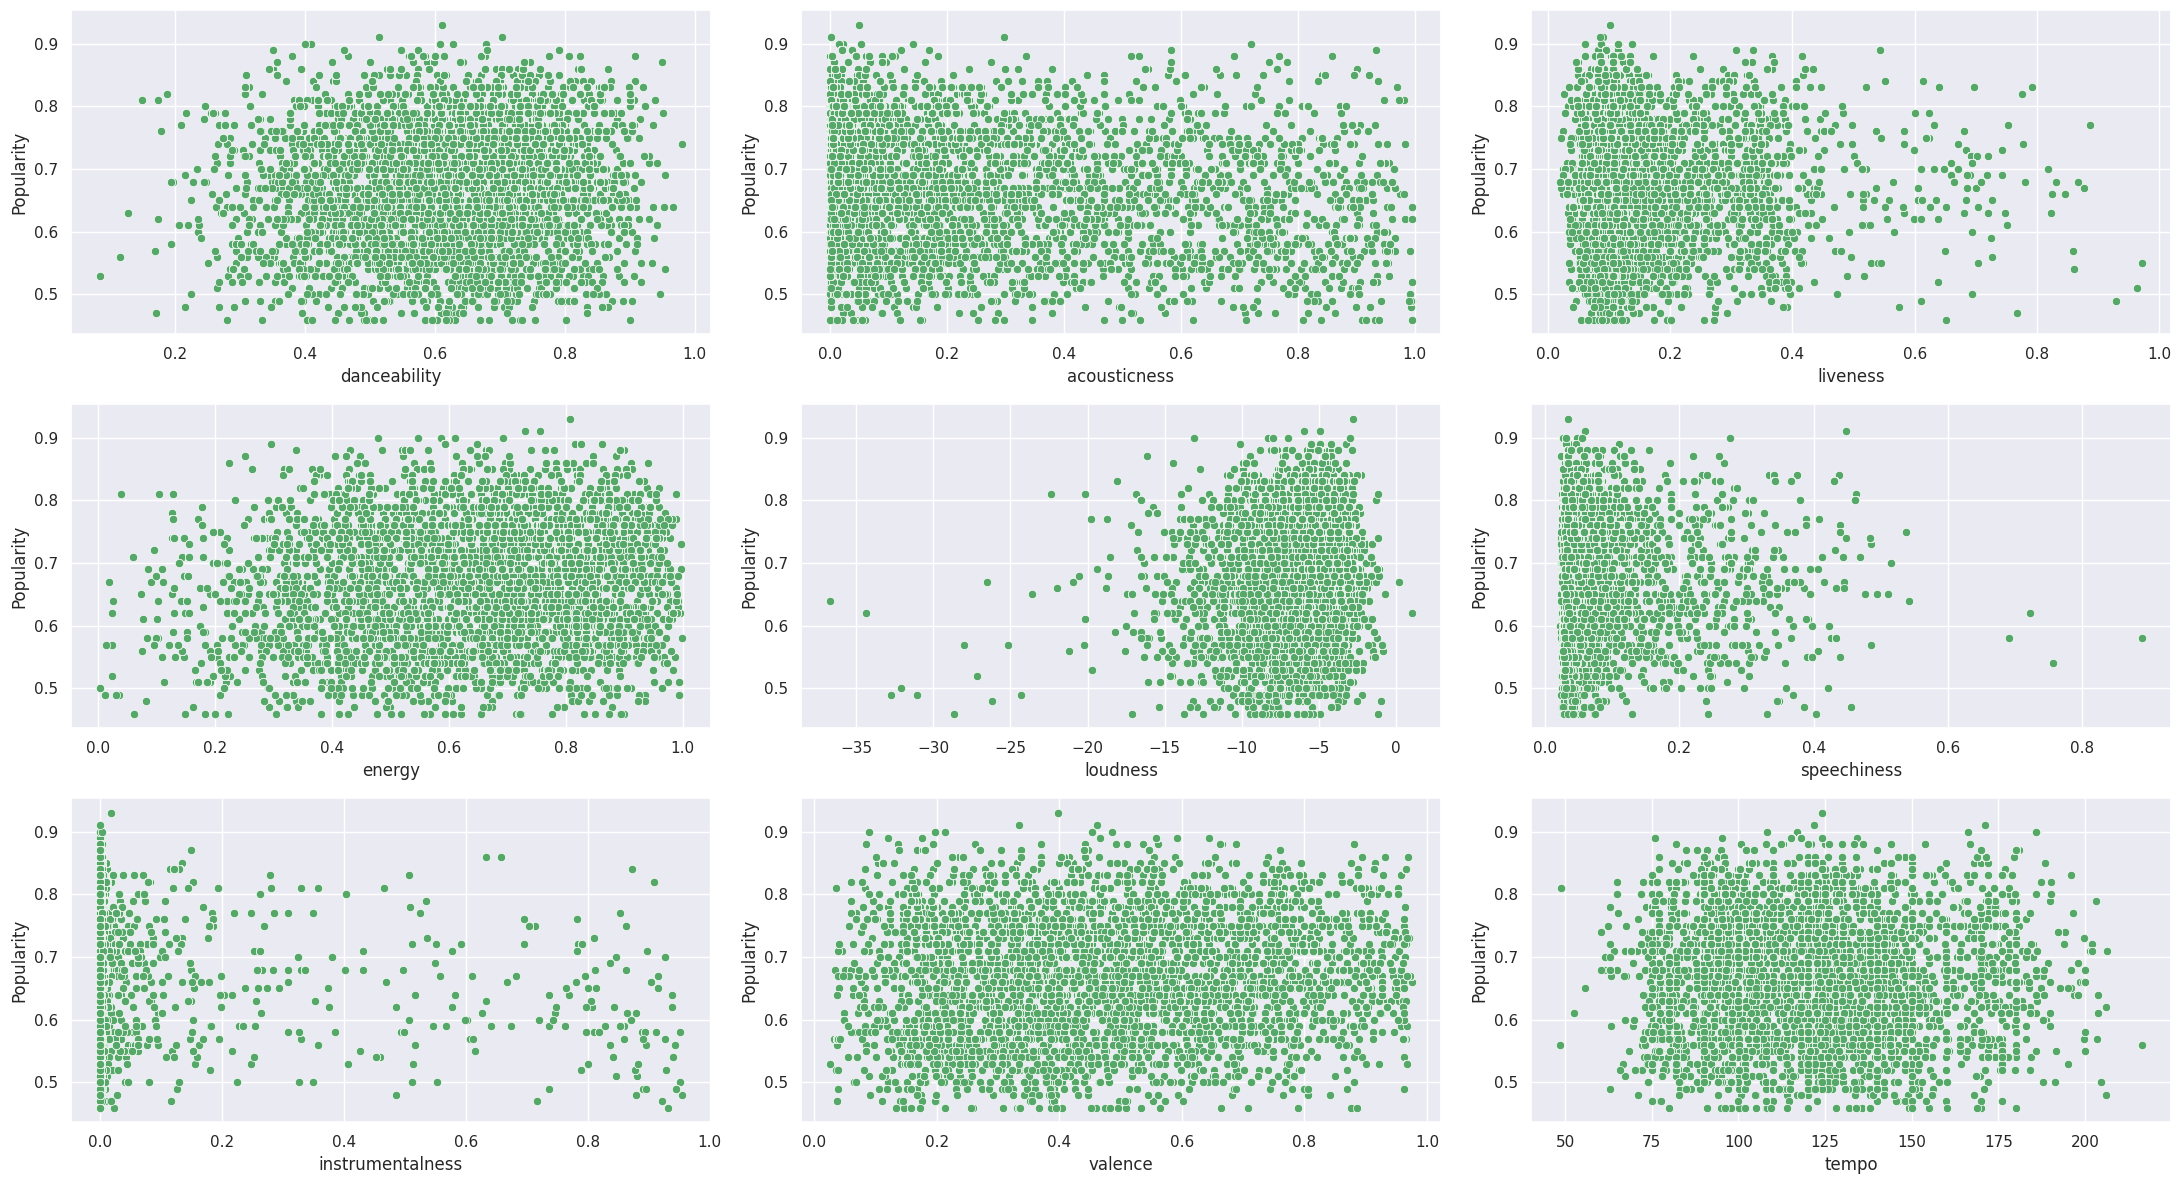

In [ ]:
cat_vars = ['danceability', 'acousticness', 'liveness', 'energy', 'loudness', 'speechiness', 'instrumentalness', 'valence', 'tempo']

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(22, 12))

axs = axs.flatten()

for i, var in enumerate(cat_vars):
    if i < len(axs):
        sns.scatterplot(x=var, y='popularity', data=df_completo, ax=axs[i], color="g")
        axs[i].set_xlabel(var)
        axs[i].set_ylabel('Popularity')

fig.tight_layout()
plt.show()

Efectivamente, si bien débil, es posible observar una relación mayor con la danzabilidad, la energía, el valence y el tempo.

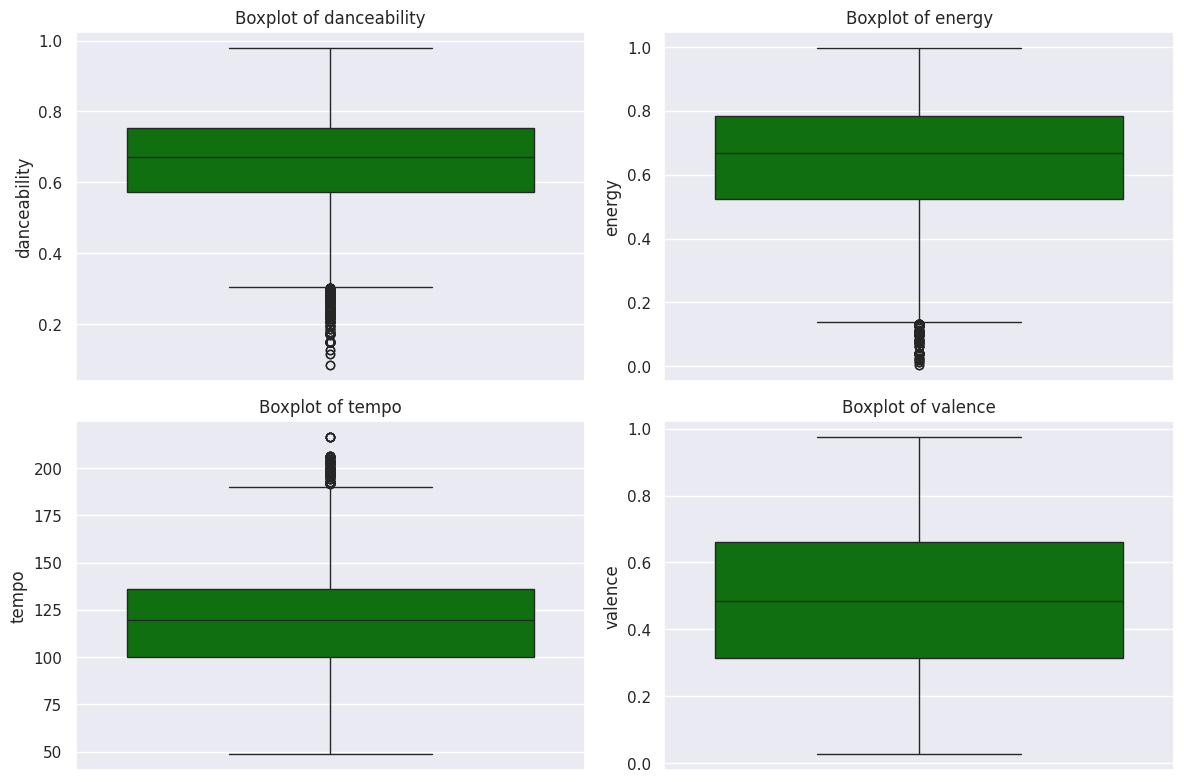

In [ ]:
cat_vars = ['danceability', 'energy',  'tempo','valence']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))


axs = axs.flatten()

for i, var in enumerate(cat_vars):
    sns.boxplot(y=df_completo[var], ax=axs[i], color="green")
    axs[i].set_title(f'Boxplot of {var}')
    axs[i].set_ylabel(var)

fig.tight_layout()
plt.show()

Si pensamos en estas tres como las variables con mayor correlación (así sea muy débil) vemos que hay pocos valores outliers.

In [ ]:
cat_vars = ['danceability', 'energy',  'tempo','valence']
def remove_outliers(df, var):
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[var] >= lower_bound) & (df[var] <= upper_bound)]

for var in cat_vars:
    df_completo = remove_outliers(df_completo, var)
print(df_completo)

       index                track_id                 artists      album_name  \
0          4  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN  To Begin Again   
1          5  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN  To Begin Again   
2          6  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN  To Begin Again   
3          7  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN  To Begin Again   
4          8  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN  To Begin Again   
...      ...                     ...                     ...             ...   
66020  59032  0JAZWvvqttGFm4UMDsPQXC            Ozuna;Camilo            Enoc   
66021  59033  0JAZWvvqttGFm4UMDsPQXC            Ozuna;Camilo            Enoc   
66022  59034  0JAZWvvqttGFm4UMDsPQXC            Ozuna;Camilo            Enoc   
66023  59035  0JAZWvvqttGFm4UMDsPQXC            Ozuna;Camilo            Enoc   
66024  59036  0JAZWvvqttGFm4UMDsPQXC            Ozuna;Camilo            Enoc   

           track_name  popularity  expl

Text(0, 0.5, 'Popularidad')

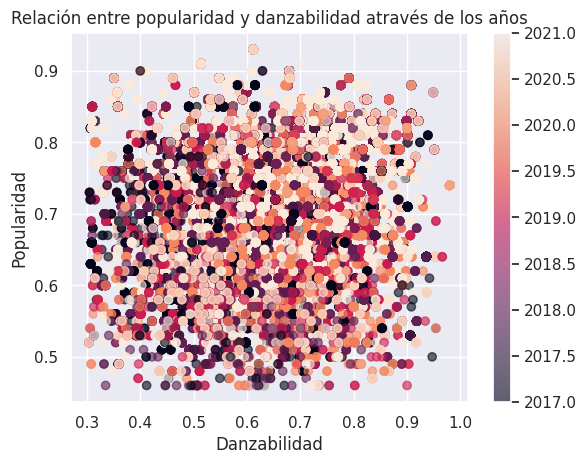

In [ ]:
fig, ax = plt.subplots()
mapeo_colores = ax.scatter(df_completo.danceability, df_completo.popularity, c=df_completo.chart_year, alpha= 0.6)
fig.colorbar(mapeo_colores)
ax.set_title('Relación entre popularidad y danzabilidad através de los años')
ax.set_xlabel('Danzabilidad')
ax.set_ylabel('Popularidad')

La correlación pareciera ser muy débil entre chart_year y popularidad

¿Cuál es la predominancia de la key(nota) teniendo en cuenta la popularidad? ¿Hay alguna que predomine?

<Figure size 640x480 with 0 Axes>

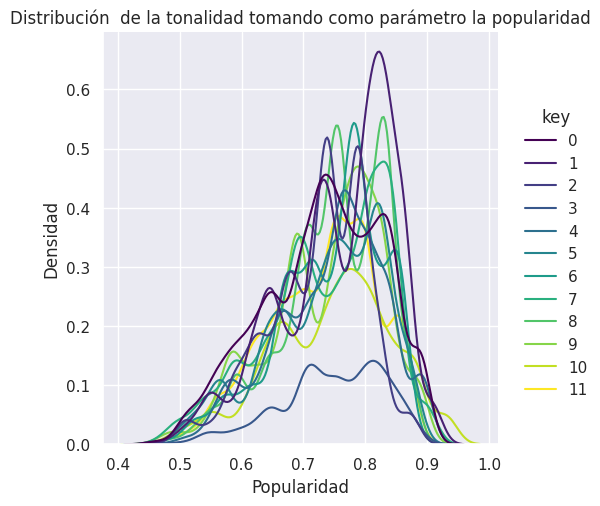

In [ ]:
plt.figure()
ax = sns.displot(data=df_completo, x='popularity', kind='kde', hue='key', palette="viridis", fill=False)
ax.set(xlabel='Popularidad', ylabel='Densidad', title='Distribución  de la tonalidad tomando como parámetro la popularidad')

¿Cómo se puede ver el análisis de géneros por continentes? ¿Hay mucha variación?

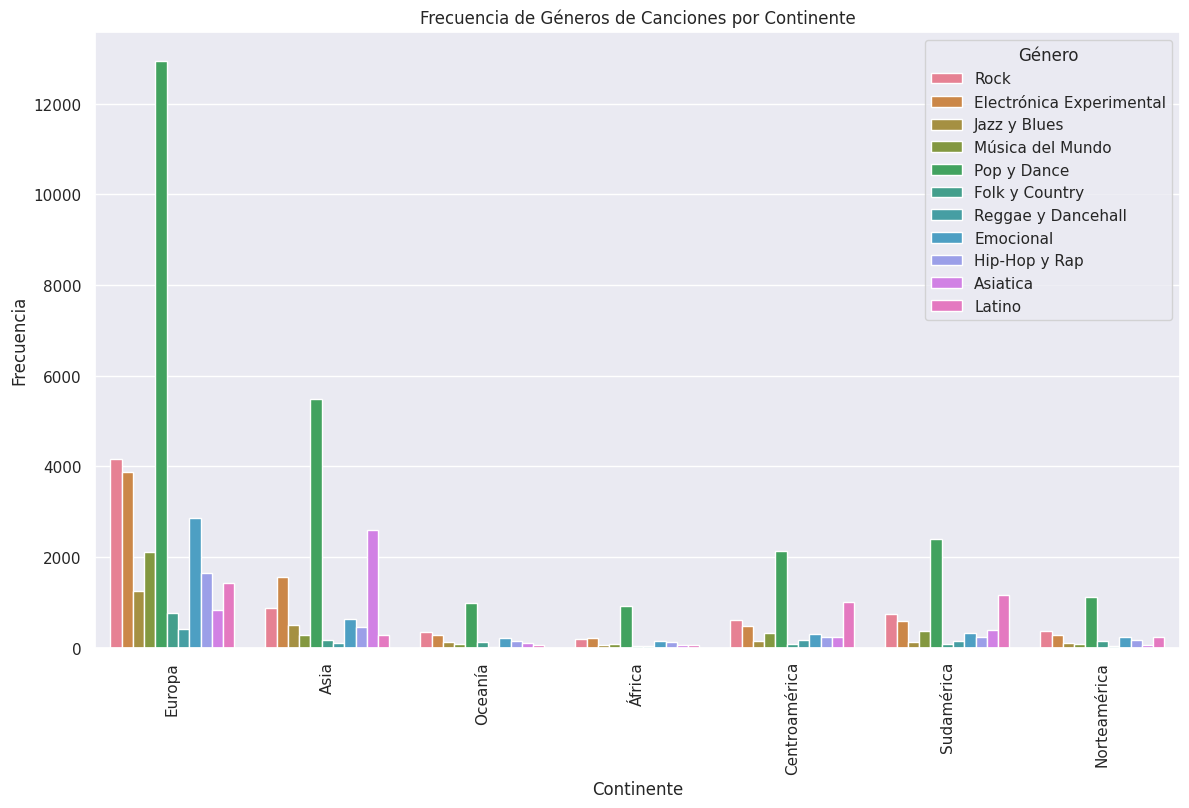

In [ ]:
plt.figure(figsize=(14, 8))
sns.countplot(x='continente', hue='generos', data=df_completo)
plt.title('Frecuencia de Géneros de Canciones por Continente')
plt.xlabel('Continente')
plt.ylabel('Frecuencia')
plt.legend(title='Género')
plt.xticks(rotation=90)
plt.show()

En general no parece importar tanto la tonalidad de la canción, ya que salvo pocas excepciones, todas tienen una tendencia similar.

<Axes: >

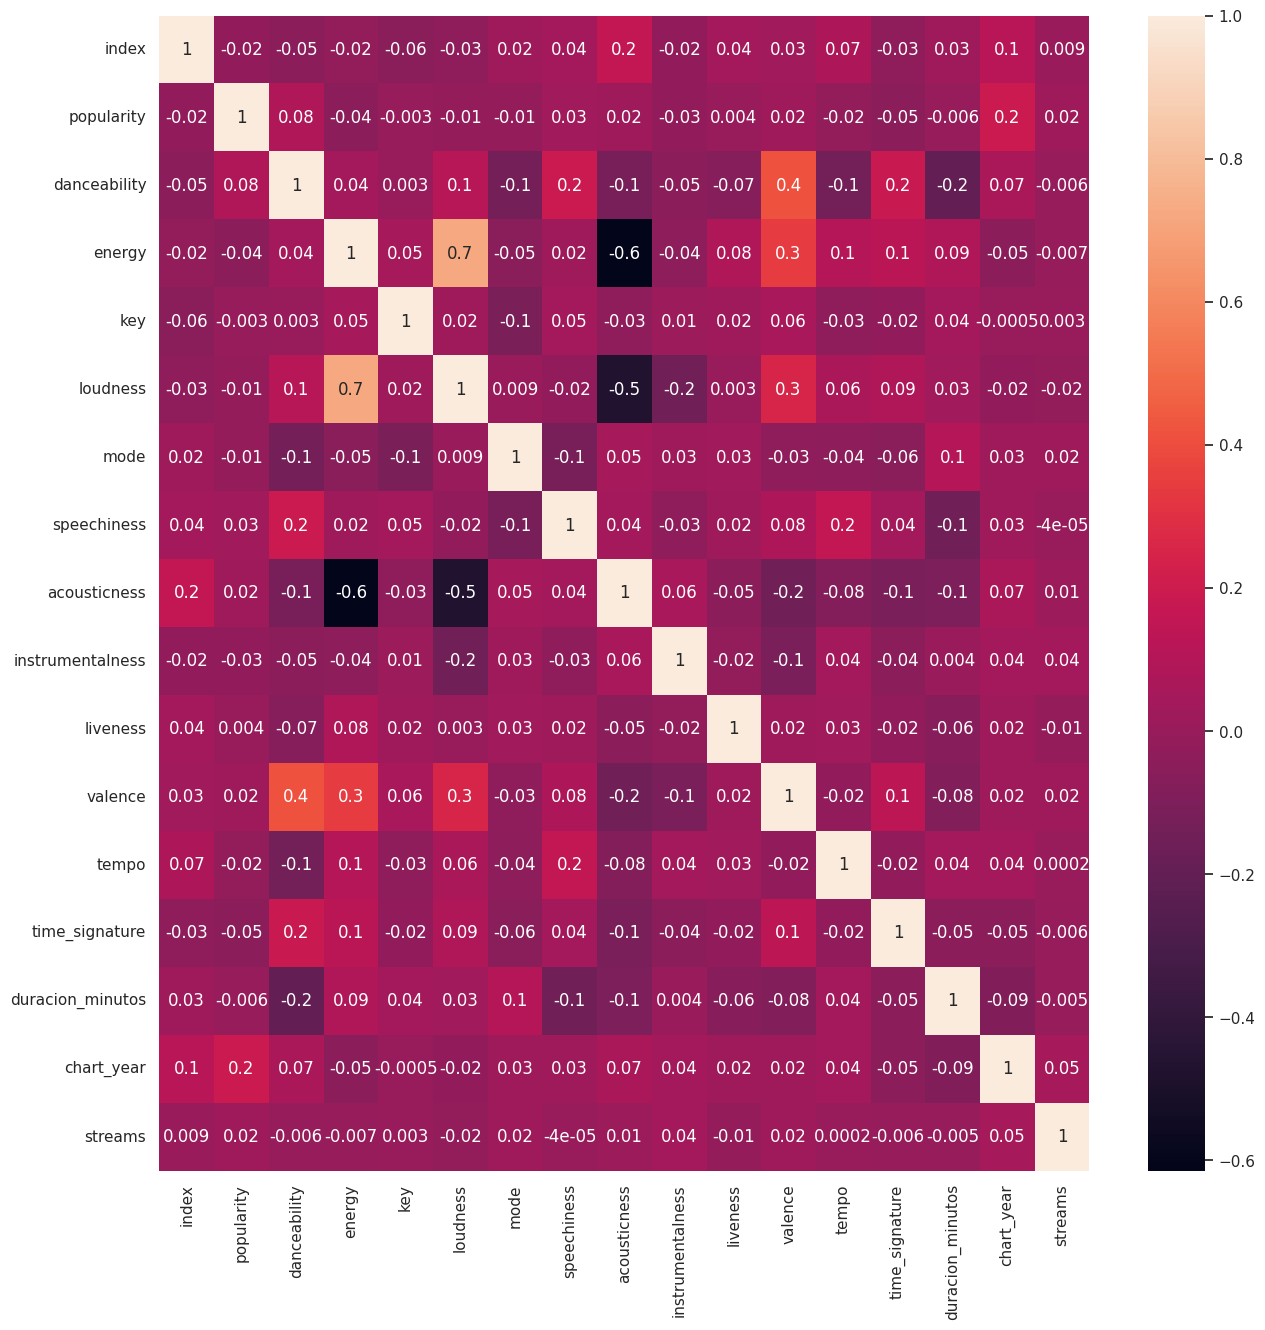

In [ ]:
plt.figure(figsize=(15, 15))

sns.heatmap(df_completo.select_dtypes(include='number').corr(), fmt='.1g', annot=True)

En relación con la popularidad que es nuestra variable target no parece haber una correlación fuerte con ninguna otra.

In [ ]:
df_completo.isna().sum()

index               0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
duracion_minutos    0
chart_year          0
streams             0
playlist            0
generos             0
continente          0
featuring           0
dtype: int64

##Conclusiones EDA

La primera conclusión es que Europa y Norteamérica poseen comportamientos opuestos. Mientras que en Europa predomina la variabilidad y por lo tanto las canciones no tienen tantos streams, lo que vemos es muchísimas canciones en sus charts. En Norteamérica hay muy pocas canciones con altísimos niveles de streams por canción. También norteamérica tiene muy poca variabilidad de género, centrándose más que nada en el pop.

La segunda es que la gran cantidad de canciones que hay en el pop no le garantiza una popularidad alta (y por ahí tiene justamente que ver con ese hecho). Teniendo una media de 0.75 en popularidad mientras que el Hip Hop tiene 0.8.

En cuanto a las características, si bien predomina un acercamiento multicausal con una correlación baja, es posible ver que la danzabilidad es una de aquellas características con un poco más de relevancia.  


Como queda explícito en los diversos análisis y gráficos no es posible hallar una correlación fuerte entre alguna de las variables y la popularidad, tampoco hay una relación directa entre la cantidad de streams y la popularidad. Es claro que es un fenómeno multicausal. Tampoco es posible plantear una sola característica de las canciones (como la danzabilidad) como un determinante para la popularidad. De este modo, la hipótesis inicial no se condice con los resultados obtenidos en el análisis.

#Preprocesamiento 2

In [ ]:
df_sp = df_completo.drop(columns=["index", "track_id", "artists", "album_name", "track_name"])
df_sp

popularity  explicit  danceability  energy  key  loudness  mode  \
0            0.57     False         0.438   0.359    0    -9.734     1   
1            0.57     False         0.438   0.359    0    -9.734     1   
2            0.57     False         0.438   0.359    0    -9.734     1   
3            0.57     False         0.438   0.359    0    -9.734     1   
4            0.57     False         0.438   0.359    0    -9.734     1   
...           ...       ...           ...     ...  ...       ...   ...   
66020        0.70     False         0.734   0.775    8    -3.855     1   
66021        0.70     False         0.734   0.775    8    -3.855     1   
66022        0.70     False         0.734   0.775    8    -3.855     1   
66023        0.70     False         0.734   0.775    8    -3.855     1   
66024        0.70     False         0.734   0.775    8    -3.855     1   

       speechiness  acousticness  instrumentalness  ...  valence    tempo  \
0           0.0557         0.210          0.000000  ...     0.12   76.332   
1           0.0557         0.210          0.000000  ...     0.12   76.332   
2           0.0557         0.210          0.000000  ...     0.12   76.332   
3           0.0557         0.210          0.000000  ...     0.12   76.332   
4           0.0557         0.210          0.000000  ...     0.12   76.332   
...            ...           ...               ...  ...      ...      ...   
66020       0.0614         0.186          0.000542  ...     0.72  166.039   
66021       0.0614         0.186          0.000542  ...     0.72  166.039   
66022       0.0614         0.186          0.000542  ...     0.72  166.039   
66023       0.0614         0.186          0.000542  ...     0.72  166.039   
66024       0.0614         0.186          0.000542  ...     0.72  166.039   

       time_signature  duracion_minutos  chart_year        streams  playlist  \
0                   4                 4        2021   11911.000000     False   
1                   4                 4        2021   13903.833333     False   
2                   4                 4        2021   15896.666667     False   
3                   4                 4        2021   17889.500000     False   
4                   4                 4        2021   19882.333333     False   
...               ...               ...         ...            ...       ...   
66020               4                 4        2021   76640.990033     False   
66021               4                 4        2020   17663.512605     False   
66022               4                 4        2021    4907.013289     False   
66023               4                 4        2020  188252.234783     False   
66024               4                 4        2021  132361.873950     False   

       generos    continente featuring  
0         Rock        Europa      True  
1         Rock          Asia      True  
2         Rock          Asia      True  
3         Rock          Asia      True  
4         Rock          Asia      True  
...        ...           ...       ...  
66020   Latino        Europa      True  
66021   Latino    Sudamérica      True  
66022   Latino    Sudamérica      True  
66023   Latino  Norteamérica      True  
66024   Latino  Norteamérica      True  

[65021 rows x 21 columns]

In [ ]:
var_numericas = df_completo.drop(columns=['popularity','index' ]).select_dtypes(exclude=['object','boolean' ]).columns

print(var_numericas)

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'duracion_minutos', 'chart_year', 'streams'],
      dtype='object')


Pasaré las columnas booleanas a 0 y 1 siendo 0 false y 1 true.

In [ ]:
boolean_columns = df_sp.select_dtypes(include=bool).columns

df_sp[boolean_columns] = df_sp[boolean_columns].astype(int)
df_sp

popularity  explicit  danceability  energy  key  loudness  mode  \
0            0.57         0         0.438   0.359    0    -9.734     1   
1            0.57         0         0.438   0.359    0    -9.734     1   
2            0.57         0         0.438   0.359    0    -9.734     1   
3            0.57         0         0.438   0.359    0    -9.734     1   
4            0.57         0         0.438   0.359    0    -9.734     1   
...           ...       ...           ...     ...  ...       ...   ...   
66020        0.70         0         0.734   0.775    8    -3.855     1   
66021        0.70         0         0.734   0.775    8    -3.855     1   
66022        0.70         0         0.734   0.775    8    -3.855     1   
66023        0.70         0         0.734   0.775    8    -3.855     1   
66024        0.70         0         0.734   0.775    8    -3.855     1   

       speechiness  acousticness  instrumentalness  ...  valence    tempo  \
0           0.0557         0.210          0.000000  ...     0.12   76.332   
1           0.0557         0.210          0.000000  ...     0.12   76.332   
2           0.0557         0.210          0.000000  ...     0.12   76.332   
3           0.0557         0.210          0.000000  ...     0.12   76.332   
4           0.0557         0.210          0.000000  ...     0.12   76.332   
...            ...           ...               ...  ...      ...      ...   
66020       0.0614         0.186          0.000542  ...     0.72  166.039   
66021       0.0614         0.186          0.000542  ...     0.72  166.039   
66022       0.0614         0.186          0.000542  ...     0.72  166.039   
66023       0.0614         0.186          0.000542  ...     0.72  166.039   
66024       0.0614         0.186          0.000542  ...     0.72  166.039   

       time_signature  duracion_minutos  chart_year        streams  playlist  \
0                   4                 4        2021   11911.000000         0   
1                   4                 4        2021   13903.833333         0   
2                   4                 4        2021   15896.666667         0   
3                   4                 4        2021   17889.500000         0   
4                   4                 4        2021   19882.333333         0   
...               ...               ...         ...            ...       ...   
66020               4                 4        2021   76640.990033         0   
66021               4                 4        2020   17663.512605         0   
66022               4                 4        2021    4907.013289         0   
66023               4                 4        2020  188252.234783         0   
66024               4                 4        2021  132361.873950         0   

       generos    continente featuring  
0         Rock        Europa         1  
1         Rock          Asia         1  
2         Rock          Asia         1  
3         Rock          Asia         1  
4         Rock          Asia         1  
...        ...           ...       ...  
66020   Latino        Europa         1  
66021   Latino    Sudamérica         1  
66022   Latino    Sudamérica         1  
66023   Latino  Norteamérica         1  
66024   Latino  Norteamérica         1  

[65021 rows x 21 columns]

In [ ]:
for col in df_sp.select_dtypes(include=['object']).columns:

    print(f"{col}: {df_sp[col].unique()}")

generos: ['Rock' 'Electrónica Experimental' 'Jazz y Blues' 'Música del Mundo'
 'Pop y Dance' 'Folk y Country' 'Reggae y Dancehall' 'Emocional'
 'Hip-Hop y Rap' 'Asiatica' 'Latino']
continente: ['Europa' 'Asia' 'Oceanía' 'África' 'Centroamérica' 'Sudamérica'
 'Norteamérica']


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing


encoder = ['continente', 'generos']

order = {
    'continente': ['Asia', 'Centroamérica', 'Europa', 'Norteamérica', 'Oceanía', 'Sudamérica', 'África'],
    'generos': ['Rock', 'Pop y Dance', 'Asiatica', 'Emocional', 'Electrónica Experimental', 'Jazz y Blues', 'Reggae y Dancehall', 'Hip-Hop y Rap', 'Folk y Country', 'Música del Mundo', 'Latino']
}

for col in encoder:

    label_encoder = LabelEncoder()

    label_encoder.fit(order[col])

    df_sp[col] = label_encoder.transform(df_sp[col].astype(str))

    print(f"{col}: {df_sp[col].unique()}")


continente: [2 0 4 6 1 5 3]
generos: [10  1  5  7  8  3  9  2  4  0  6]


In [ ]:
df_sp

popularity  explicit  danceability  energy  key  loudness  mode  \
0            0.57         0         0.438   0.359    0    -9.734     1   
1            0.57         0         0.438   0.359    0    -9.734     1   
2            0.57         0         0.438   0.359    0    -9.734     1   
3            0.57         0         0.438   0.359    0    -9.734     1   
4            0.57         0         0.438   0.359    0    -9.734     1   
...           ...       ...           ...     ...  ...       ...   ...   
66020        0.70         0         0.734   0.775    8    -3.855     1   
66021        0.70         0         0.734   0.775    8    -3.855     1   
66022        0.70         0         0.734   0.775    8    -3.855     1   
66023        0.70         0         0.734   0.775    8    -3.855     1   
66024        0.70         0         0.734   0.775    8    -3.855     1   

       speechiness  acousticness  instrumentalness  ...  valence    tempo  \
0           0.0557         0.210          0.000000  ...     0.12   76.332   
1           0.0557         0.210          0.000000  ...     0.12   76.332   
2           0.0557         0.210          0.000000  ...     0.12   76.332   
3           0.0557         0.210          0.000000  ...     0.12   76.332   
4           0.0557         0.210          0.000000  ...     0.12   76.332   
...            ...           ...               ...  ...      ...      ...   
66020       0.0614         0.186          0.000542  ...     0.72  166.039   
66021       0.0614         0.186          0.000542  ...     0.72  166.039   
66022       0.0614         0.186          0.000542  ...     0.72  166.039   
66023       0.0614         0.186          0.000542  ...     0.72  166.039   
66024       0.0614         0.186          0.000542  ...     0.72  166.039   

       time_signature  duracion_minutos  chart_year        streams  playlist  \
0                   4                 4        2021   11911.000000         0   
1                   4                 4        2021   13903.833333         0   
2                   4                 4        2021   15896.666667         0   
3                   4                 4        2021   17889.500000         0   
4                   4                 4        2021   19882.333333         0   
...               ...               ...         ...            ...       ...   
66020               4                 4        2021   76640.990033         0   
66021               4                 4        2020   17663.512605         0   
66022               4                 4        2021    4907.013289         0   
66023               4                 4        2020  188252.234783         0   
66024               4                 4        2021  132361.873950         0   

       generos  continente  featuring  
0           10           2          1  
1           10           0          1  
2           10           0          1  
3           10           0          1  
4           10           0          1  
...        ...         ...        ...  
66020        6           2          1  
66021        6           5          1  
66022        6           5          1  
66023        6           3          1  
66024        6           3          1  

[65021 rows x 21 columns]

In [ ]:
# define standard scaler
scaler = preprocessing.StandardScaler()
# transform data
scaled = scaler.fit_transform(df_sp[var_numericas])
print(scaled[0:5,:])

[[-1.68498766 -1.65602164 -1.51459522 -1.34626307  0.84024153 -0.36737198
  -0.10377175 -0.19839007 -0.4437262  -1.6553337  -1.63160589  0.15131945
   0.81097545  1.2729783  -0.31670122]
 [-1.68498766 -1.65602164 -1.51459522 -1.34626307  0.84024153 -0.36737198
  -0.10377175 -0.19839007 -0.4437262  -1.6553337  -1.63160589  0.15131945
   0.81097545  1.2729783  -0.28091563]
 [-1.68498766 -1.65602164 -1.51459522 -1.34626307  0.84024153 -0.36737198
  -0.10377175 -0.19839007 -0.4437262  -1.6553337  -1.63160589  0.15131945
   0.81097545  1.2729783  -0.24513004]
 [-1.68498766 -1.65602164 -1.51459522 -1.34626307  0.84024153 -0.36737198
  -0.10377175 -0.19839007 -0.4437262  -1.6553337  -1.63160589  0.15131945
   0.81097545  1.2729783  -0.20934446]
 [-1.68498766 -1.65602164 -1.51459522 -1.34626307  0.84024153 -0.36737198
  -0.10377175 -0.19839007 -0.4437262  -1.6553337  -1.63160589  0.15131945
   0.81097545  1.2729783  -0.17355887]]


In [ ]:
[x for x in df_sp.columns if x not in var_numericas ]

['popularity', 'explicit', 'playlist', 'generos', 'continente', 'featuring']

In [ ]:
pd.DataFrame(scaled, columns=var_numericas)

danceability    energy       key  loudness      mode  speechiness  \
0         -1.684988 -1.656022 -1.514595 -1.346263  0.840242    -0.367372   
1         -1.684988 -1.656022 -1.514595 -1.346263  0.840242    -0.367372   
2         -1.684988 -1.656022 -1.514595 -1.346263  0.840242    -0.367372   
3         -1.684988 -1.656022 -1.514595 -1.346263  0.840242    -0.367372   
4         -1.684988 -1.656022 -1.514595 -1.346263  0.840242    -0.367372   
...             ...       ...       ...       ...       ...          ...   
65016      0.558470  0.732994  0.746550  0.914679  0.840242    -0.298335   
65017      0.558470  0.732994  0.746550  0.914679  0.840242    -0.298335   
65018      0.558470  0.732994  0.746550  0.914679  0.840242    -0.298335   
65019      0.558470  0.732994  0.746550  0.914679  0.840242    -0.298335   
65020      0.558470  0.732994  0.746550  0.914679  0.840242    -0.298335   

       acousticness  instrumentalness  liveness   valence     tempo  \
0         -0.103772         -0.198390 -0.443726 -1.655334 -1.631606   
1         -0.103772         -0.198390 -0.443726 -1.655334 -1.631606   
2         -0.103772         -0.198390 -0.443726 -1.655334 -1.631606   
3         -0.103772         -0.198390 -0.443726 -1.655334 -1.631606   
4         -0.103772         -0.198390 -0.443726 -1.655334 -1.631606   
...             ...               ...       ...       ...       ...   
65016     -0.200237         -0.193331 -0.397082  1.005374  1.733600   
65017     -0.200237         -0.193331 -0.397082  1.005374  1.733600   
65018     -0.200237         -0.193331 -0.397082  1.005374  1.733600   
65019     -0.200237         -0.193331 -0.397082  1.005374  1.733600   
65020     -0.200237         -0.193331 -0.397082  1.005374  1.733600   

       time_signature  duracion_minutos  chart_year   streams  
0            0.151319          0.810975    1.272978 -0.316701  
1            0.151319          0.810975    1.272978 -0.280916  
2            0.151319          0.810975    1.272978 -0.245130  
3            0.151319          0.810975    1.272978 -0.209344  
4            0.151319          0.810975    1.272978 -0.173559  
...               ...               ...         ...       ...  
65016        0.151319          0.810975    1.272978  0.845664  
65017        0.151319          0.810975    0.556631 -0.213403  
65018        0.151319          0.810975    1.272978 -0.442473  
65019        0.151319          0.810975    0.556631  2.849883  
65020        0.151319          0.810975    1.272978  1.846252  

[65021 rows x 15 columns]

In [ ]:
df_sp = df_sp.reset_index(drop=True)

In [ ]:
data_scaled = pd.concat([pd.DataFrame(scaled, columns=var_numericas), df_sp[[x for x in df_sp.columns if x not in var_numericas ]]], axis=1)
data_scaled.isna().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
duracion_minutos    0
chart_year          0
streams             0
popularity          0
explicit            0
playlist            0
generos             0
continente          0
featuring           0
dtype: int64

<Axes: >

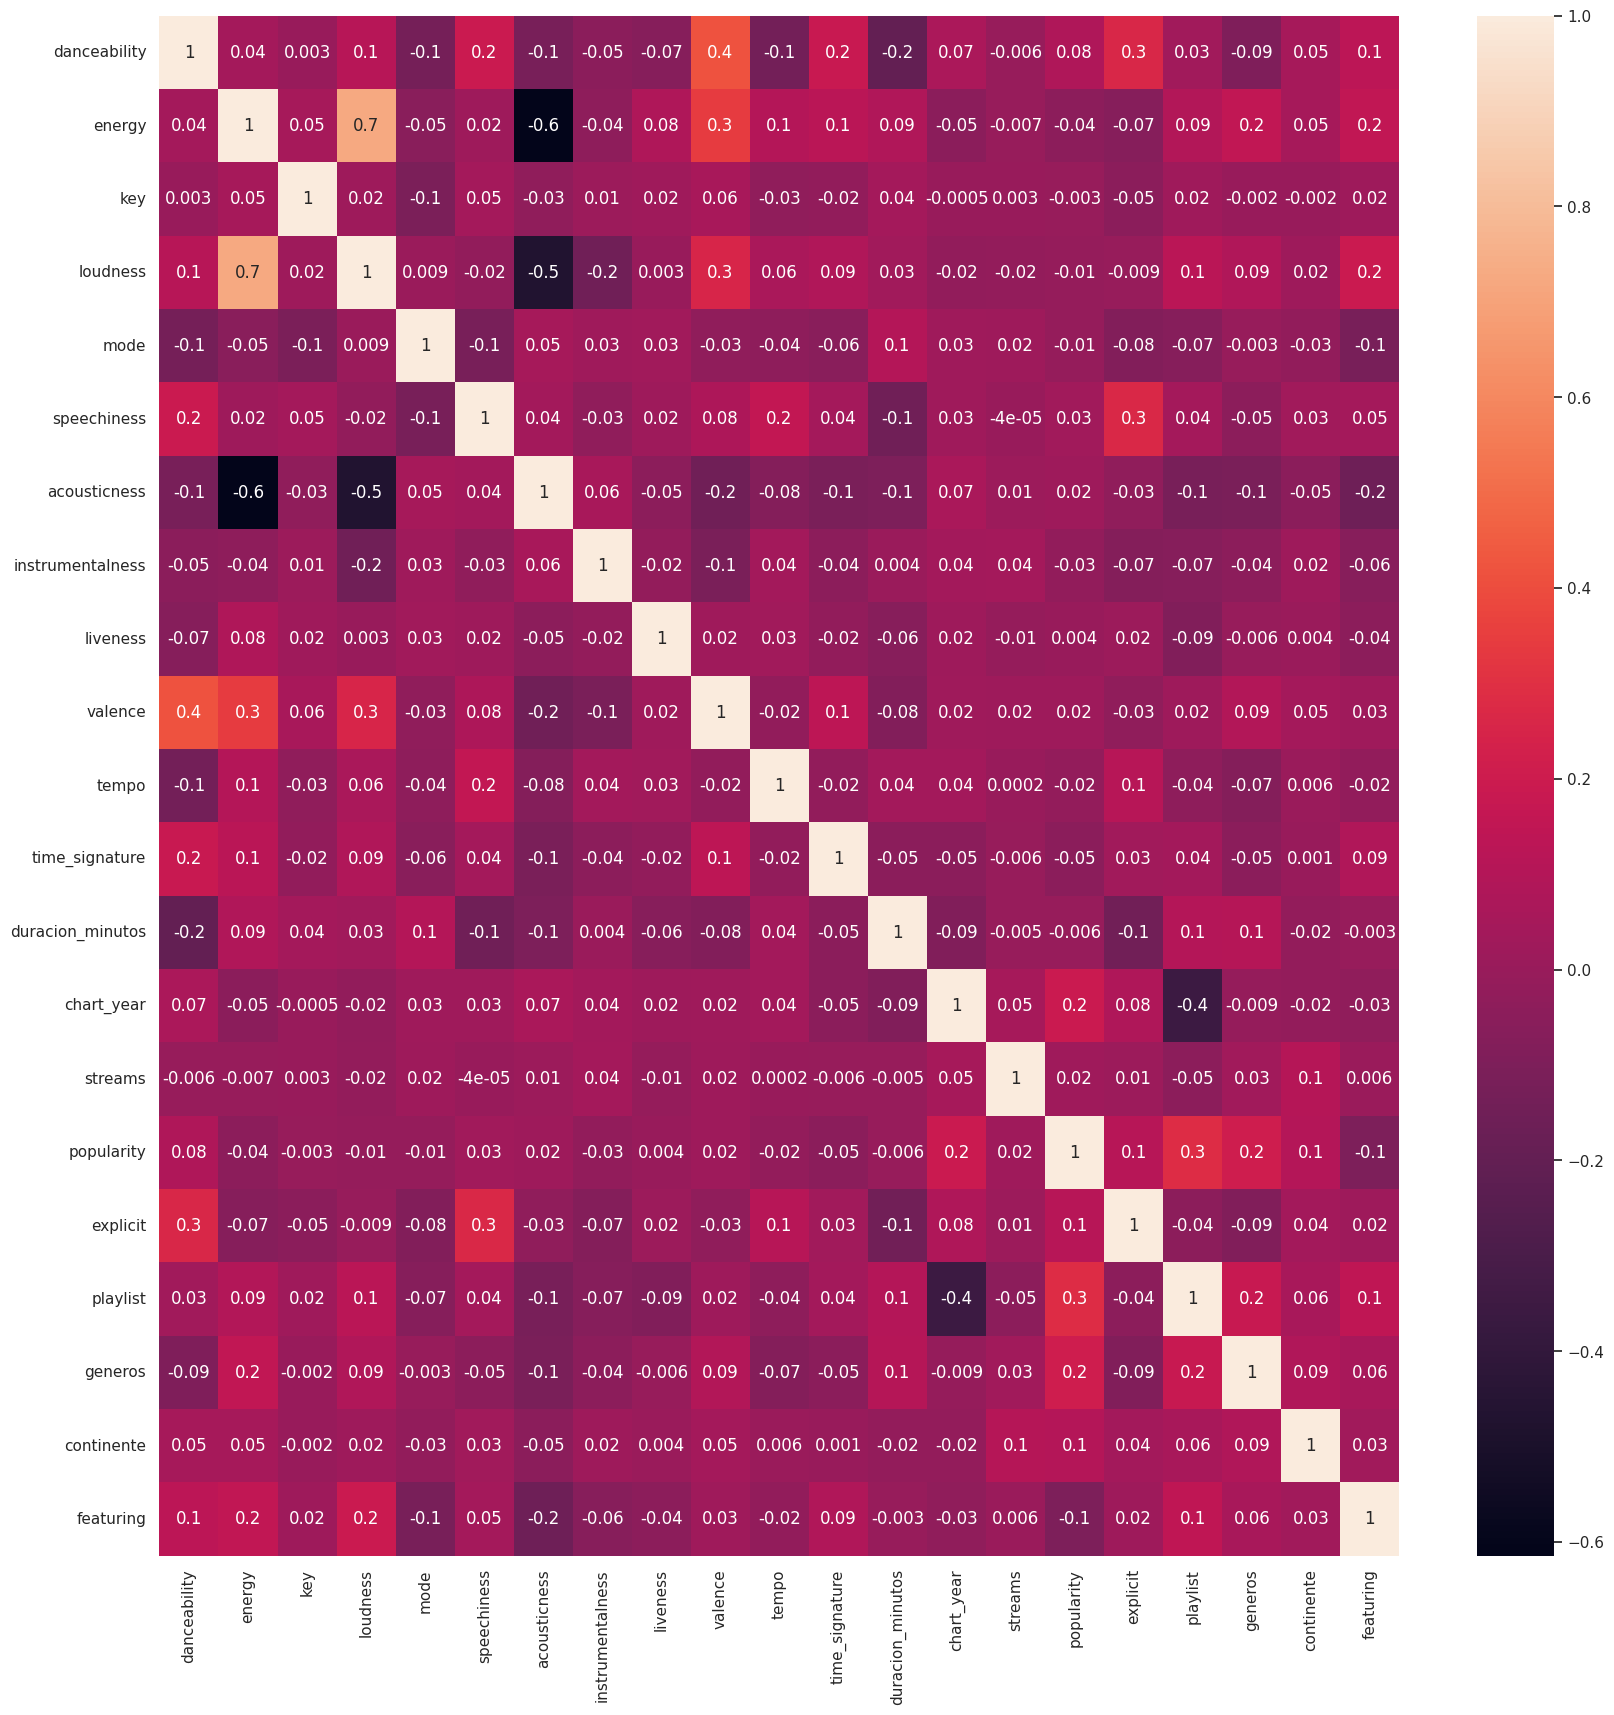

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(data_scaled.corr(), fmt='.1g', annot=True)

#Algoritmos y validación

In [ ]:
X = data_scaled.drop("popularity", axis=1)       # feature matrix
y = data_scaled['popularity']               # target feature
data_scaled.head()

danceability    energy       key  loudness      mode  speechiness  \
0     -1.684988 -1.656022 -1.514595 -1.346263  0.840242    -0.367372   
1     -1.684988 -1.656022 -1.514595 -1.346263  0.840242    -0.367372   
2     -1.684988 -1.656022 -1.514595 -1.346263  0.840242    -0.367372   
3     -1.684988 -1.656022 -1.514595 -1.346263  0.840242    -0.367372   
4     -1.684988 -1.656022 -1.514595 -1.346263  0.840242    -0.367372   

   acousticness  instrumentalness  liveness   valence  ...  time_signature  \
0     -0.103772          -0.19839 -0.443726 -1.655334  ...        0.151319   
1     -0.103772          -0.19839 -0.443726 -1.655334  ...        0.151319   
2     -0.103772          -0.19839 -0.443726 -1.655334  ...        0.151319   
3     -0.103772          -0.19839 -0.443726 -1.655334  ...        0.151319   
4     -0.103772          -0.19839 -0.443726 -1.655334  ...        0.151319   

   duracion_minutos  chart_year   streams  popularity  explicit  playlist  \
0          0.810975    1.272978 -0.316701        0.57         0         0   
1          0.810975    1.272978 -0.280916        0.57         0         0   
2          0.810975    1.272978 -0.245130        0.57         0         0   
3          0.810975    1.272978 -0.209344        0.57         0         0   
4          0.810975    1.272978 -0.173559        0.57         0         0   

   generos  continente  featuring  
0       10           2          1  
1       10           0          1  
2       10           0          1  
3       10           0          1  
4       10           0          1  

[5 rows x 21 columns]

In [ ]:
X

danceability    energy       key  loudness      mode  speechiness  \
0         -1.684988 -1.656022 -1.514595 -1.346263  0.840242    -0.367372   
1         -1.684988 -1.656022 -1.514595 -1.346263  0.840242    -0.367372   
2         -1.684988 -1.656022 -1.514595 -1.346263  0.840242    -0.367372   
3         -1.684988 -1.656022 -1.514595 -1.346263  0.840242    -0.367372   
4         -1.684988 -1.656022 -1.514595 -1.346263  0.840242    -0.367372   
...             ...       ...       ...       ...       ...          ...   
65016      0.558470  0.732994  0.746550  0.914679  0.840242    -0.298335   
65017      0.558470  0.732994  0.746550  0.914679  0.840242    -0.298335   
65018      0.558470  0.732994  0.746550  0.914679  0.840242    -0.298335   
65019      0.558470  0.732994  0.746550  0.914679  0.840242    -0.298335   
65020      0.558470  0.732994  0.746550  0.914679  0.840242    -0.298335   

       acousticness  instrumentalness  liveness   valence     tempo  \
0         -0.103772         -0.198390 -0.443726 -1.655334 -1.631606   
1         -0.103772         -0.198390 -0.443726 -1.655334 -1.631606   
2         -0.103772         -0.198390 -0.443726 -1.655334 -1.631606   
3         -0.103772         -0.198390 -0.443726 -1.655334 -1.631606   
4         -0.103772         -0.198390 -0.443726 -1.655334 -1.631606   
...             ...               ...       ...       ...       ...   
65016     -0.200237         -0.193331 -0.397082  1.005374  1.733600   
65017     -0.200237         -0.193331 -0.397082  1.005374  1.733600   
65018     -0.200237         -0.193331 -0.397082  1.005374  1.733600   
65019     -0.200237         -0.193331 -0.397082  1.005374  1.733600   
65020     -0.200237         -0.193331 -0.397082  1.005374  1.733600   

       time_signature  duracion_minutos  chart_year   streams  explicit  \
0            0.151319          0.810975    1.272978 -0.316701         0   
1            0.151319          0.810975    1.272978 -0.280916         0   
2            0.151319          0.810975    1.272978 -0.245130         0   
3            0.151319          0.810975    1.272978 -0.209344         0   
4            0.151319          0.810975    1.272978 -0.173559         0   
...               ...               ...         ...       ...       ...   
65016        0.151319          0.810975    1.272978  0.845664         0   
65017        0.151319          0.810975    0.556631 -0.213403         0   
65018        0.151319          0.810975    1.272978 -0.442473         0   
65019        0.151319          0.810975    0.556631  2.849883         0   
65020        0.151319          0.810975    1.272978  1.846252         0   

       playlist  generos  continente  featuring  
0             0       10           2          1  
1             0       10           0          1  
2             0       10           0          1  
3             0       10           0          1  
4             0       10           0          1  
...         ...      ...         ...        ...  
65016         0        6           2          1  
65017         0        6           5          1  
65018         0        6           5          1  
65019         0        6           3          1  
65020         0        6           3          1  

[65021 rows x 20 columns]

In [ ]:
y

0        0.57
1        0.57
2        0.57
3        0.57
4        0.57
         ... 
65016    0.70
65017    0.70
65018    0.70
65019    0.70
65020    0.70
Name: popularity, Length: 65021, dtype: float64

##Forward selection

In [ ]:
import statsmodels.api as sm
def forward_selection(data, target, significance_level=0.03):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [ ]:
forward_selection(X,y)

['generos',
 'chart_year',
 'playlist',
 'featuring',
 'explicit',
 'continente',
 'energy',
 'danceability',
 'liveness',
 'time_signature',
 'speechiness',
 'acousticness',
 'valence',
 'streams',
 'instrumentalness']

##SequentialFeatureSelector()

In [ ]:
!pip install mlxtend

In [ ]:
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=11,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [ ]:
sfs.fit(X, y)
sfs.k_feature_names_

('danceability',
 'energy',
 'speechiness',
 'liveness',
 'time_signature',
 'chart_year',
 'explicit',
 'playlist',
 'generos',
 'continente',
 'featuring')

##Backward elimination

In [ ]:
def backward_elimination(data, target,significance_level = 0.001):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break
    return features

In [ ]:
backward_elimination(X,y)

['danceability',
 'energy',
 'speechiness',
 'acousticness',
 'liveness',
 'valence',
 'time_signature',
 'chart_year',
 'streams',
 'explicit',
 'playlist',
 'generos',
 'continente',
 'featuring']

In [ ]:
backward_elimination(X,y, 0.05)

['danceability',
 'energy',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'time_signature',
 'chart_year',
 'streams',
 'explicit',
 'playlist',
 'generos',
 'continente',
 'featuring']

##Stepwise selection

In [ ]:
def stepwise_selection(data, target,SL_in=0.05,SL_out = 0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break
        else:
            break
    return best_features

In [ ]:
stepwise_selection(X,y)

['generos',
 'chart_year',
 'playlist',
 'featuring',
 'explicit',
 'continente',
 'energy',
 'danceability',
 'liveness',
 'time_signature',
 'speechiness',
 'acousticness',
 'valence',
 'streams',
 'instrumentalness']

In [ ]:
columnas_seleccionadas= ['danceability',
 'energy',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'time_signature',
 'chart_year',
 'streams',
 'explicit',
 'playlist',
 'generos',
 'continente',
 'featuring']
X = data_scaled[columnas_seleccionadas]
y = data_scaled['popularity']

##Seleccioné el análisis hecho con Backward Selection p=0.001

#PCA


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)


# Explained variance
explained_variance = pca.explained_variance_ratio_

# PCA components
components = pca.components_

# Create a DataFrame for interpretation
pca_df = pd.DataFrame(components, columns=columnas_seleccionadas)
pca_df['explained_variance'] = explained_variance
# Display the DataFrame
print(pca_df)

   danceability    energy  speechiness  acousticness  instrumentalness  \
0      0.029032 -0.055449     0.015840      0.041961          0.014961   
1      0.117606  0.105663     0.060743     -0.100513          0.003649   
2     -0.363393 -0.507720    -0.117277      0.468902          0.149069   
3      0.513604 -0.376442     0.414014      0.418594         -0.088515   
4     -0.032501  0.164961    -0.022412     -0.100697          0.328451   

   liveness   valence  time_signature  chart_year   streams  explicit  \
0  0.001299 -0.032954        0.016523    0.004475 -0.010883  0.012800   
1  0.008866  0.109595        0.051602   -0.018835  0.104734  0.022337   
2 -0.047069 -0.457215       -0.283695    0.039624  0.058401 -0.025836   
3 -0.197298  0.275432        0.110854    0.302345  0.068043  0.100259   
4  0.374677  0.074244       -0.253942    0.675021  0.389128  0.004851   

   playlist   generos  continente  featuring  explained_variance  
0 -0.028086 -0.994044   -0.056435  -0.009352     

In [ ]:
for i in range(len(components)):
    print(f"Component {i+1}:")
    feature_weights = pca_df.iloc[i, :-1]  # Exclude the explained variance
    sorted_features = feature_weights.abs().sort_values(ascending=False)
    print(sorted_features)
    print("\n")


Component 1:
generos             0.994044
continente          0.056435
energy              0.055449
acousticness        0.041961
valence             0.032954
danceability        0.029032
playlist            0.028086
time_signature      0.016523
speechiness         0.015840
instrumentalness    0.014961
explicit            0.012800
streams             0.010883
featuring           0.009352
chart_year          0.004475
liveness            0.001299
Name: 0, dtype: float64


Component 2:
continente          0.964204
danceability        0.117606
valence             0.109595
energy              0.105663
streams             0.104734
acousticness        0.100513
generos             0.064830
speechiness         0.060743
time_signature      0.051602
explicit            0.022337
featuring           0.019942
chart_year          0.018835
playlist            0.018212
liveness            0.008866
instrumentalness    0.003649
Name: 1, dtype: float64


Component 3:
energy              0.507720
acousticne

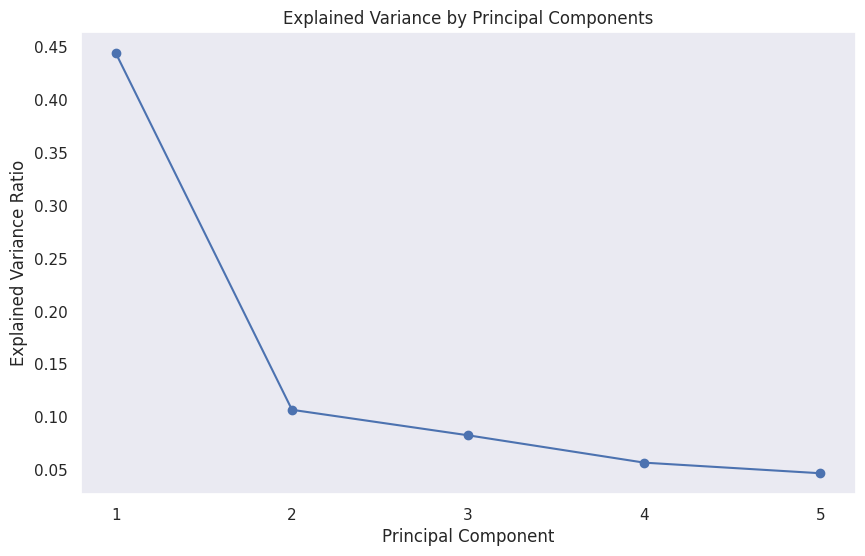

In [ ]:
import matplotlib.pyplot as plt

# Plotting the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid()
plt.show()


In [ ]:
print("Varianza explicada por cada componente principal:", pca.explained_variance_ratio_)

Varianza explicada por cada componente principal: [0.44441745 0.10699542 0.08285617 0.05697918 0.04694675]


#Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_pca,y, test_size=0.3,random_state=1850, shuffle=True)

#ML Regresion Lineal

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math

# Inicializar y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

In [ ]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 0.06948124914736852
MAPE is 0.09937831782698506
MSE is 0.007414124565903879
R2 score is 0.08252471326406119
RMSE score is 0.08610531090417059


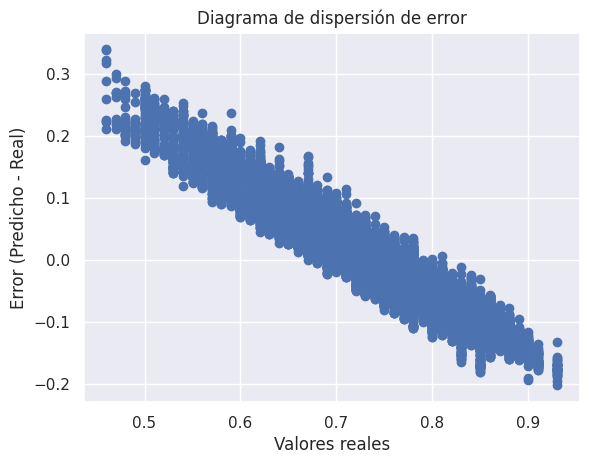

In [ ]:
plt.scatter(y_test, y_pred - y_test)
plt.xlabel('Valores reales')
plt.ylabel('Error (Predicho - Real)')
plt.title('Diagrama de dispersión de error')
plt.grid(True)
plt.show()

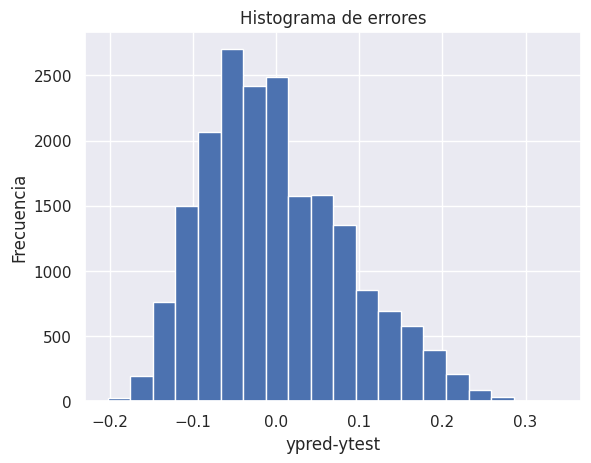

In [ ]:
plt.hist(y_pred-y_test, bins=20)
plt.xlabel('ypred-ytest')
plt.ylabel('Frecuencia')
plt.title('Histograma de errores')
plt.grid(True)
plt.show()

#Preprocesamiento v.2

##Realizaré una penalización con Regresión Lasso

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1850)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
lasso_model = Lasso(alpha=0.001)  # El parámetro alpha controla la fuerza de la regularización, cuanto mayor es alpha, mayor es la penalización.

# Ajustar el modelo a los datos de entrenamiento
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=0.001)

In [ ]:
y_pred = lasso_model.predict(X_test_scaled)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R2 score:", r2)

MSE: 0.0060002464962995205
R2 score: 0.25748780914802805


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}

grid_search = GridSearchCV(estimator=Lasso(), param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)


best_lasso_model = grid_search.best_estimator_
best_alpha = grid_search.best_params_['alpha']

print("Mejor alpha:", best_alpha)

Mejor alpha: 0.001


El modelo de regresión Lasso no parecería ser una mejor opción a la hora de obtener un mejor r2.

#Ridge Regression

In [ ]:

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:

# Crear una instancia del modelo Ridge
ridge_model = Ridge(alpha=0.01)  # El parámetro alpha controla la fuerza de la regularización, cuanto mayor es alpha, mayor es la penalización.

# Ajustar el modelo a los datos de entrenamiento
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=0.01)

In [ ]:
y_pred = ridge_model.predict(X_test_scaled)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R2 score:", r2)

MSE: 0.005983586703114199
R2 score: 0.25954940770815427


Como se puede ver los 3 modelos se mantienen dentro de casi los mismos resultados.

In [ ]:
ridge_model = Ridge(alpha=0.01)

# Ajustar el modelo a los datos de entrenamiento
ridge_model.fit(X_train_scaled, y_train)
y_pred = ridge_model.predict(X_test_scaled)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R2 score:", r2)


MSE: 0.005983586703114199
R2 score: 0.25954940770815427


Hasta ahora no logré mejorar el R2. Ni utilizando otros tipos de regresión, ni eliminando outliers o haciendo una mayor reducción de variablidad con técnica PCA ni dando mayor variablidad al dejar mayor cantidad de datos.

#Con KFold Cross Validation


In [ ]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, r2_score

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, r2_score
import numpy as np

model = LinearRegression()
cv = KFold(n_splits=9, random_state=1, shuffle=True)
R2 = make_scorer(r2_score)

scores = cross_val_score(model, X, y, scoring=R2, cv=cv, error_score='raise', verbose=1)

print('R^2: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

R^2: 0.255 (0.005)


No mejora hay una mejoría con este modelo

#¿Qué pasa si uso randomForest?

Bueno, es claro que estaba insistiendo en relaciones más lineares de las que creía e implementar el método RandomForest y entender que las relaciones entre variables eran más complejas, parece haber funcionado.

In [ ]:
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

model = RandomForestRegressor(n_estimators=100, random_state=1)

cv = KFold(n_splits=9, random_state=1, shuffle=True)
y_pred_cv = cross_val_predict(model, X_pca, y, cv=cv)

# Calcular MAE (Mean Absolute Error)
mae_cv = mean_absolute_error(y, y_pred_cv)

# Calcular MAPE (Mean Absolute Percentage Error)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape_cv = mean_absolute_percentage_error(y, y_pred_cv)

# Calcular MSE (Mean Squared Error)
mse_cv = mean_squared_error(y, y_pred_cv)

# Calcular R^2 (Coefficient of Determination)
r2_cv = r2_score(y, y_pred_cv)

# Calcular RMSE (Root Mean Squared Error)
rmse_cv = np.sqrt(mse_cv)

print("MAE (CV):", mae_cv)
print("MAPE (CV):", mape_cv)
print("MSE (CV):", mse_cv)
print("R^2 (CV):", r2_cv)
print("RMSE (CV):", rmse_cv)


MAE (CV): 0.016169732855539194
MAPE (CV): 2.356606484888742
MSE (CV): 0.0011903287208747948
R^2 (CV): 0.8509747324255311
RMSE (CV): 0.03450114086338008


¿Qué pasa si no uso los datos obtenidos con PCA?

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=1)

# Crear el procedimiento K-Fold Cross-Validation
cv = KFold(n_splits=9, random_state=1, shuffle=True)

# Realizar la validación cruzada y obtener las predicciones
y_pred_cv = cross_val_predict(model, X, y, cv=cv)

# Calcular MAE (Mean Absolute Error)
mae_cv = mean_absolute_error(y, y_pred_cv)

# Calcular MAPE (Mean Absolute Percentage Error)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape_cv = mean_absolute_percentage_error(y, y_pred_cv)

# Calcular MSE (Mean Squared Error)
mse_cv = mean_squared_error(y, y_pred_cv)

# Calcular R^2 (Coefficient of Determination)
r2_cv = r2_score(y, y_pred_cv)

# Calcular RMSE (Root Mean Squared Error)
rmse_cv = np.sqrt(mse_cv)

print("MAE (CV):", mae_cv)
print("MAPE (CV):", mape_cv)
print("MSE (CV):", mse_cv)
print("R^2 (CV):", r2_cv)
print("RMSE (CV):", rmse_cv)

MAE (CV): 0.0026929684255862893
MAPE (CV): 0.43874720754773316
MSE (CV): 0.00020357890143184515
R^2 (CV): 0.9745125865432358
RMSE (CV): 0.01426810784343338


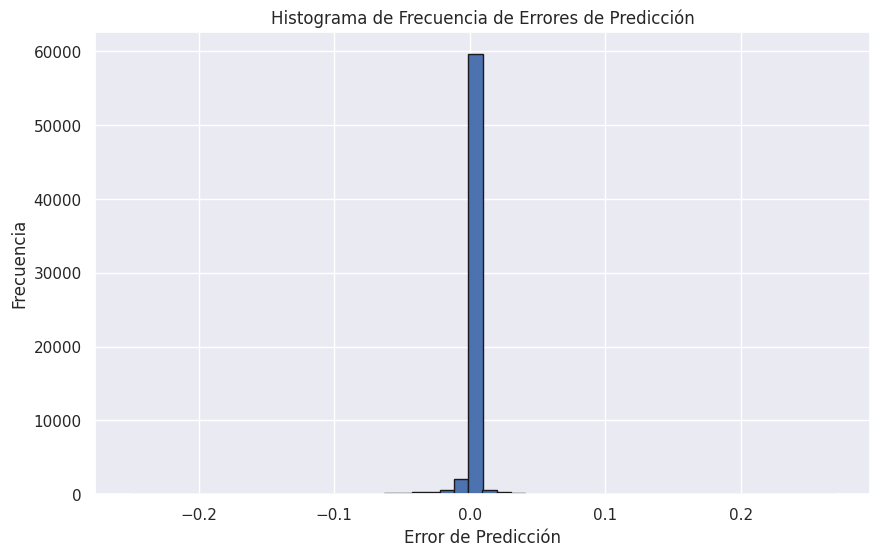

In [ ]:
errors = y - y_pred_cv

plt.figure(figsize=(10, 6))
plt.hist(errors, bins=50, edgecolor='k')
plt.xlabel('Error de Predicción')
plt.ylabel('Frecuencia')
plt.title('Histograma de Frecuencia de Errores de Predicción')
plt.grid(True)
plt.show()

Los resultados sin PCA son mejores que con, lo cual me da a entender que había demasiada reducción de variablidad con ese método.

#Conclusiones finales

El proyecto comenzó con una hipótesis muy simple que postulaba que en estos últimos años la danzabilidad y la popularidad se encontraban directamente relacionadas. Por lo tanto a mayor danzabilidad, mayor popularidad. Si bien hay una correlación más fuerte que con las otras características musicales de las canciones la relación no es lineal. Por lo que la hipótesis debió mutar a entender más que nada los comportamientos regionales y de los años del chart, así como los géneros musicales y cómo se articulaban con la cantidad de streams (información que obtuve posteriormente).

Toda esta información fue surgiendo de un análisis exploratorio de datos y de una subsecuente reducción de outliers para entender por dónde pasaba el gran caudal de datos.

De las 26 variables con las que se empezó el análisis quedaron 15 luego de la selección. Estas 15 habían sido previamente analizadas y contempladas en el EDA.  

En cuanto a los modelos y entrenamientos, el mismo error de la hipótesis continuó en el modelo, intenté ir por modelos más simples que no daban buenos resultados, hasta que probé con RandomForestRegression que toma más en cuenta la complejidad en la relaciones de las variables y ahí el modelo mejoró notablemente. También se utilizó la validación cruzada para evaluar el funcionamiento del modelo.